## Scraping
We scrape our data from [Zillow](https://www.zillow.com/) which is a real estate website. We are going to scrape the data of sold houses in Los Angeles, California. We divide our scraping into two parts:

* First we scrape the links of the houses that are sold in Los Angeles, California in the past 90 days.
* Then we scrape the data of each house from the links we got in the first part.

### Part 1: Scraping the links of the houses

We use `selenium` to scrape the links of the houses. There was a problem in scraping the links of the houses because the website gives only the first 20 pages of our query. To solve this problem, we divided the houses by price range and scraped the links of the houses in each price range separately. `search_links` is the link of the first page of the houses that are sold in Los Angeles, California in the past 90 days in a specific price range.  `scrape_house_links` gets the link of the first page of the search query and scrape all of the house links in the search query.

In [32]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

def scrape_house_links(starting_page_link, file_name, max_pages = 20):

    file = open(f"house-links/{file_name}.txt", "w")

    options = webdriver.ChromeOptions() 
    options.add_argument("--disable-blink-features=AutomationControlled") 
    options.add_experimental_option("excludeSwitches", ["enable-automation"]) 
    options.add_experimental_option("useAutomationExtension", False) 
    
    driver = webdriver.Chrome(options=options) 
    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})") 
    driver.set_window_size(800, 600)
    
    driver.get(starting_page_link)

    for i in range(max_pages):
        print(i)
        element_present = EC.presence_of_element_located((By.ID, 'grid-search-results'))
        WebDriverWait(driver, timeout=10).until(element_present)
        time.sleep(1)
        total_height = driver.execute_script("return document.body.scrollHeight")

        scroll_position = 0

        while scroll_position < total_height:
            scroll_position += 500
            driver.execute_script("window.scrollTo(0, {});".format(scroll_position))
            time.sleep(0.5)
        
        
        link_elements = driver.find_elements(By.CLASS_NAME, "property-card-link")
        links = {link.get_attribute("href") for link in link_elements}

        for link in links:
            file.write(link + "\n")
            
        next_button = driver.find_element(By.XPATH, '//*[@id="grid-search-results"]/div[2]/nav/ul/li[10]/a')
        driver.execute_script("window.scrollTo(0, arguments[0].scrollHeight)", next_button)

        try:
            next_button.click()
        except:
            break
            

    file.close()

In [27]:
search_links = [
    "https://www.zillow.com/los-angeles-ca/sold/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22west%22%3A-118.95143586914062%2C%22east%22%3A-117.87202913085937%2C%22south%22%3A33.67720212849842%2C%22north%22%3A34.36355099753262%7D%2C%22usersSearchTerm%22%3A%22Los%20Angeles%2C%20CA%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A12447%2C%22regionType%22%3A6%7D%5D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22pricea%22%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22rs%22%3A%7B%22value%22%3Atrue%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22doz%22%3A%7B%22value%22%3A%2290%22%7D%2C%22price%22%3A%7B%22min%22%3A1%2C%22max%22%3A550000%7D%2C%22mp%22%3A%7B%22min%22%3A0%2C%22max%22%3A2878%7D%7D%2C%22isListVisible%22%3Atrue%7D",
    "https://www.zillow.com/los-angeles-ca/sold/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22west%22%3A-118.95143586914062%2C%22east%22%3A-117.87202913085937%2C%22south%22%3A33.67720212849842%2C%22north%22%3A34.36355099753262%7D%2C%22usersSearchTerm%22%3A%22Los%20Angeles%2C%20CA%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A12447%2C%22regionType%22%3A6%7D%5D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22pricea%22%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22rs%22%3A%7B%22value%22%3Atrue%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22doz%22%3A%7B%22value%22%3A%2290%22%7D%2C%22price%22%3A%7B%22min%22%3A550001%2C%22max%22%3A720000%7D%2C%22mp%22%3A%7B%22min%22%3A2878%2C%22max%22%3A3663%7D%7D%2C%22isListVisible%22%3Atrue%7D",
    "https://www.zillow.com/los-angeles-ca/sold/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22west%22%3A-118.95143586914062%2C%22east%22%3A-117.87202913085937%2C%22south%22%3A33.67720212849842%2C%22north%22%3A34.36355099753262%7D%2C%22usersSearchTerm%22%3A%22Los%20Angeles%2C%20CA%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A12447%2C%22regionType%22%3A6%7D%5D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22pricea%22%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22rs%22%3A%7B%22value%22%3Atrue%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22doz%22%3A%7B%22value%22%3A%2290%22%7D%2C%22price%22%3A%7B%22min%22%3A720001%2C%22max%22%3A870000%7D%2C%22mp%22%3A%7B%22min%22%3A3767%2C%22max%22%3A4448%7D%7D%2C%22isListVisible%22%3Atrue%7D",
    "https://www.zillow.com/los-angeles-ca/sold/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22west%22%3A-118.95143586914062%2C%22east%22%3A-117.87202913085937%2C%22south%22%3A33.67720212849842%2C%22north%22%3A34.36355099753262%7D%2C%22usersSearchTerm%22%3A%22Los%20Angeles%2C%20CA%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A12447%2C%22regionType%22%3A6%7D%5D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22pricea%22%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22rs%22%3A%7B%22value%22%3Atrue%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22doz%22%3A%7B%22value%22%3A%2290%22%7D%2C%22price%22%3A%7B%22min%22%3A870001%2C%22max%22%3A1070000%7D%2C%22mp%22%3A%7B%22min%22%3A3767%2C%22max%22%3A6541%7D%7D%2C%22isListVisible%22%3Atrue%7D",
    "https://www.zillow.com/los-angeles-ca/sold/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22west%22%3A-118.95143586914062%2C%22east%22%3A-117.87202913085937%2C%22south%22%3A33.67720212849842%2C%22north%22%3A34.36355099753262%7D%2C%22usersSearchTerm%22%3A%22Los%20Angeles%2C%20CA%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A12447%2C%22regionType%22%3A6%7D%5D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22pricea%22%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22rs%22%3A%7B%22value%22%3Atrue%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22doz%22%3A%7B%22value%22%3A%2290%22%7D%2C%22price%22%3A%7B%22min%22%3A1070001%2C%22max%22%3A1350000%7D%2C%22mp%22%3A%7B%22min%22%3A5599%2C%22max%22%3A6541%7D%7D%2C%22isListVisible%22%3Atrue%7D",
    "https://www.zillow.com/los-angeles-ca/sold/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22west%22%3A-118.95143586914062%2C%22east%22%3A-117.87202913085937%2C%22south%22%3A33.67720212849842%2C%22north%22%3A34.36355099753262%7D%2C%22usersSearchTerm%22%3A%22Los%20Angeles%2C%20CA%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A12447%2C%22regionType%22%3A6%7D%5D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22pricea%22%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22rs%22%3A%7B%22value%22%3Atrue%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22doz%22%3A%7B%22value%22%3A%2290%22%7D%2C%22price%22%3A%7B%22min%22%3A1350001%2C%22max%22%3A1850000%7D%2C%22mp%22%3A%7B%22min%22%3A7064%2C%22max%22%3A9157%7D%7D%2C%22isListVisible%22%3Atrue%7D",
    "https://www.zillow.com/los-angeles-ca/sold/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22west%22%3A-118.95143586914062%2C%22east%22%3A-117.87202913085937%2C%22south%22%3A33.67720212849842%2C%22north%22%3A34.36355099753262%7D%2C%22usersSearchTerm%22%3A%22Los%20Angeles%2C%20CA%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A12447%2C%22regionType%22%3A6%7D%5D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22pricea%22%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22rs%22%3A%7B%22value%22%3Atrue%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22doz%22%3A%7B%22value%22%3A%2290%22%7D%2C%22price%22%3A%7B%22min%22%3A1850001%2C%22max%22%3A3500000%7D%2C%22mp%22%3A%7B%22min%22%3A7064%2C%22max%22%3A18314%7D%7D%2C%22isListVisible%22%3Atrue%7D",
    "https://www.zillow.com/los-angeles-ca/sold/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22west%22%3A-118.95143586914062%2C%22east%22%3A-117.87202913085937%2C%22south%22%3A33.67720212849842%2C%22north%22%3A34.36355099753262%7D%2C%22usersSearchTerm%22%3A%22Los%20Angeles%2C%20CA%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A12447%2C%22regionType%22%3A6%7D%5D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22pricea%22%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22rs%22%3A%7B%22value%22%3Atrue%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22doz%22%3A%7B%22value%22%3A%2290%22%7D%2C%22price%22%3A%7B%22min%22%3A3500001%7D%2C%22mp%22%3A%7B%22min%22%3A18314%7D%7D%2C%22isListVisible%22%3Atrue%7D"
]

Now for each search link we call `scrape_house_links` to scrape the links of houses.

In [ ]:
for i, starting_link in enumerate(search_links[]):
    print(f"reading link:{i}")
    try:
        scrape_house_links(starting_link, f"houses{i}")
    except:
        print(f"exception happened at iteration{i}")
        break

### Part 2: Scraping the details of each house

In this part we use `requests` library to get the html of each house's page and then by utilizing `BeautifulSoup` library we find the data of the house with `#__NEXT_DATA__` element id. we convert this data to json and after that we save the specific features that we want to have in our dataset. we also write a function to convert this data to a row in csv file.
We had a problem that the site would give us 403 error after some requests. To solve this problem we sent the request with a header that makes the site think we are human and we also resend the request until we get the response.

In [40]:
from requests import get
from requests.exceptions import HTTPError, ConnectionError 
from bs4 import BeautifulSoup
from json import loads
from html import unescape
from re import compile
from fake_useragent import UserAgent


FEATURES = ["price", "streetAddress", "zipcode", "bedrooms", "bathrooms", "latitude",
                "longitude", "homeStatus", "homeType", "lotAreaValue", "lotAreaUnits",
                "zestimate", "rentZestimate", "currency", "yearBuilt", "livingAreaValue",
                "livingAreaUnitsShort", "taxAssessedValue"]
    
RESOFACTS = ["bathroomsFull", "pricePerSquareFoot", "stories", "heating", "cooling", "flooring", "fireplaceFeatures", "foundationDetails",
            "garageParkingCapacity", "sewer", "roofType"]

COLUMNS = ["zipcode", "streetAddress", "homeStatus", "homeType", "latitude", "longitude", "yearBuilt",
           "lotAreaValue", "lotAreaUnits", "livingAreaValue", "livingAreaUnitsShort", "garageParkingCapacity",
           "bedrooms", "bathrooms", "bathroomsFull", "stories", "flooring", "foundationDetails", "heating",
           "cooling", "fireplaceFeatures", "sewer", "roofType", "taxAssessedValue", "zestimate", "rentZestimate", "sold-history",
           "pricePerSquareFoot", "price", "currency"]

def get_nested_value(dic, key_path):
    keys = key_path.split(".")
    current = dic
    for key in keys:
        current = current.get(key, {})
        if current == {} or current is None:
            return None
    return current

def remove_space(value):
    regex_space = compile(r"[\s ]+")
    return regex_space.sub(" ", value.strip())

ua = UserAgent()

def get_house_data(house_link):
    user_agent = next(user_agent_cycle)
    
    headers = {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
        "Accept-Language": "en-US,en;q=0.9",
        "Cache-Control": "no-cache",
        "Pragma": "no-cache",
        "Sec-Ch-Ua": '"Chromium";v="120", "Google Chrome";v="120", "Not;A=Brand";v="8"',
        "Sec-Ch-Ua-Mobile": "?0",
        "Sec-Ch-Ua-Platform": '"Windows"',
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "same-origin",
        "Sec-Fetch-User": "?1",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": ua.random,
        "Referer": "https://www.google.com/",
        "Connection": "keep-alive",
        "DNT": "1",  
    }   
    try:
        response = get(url=house_link, headers=headers)
        response.raise_for_status()
    except HTTPError as e:
        return get_house_data(house_link)
    except ConnectionError as e:
        return get_house_data(house_link)
    soup = BeautifulSoup(response.content, "html.parser")
    selections = soup.select("#__NEXT_DATA__")
    if selections:
        htmlData = soup.select("#__NEXT_DATA__")[0].getText()
        htmlData = remove_space(unescape(htmlData))
        data = loads(htmlData)
        property_json = get_nested_value(data,"props.pageProps.componentProps.gdpClientCache")
        property_json = loads(property_json)
        for data in property_json.values():
            if "property" in str(data) :
                parsed_data = data.get("property")
    return parsed_data


def fetch_house_features(house_data):
    feature_values = {} 
    
    for feature in FEATURES:
        feature_values[feature] = house_data.get(feature)
        
    for resofact in RESOFACTS:
        feature_values[resofact] = house_data.get("resoFacts", {}).get(resofact)
        
    sold_values = []
    price_history = house_data.get('priceHistory')
    for ph in price_history:
        if ph.get('event') == 'Sold':
            sold_values.append((ph.get('date'), ph.get('price')))
    feature_values["sold-history"] = sold_values[1:]
    
    return feature_values

def scrape_house_data(house_link):
    house_data = get_house_data(house_link)
    return fetch_house_features(house_data)

def convert_feature_values_to_csv_row(feature_values):
    row = ""
    for col in COLUMNS:
        cell_value = feature_values.get(col, '')
        if type(cell_value) == list:
            cell_value = f'"{cell_value}"'
        else:
            cell_value = str(cell_value)
            
        row += f"{cell_value},"
    return row
        

Now we write a function(`scrape_houses`) that scrape all of the links that we had found in the first part.

In [7]:
import tqdm
import csv
import time

def scrape_houses(index, start_index = 0, end_index = -1):
    input_file = open(f"houses{index}.txt", "r")
    links = input_file.readlines()
    input_file.close()
    output_file = open(f"houses.csv", "a+")
    if end_index == -1:
        end_index = len(links)
    for i in tqdm.tqdm(range(start_index, end_index)):
        try:
            house_data = scrape_house_data(links[i])
            row = convert_feature_values_to_csv_row(house_data)
            output_file.write(row + "\n")
        except Exception as e:
            print(f"error at index {i}")
            print(e)
            output_file.close()
            break
    output_file.close()

We also write a function to setup the csv file by writing the header of the csv file.

In [6]:
def setup_csv_file():
    file = open(f"houses.csv", "w")
    for col in COLUMNS:
        file.write(f"{col},")
    file.write("\n")
    file.close()

Now we call `scrape_houses` for each file that we had found in the first part to scrape the data of the houses.

In [ ]:
for i in range(8):
    scrape_houses(i)

We had a bug in our code that we could have comma in the data of one of the columns which would make the csv file to have more columns than we want. To solve this problem we put " " around the data of that specific column.

In [ ]:
import csv

input_file = 'houses.csv'
output_file = 'modified_data.csv'

def is_number(s):
    if s == 'None':
        return True
    try:
        float(s)
        return True
    except ValueError:
        return False

def process_row(row):
    while len(row) > 23 and not is_number(row[23]):
        row[22] += ',' + row[23]
        del row[23]
    return row

with open(input_file, 'r', newline='') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    header = next(reader)  
    writer.writerow(header)
    
    for row in reader:
        if len(row) > 23:
            row = process_row(row)
        writer.writerow(row)


After the scraping the data we found out that we needed some more features to have a better dataset. We added the features that we needed to the code and scraped the remaining features like we did before.

In [ ]:
ADDITIONAL_FEATURES = ['parkingCapacity', 'hasCooling', 'hasHeating', 'hasFireplace', 'hasPrivatePool', 'hasSpa',
                           'hasView', 'securityFeatures', ]

def fetch_additional_features(house_data):
    feature_values = {}
            
    for resofact in ADDITIONAL_FEATURES:
        feature_values[resofact] = house_data.get("resoFacts", {}).get(resofact)
        
    
    return feature_values

def convert_additional_features_to_csv(feature_values):
    row = ""
    for col in ADDITIONAL_FEATURES:
        cell_value = feature_values.get(col, '')
        if type(cell_value) == list:
            cell_value = f'"{cell_value}"'
        else:
            cell_value = str(cell_value)
            
        row += f"{cell_value},"
    return row

def scrape_additional_features_data(house_link):
    house_data = get_house_data(house_link)
    return fetch_additional_features(house_data)

def scrape_additional_features(index, start_index = 0, end_index = -1):
    input_file = open(f"houses{index}.txt", "r")
    prev_file = open("modified_data.csv", "r")
    data_prev = prev_file.readlines()
    row_nums = [765, 759, 794, 795, 770, 711, 729, 283]
    links = input_file.readlines()
    input_file.close()
    output_file = open(f"modfied_data2.csv", "a+")
    if end_index == -1:
        end_index = len(links)
    for i in tqdm.tqdm(range(start_index, end_index)):
        try:
            house_data = scrape_additional_features_data(links[i])
            row = convert_additional_features_to_csv(house_data)
            row_num = sum(row_nums[:index]) + i + 1
            row_before = data_prev[row_num]
            output_file.write(row_before[:-1] + row + "\n")
        except Exception as e:
            print(f"error at index {i}")
            print(e)
            output_file.close()
            break
    output_file.close()
    
def setup_additional_csv_file():
    file = open(f"modfied_data2.csv", "w")
    for col in COLUMNS:
        file.write(f"{col},")
    for col in ADDITIONAL_FEATURES:
        file.write(f"{col},")
    file.write("\n")
    file.close()


In [41]:
for i in range(1, 8):
    scrape_additional_features(i)

  0%|          | 0/759 [00:00<?, ?it/s]

100%|██████████| 283/283 [21:43<00:00,  4.61s/it]


In [397]:
import pandas as pd 

df = pd.read_csv("houses_with_new_features.csv")

df.head()

,zipcode,streetAddress,homeStatus,homeType,latitude,longitude,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
0,90049,11645 Montana Ave APT 229,RECENTLY_SOLD,CONDO,34.056390,-118.465990,1973.0,1.1479,Acres,855.0,...,USD,4,True,True,True,NaN,True,True,"['Automatic Gate', 'Fire and Smoke Detection S...",NaN
1,90046,2316 Laurelmont Pl,RECENTLY_SOLD,HOME_TYPE_UNKNOWN,34.113050,-118.371925,NaN,1970.0000,Square Feet,NaN,...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN
2,91406,6452 Woodley Ave #3,RECENTLY_SOLD,APARTMENT,34.188200,-118.483284,2006.0,NaN,sqft,1800.0,...,USD,2,True,True,NaN,NaN,False,False,NaN,NaN
3,91406,6452 Woodley Ave UNIT 2,RECENTLY_SOLD,HOME_TYPE_UNKNOWN,34.188200,-118.483284,NaN,NaN,sqft,NaN,...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN
4,90059,855 E 120th St #3,RECENTLY_SOLD,APARTMENT,33.924007,-118.259570,NaN,NaN,sqft,912.0,...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   zipcode                5606 non-null   int64  
 1   streetAddress          5606 non-null   object 
 2   homeStatus             5606 non-null   object 
 3   homeType               5606 non-null   object 
 4   latitude               5602 non-null   float64
 5   longitude              5602 non-null   float64
 6   yearBuilt              5391 non-null   float64
 7   lotAreaValue           5438 non-null   float64
 8   lotAreaUnits           5606 non-null   object 
 9   livingAreaValue        5439 non-null   float64
 10  livingAreaUnitsShort   5438 non-null   object 
 11  garageParkingCapacity  3393 non-null   float64
 12  bedrooms               5429 non-null   float64
 13  bathrooms              5437 non-null   float64
 14  bathroomsFull          4640 non-null   float64
 15  stor

In [399]:
df["homeStatus"].value_counts()

homeStatus
RECENTLY_SOLD      5434
FOR_SALE             81
FOR_RENT             60
PENDING              16
PRE_FORECLOSURE      11
FORECLOSED            2
OTHER                 2
Name: count, dtype: int64

In [400]:
df_not_sold = df[df['homeStatus'] != 'RECENTLY_SOLD']

df = df[df['homeStatus'] == 'RECENTLY_SOLD']

In [401]:
df_not_sold.head()

,zipcode,streetAddress,homeStatus,homeType,latitude,longitude,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
111,90057,216 S Lake St,FOR_SALE,SINGLE_FAMILY,34.065617,-118.271940,1903.0,6098.4000,Square Feet,3323.0,...,USD,0,NaN,NaN,NaN,NaN,False,False,NaN,NaN
161,90020,360 S Kenmore Ave APT 310,FOR_SALE,CONDO,34.067370,-118.296265,1965.0,0.3486,Acres,603.0,...,USD,1,True,True,False,NaN,False,True,['None'],NaN
179,91342,14075 Foothill Blvd APT 13A,FOR_SALE,CONDO,34.315300,-118.439770,1977.0,0.4986,Acres,615.0,...,USD,2,True,True,False,NaN,False,True,"['Gated', 'Secured Community', 'Security Light...",NaN
192,91316,5400 Newcastle Ave APT 42,FOR_SALE,CONDO,34.168633,-118.523580,1967.0,1.3996,Acres,648.0,...,USD,1,True,True,False,NaN,True,True,NaN,NaN
279,91402,8801 Willis Ave #31,FOR_RENT,APARTMENT,34.230145,-118.455894,NaN,NaN,sqft,997.0,...,USD,0,True,NaN,NaN,NaN,False,False,NaN,NaN


In [402]:
df_not_sold.to_csv("not_sold.csv", index=False)

In [403]:
df.drop(columns=['homeStatus'], inplace=True)

CHECK DUPLICATION


In [404]:
print("size before duplication removal: ", df.shape)

df.drop_duplicates(inplace=True)

print("size after duplication removal: ", df.shape)

size before duplication removal:  (5434, 38)
size after duplication removal:  (5434, 38)


In [405]:
df["homeType"].value_counts()

homeType
SINGLE_FAMILY        3443
CONDO                 971
MULTI_FAMILY          473
TOWNHOUSE             317
LOT                   110
MANUFACTURED           48
HOME_TYPE_UNKNOWN      37
APARTMENT              35
Name: count, dtype: int64

In [406]:
df[df["homeType"] == "HOME_TYPE_UNKNOWN"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1 to 5352
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   zipcode                37 non-null     int64  
 1   streetAddress          37 non-null     object 
 2   homeType               37 non-null     object 
 3   latitude               37 non-null     float64
 4   longitude              37 non-null     float64
 5   yearBuilt              3 non-null      float64
 6   lotAreaValue           27 non-null     float64
 7   lotAreaUnits           37 non-null     object 
 8   livingAreaValue        3 non-null      float64
 9   livingAreaUnitsShort   3 non-null      object 
 10  garageParkingCapacity  0 non-null      float64
 11  bedrooms               1 non-null      float64
 12  bathrooms              2 non-null      float64
 13  bathroomsFull          1 non-null      float64
 14  stories                0 non-null      float64
 15  flooring   

In [407]:
df = df[df["homeType"] != "HOME_TYPE_UNKNOWN"]

In [408]:
df[df["latitude"].isnull()]


,zipcode,streetAddress,homeType,latitude,longitude,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
3682,91367,(Undisclosed Address),SINGLE_FAMILY,NaN,NaN,1959.0,0.2610,Acres,2230.0,sqft,...,USD,3,True,True,True,True,True,True,"['Exterior Security Lights', 'Smoke Detector(s...",NaN
4342,90049,(Undisclosed Address),CONDO,NaN,NaN,1994.0,1.9413,Acres,2176.0,sqft,...,USD,2,True,True,True,NaN,False,True,"['24 Hour Security', 'Secured Community', 'Gat...",NaN
4929,91423,(Undisclosed Address),SINGLE_FAMILY,NaN,NaN,1940.0,0.3430,Acres,3407.0,sqft,...,USD,8,True,True,True,True,False,True,NaN,NaN
4961,90025,(Undisclosed Address),MULTI_FAMILY,NaN,NaN,1964.0,6329.2680,Square Feet,6656.0,sqft,...,USD,11,False,True,NaN,NaN,False,True,NaN,NaN


In [409]:
df["latitude"].describe()

count    5393.000000
mean       34.102236
std         0.120297
min        33.706684
25%        34.038242
50%        34.105583
75%        34.190070
max        34.326786
Name: latitude, dtype: float64

In [410]:
df["longitude"].describe()

count    5393.000000
mean     -118.403168
std         0.115175
min      -118.667270
25%      -118.477260
50%      -118.404440
75%      -118.307080
max      -118.159600
Name: longitude, dtype: float64

In [411]:
df.drop(columns=['latitude', 'longitude'], inplace=True)

In [412]:
df["yearBuilt"].describe()

count    5255.000000
mean     1960.963463
std        40.234308
min         0.000000
25%      1941.000000
50%      1957.000000
75%      1980.000000
max      2024.000000
Name: yearBuilt, dtype: float64

In [413]:
df[df["yearBuilt"] < 1900]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,garageParkingCapacity,bedrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
64,91307,22710 Saticoy St,SINGLE_FAMILY,0.0,8460.0000,Acres,1372.0,sqft,NaN,4.0,...,USD,0,NaN,NaN,NaN,NaN,False,False,NaN,NaN
383,90012,257 S Spring St APT 4L,CONDO,1899.0,0.6616,Acres,650.0,sqft,1.0,0.0,...,USD,1,True,True,False,NaN,False,True,"['Gated with Guard', 'Gated', 'Other', 'Card/C...",NaN
1069,90011,223 E 24th St,SINGLE_FAMILY,1899.0,5249.0000,Square Feet,1205.0,sqft,0.0,2.0,...,USD,0,False,NaN,False,NaN,False,True,NaN,NaN
1092,90026,1309 Colton St,SINGLE_FAMILY,1885.0,5571.0000,Square Feet,852.0,sqft,NaN,2.0,...,USD,0,False,True,NaN,NaN,False,False,NaN,NaN
1365,90026,1526 Rockwood St,SINGLE_FAMILY,1885.0,5969.0000,Square Feet,880.0,sqft,0.0,1.0,...,USD,1,False,True,False,NaN,False,True,['Carbon Monoxide Detector(s)'],NaN
1694,90031,300 S Avenue 19,MULTI_FAMILY,1895.0,7500.0000,Square Feet,1952.0,sqft,0.0,2.0,...,USD,3,NaN,NaN,NaN,NaN,False,False,NaN,NaN
1964,90031,2621 Johnston St,SINGLE_FAMILY,1895.0,0.2702,Acres,1800.0,sqft,NaN,3.0,...,USD,0,False,False,False,NaN,False,True,NaN,NaN
3075,90006,1116 Irolo St,SINGLE_FAMILY,1896.0,5906.7360,Square Feet,1718.0,sqft,NaN,3.0,...,USD,6,True,True,False,NaN,False,True,NaN,NaN
3435,90033,2014 Michigan Ave,MULTI_FAMILY,1890.0,7413.9120,Square Feet,2952.0,sqft,NaN,7.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
3607,90026,2128 Reservoir St,SINGLE_FAMILY,1895.0,7744.9680,Square Feet,1770.0,sqft,NaN,4.0,...,USD,3,True,True,False,NaN,False,True,"['Carbon Monoxide Detector(s)', 'Security Ligh...",NaN


In [414]:
df = df[df["yearBuilt"] > 0]

In [415]:
df["yearBuilt"] = df["yearBuilt"].astype(int)

In [416]:
df["yearBuilt"]

0       1973
2       2006
5       1961
6       1981
8       1945
        ... 
5601    1952
5602    2023
5603    2021
5604    2023
5605    1938
Name: yearBuilt, Length: 5254, dtype: int32

In [417]:
df["lotAreaUnits"].unique()

array(['Acres', 'sqft', 'Square Feet'], dtype=object)

In [418]:
df["lotAreaUnits"].replace("Square Feet", 'sqft', inplace=True)

C:\Users\ALI\AppData\Local\Temp\ipykernel_15436\1543183995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["lotAreaUnits"].replace("Square Feet", 'sqft', inplace=True)


In [419]:
import pandas as pd

conversion_factors = {
    'sqft': 0.092903,
    'Acres': 4046.86,
}

# Convert all areas to square meters
df['lotAreaValue'] = df.apply(
    lambda row: row['lotAreaValue'] * conversion_factors[row['lotAreaUnits']],
    axis=1
)

In [420]:
df["livingAreaUnitsShort"].unique()

array(['sqft', nan], dtype=object)

In [421]:
df["livingAreaUnitsShort"].fillna("sqft", inplace=True)

C:\Users\ALI\AppData\Local\Temp\ipykernel_15436\3391398173.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["livingAreaUnitsShort"].fillna("sqft", inplace=True)


In [422]:
df["livingAreaUnitsShort"].unique()

array(['sqft'], dtype=object)

In [423]:
df['livingAreaValue'] = df.apply(
    lambda row: row['livingAreaValue'] * conversion_factors[row['livingAreaUnitsShort']],
    axis=1
)


In [424]:
df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,garageParkingCapacity,bedrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
0,90049,11645 Montana Ave APT 229,CONDO,1973,4645.390594,Acres,79.432065,sqft,2.0,1.0,...,USD,4,True,True,True,NaN,True,True,"['Automatic Gate', 'Fire and Smoke Detection S...",NaN
2,91406,6452 Woodley Ave #3,APARTMENT,2006,NaN,sqft,167.225400,sqft,NaN,3.0,...,USD,2,True,True,NaN,NaN,False,False,NaN,NaN
5,90066,4040 Grand View Blvd UNIT 15,TOWNHOUSE,1961,11561.886452,Acres,78.131423,sqft,NaN,2.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
6,91303,7305 Milwood Ave APT 3,CONDO,1981,80.918513,sqft,90.301716,sqft,NaN,2.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
8,91040,8701 Hillrose St,SINGLE_FAMILY,1945,7098.170143,Acres,129.320976,sqft,NaN,2.0,...,USD,2,False,False,NaN,NaN,False,False,NaN,NaN


In [425]:
df["lotAreaValue"].describe()

count    5.176000e+03
mean     3.507705e+05
std      2.288397e+07
min      0.000000e+00
25%      5.529888e+02
50%      6.990486e+02
75%      1.554737e+03
max      1.644773e+09
Name: lotAreaValue, dtype: float64

In [426]:
df[(df["lotAreaValue"] < df["livingAreaValue"]) & (df["lotAreaValue"] > 0.1)]


,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,garageParkingCapacity,bedrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
6,91303,7305 Milwood Ave APT 3,CONDO,1981,80.918513,sqft,90.301716,sqft,NaN,2.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
85,91601,5706 Fair Ave APT 200,CONDO,1981,81.754640,sqft,83.612700,sqft,NaN,2.0,...,USD,2,True,True,True,NaN,False,True,NaN,NaN
1186,90037,1006 W Leighton Ave,TOWNHOUSE,2008,112.133921,sqft,137.403537,sqft,2.0,3.0,...,USD,2,True,True,False,NaN,False,True,NaN,NaN
1345,90011,4146 Woodlawn Ave,MULTI_FAMILY,1906,359.070095,sqft,401.340960,sqft,0.0,6.0,...,USD,0,NaN,NaN,NaN,NaN,False,False,NaN,NaN
1547,91405,14104 W Birch Ln,SINGLE_FAMILY,2016,101.171367,sqft,137.310634,sqft,2.0,3.0,...,USD,2,True,True,False,NaN,False,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5556,90272,756 Via De La Paz,SINGLE_FAMILY,2016,696.868376,sqft,718.790511,sqft,NaN,4.0,...,USD,2,True,True,True,NaN,False,True,"['Security System Owned', 'Security Lights', '...",NaN
5570,91303,21121 Vanowen St,SINGLE_FAMILY,2021,2623.491266,Acres,8004.986995,sqft,NaN,NaN,...,USD,0,True,False,NaN,NaN,False,False,NaN,NaN
5581,90004,4804 Oakwood Ave,APARTMENT,2022,1347.095271,Acres,2709.608898,sqft,NaN,6.0,...,USD,0,True,False,NaN,NaN,False,False,NaN,NaN
5597,90021,1001 Towne Ave,SINGLE_FAMILY,2005,2300.745820,Acres,4059.954003,sqft,NaN,NaN,...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN


In [427]:
df[(df["livingAreaValue"] < 1)]


,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,garageParkingCapacity,bedrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
439,90011,1626-1628 E 32nd St,MULTI_FAMILY,1905,464.886612,sqft,0.092903,sqft,1.0,4.0,...,USD,1,False,True,False,NaN,False,False,NaN,NaN
1955,91402,9146 Willis Ave,SINGLE_FAMILY,1976,1618.744000,Acres,0.185806,sqft,NaN,4.0,...,USD,2,True,True,NaN,NaN,False,False,NaN,NaN
3762,90016,2923 S Orange Dr,MULTI_FAMILY,1922,669.644824,sqft,0.278709,sqft,3.0,5.0,...,USD,9,True,True,True,NaN,False,True,NaN,NaN
4495,90029,909 Sanborn Ave,SINGLE_FAMILY,1922,497.358440,sqft,0.000000,sqft,0.0,2.0,...,USD,3,True,True,True,NaN,False,True,"['Exterior Security Lights', 'Gated', 'Smoke D...",NaN
4587,90026,1321 Edgecliffe Dr,SINGLE_FAMILY,2023,682.704385,sqft,0.000000,sqft,NaN,4.0,...,USD,2,True,True,True,NaN,False,True,NaN,NaN
4656,90026,1323 Edgecliffe Dr,SINGLE_FAMILY,2023,682.704385,sqft,0.000000,sqft,NaN,4.0,...,USD,2,True,True,True,NaN,False,True,NaN,NaN
4687,90037,211 W 43rd St,MULTI_FAMILY,2021,589.934050,sqft,0.185806,sqft,1.0,15.0,...,USD,6,True,True,NaN,NaN,False,False,NaN,NaN
5346,90210,9625 Oak Pass Rd,SINGLE_FAMILY,1974,1855.080624,Acres,0.000000,sqft,NaN,4.0,...,USD,4,True,True,True,True,True,True,"['Exterior Security Lights', 'Secured Communit...",NaN
5552,90210,2859 Coldwater Canyon Dr,SINGLE_FAMILY,1959,12009.866422,Acres,0.000000,sqft,NaN,7.0,...,USD,20,True,True,True,NaN,False,True,NaN,NaN
5562,91436,15824 Valley Vista Blvd,SINGLE_FAMILY,2024,1442.300904,Acres,0.000000,sqft,NaN,5.0,...,USD,3,True,True,True,NaN,False,True,['Alarm System'],NaN


In [428]:
df.loc[df['livingAreaValue'] > df['lotAreaValue'], 'lotAreaValue'] = df['livingAreaValue']

In [429]:
df[df["lotAreaValue"] < 1]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,garageParkingCapacity,bedrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38


In [430]:
df[(df["livingAreaValue"] < 1)]


,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,garageParkingCapacity,bedrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
439,90011,1626-1628 E 32nd St,MULTI_FAMILY,1905,464.886612,sqft,0.092903,sqft,1.0,4.0,...,USD,1,False,True,False,NaN,False,False,NaN,NaN
1955,91402,9146 Willis Ave,SINGLE_FAMILY,1976,1618.744000,Acres,0.185806,sqft,NaN,4.0,...,USD,2,True,True,NaN,NaN,False,False,NaN,NaN
3762,90016,2923 S Orange Dr,MULTI_FAMILY,1922,669.644824,sqft,0.278709,sqft,3.0,5.0,...,USD,9,True,True,True,NaN,False,True,NaN,NaN
4495,90029,909 Sanborn Ave,SINGLE_FAMILY,1922,497.358440,sqft,0.000000,sqft,0.0,2.0,...,USD,3,True,True,True,NaN,False,True,"['Exterior Security Lights', 'Gated', 'Smoke D...",NaN
4587,90026,1321 Edgecliffe Dr,SINGLE_FAMILY,2023,682.704385,sqft,0.000000,sqft,NaN,4.0,...,USD,2,True,True,True,NaN,False,True,NaN,NaN
4656,90026,1323 Edgecliffe Dr,SINGLE_FAMILY,2023,682.704385,sqft,0.000000,sqft,NaN,4.0,...,USD,2,True,True,True,NaN,False,True,NaN,NaN
4687,90037,211 W 43rd St,MULTI_FAMILY,2021,589.934050,sqft,0.185806,sqft,1.0,15.0,...,USD,6,True,True,NaN,NaN,False,False,NaN,NaN
5346,90210,9625 Oak Pass Rd,SINGLE_FAMILY,1974,1855.080624,Acres,0.000000,sqft,NaN,4.0,...,USD,4,True,True,True,True,True,True,"['Exterior Security Lights', 'Secured Communit...",NaN
5552,90210,2859 Coldwater Canyon Dr,SINGLE_FAMILY,1959,12009.866422,Acres,0.000000,sqft,NaN,7.0,...,USD,20,True,True,True,NaN,False,True,NaN,NaN
5562,91436,15824 Valley Vista Blvd,SINGLE_FAMILY,2024,1442.300904,Acres,0.000000,sqft,NaN,5.0,...,USD,3,True,True,True,NaN,False,True,['Alarm System'],NaN


In [431]:
df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,garageParkingCapacity,bedrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
0,90049,11645 Montana Ave APT 229,CONDO,1973,4645.390594,Acres,79.432065,sqft,2.0,1.0,...,USD,4,True,True,True,NaN,True,True,"['Automatic Gate', 'Fire and Smoke Detection S...",NaN
2,91406,6452 Woodley Ave #3,APARTMENT,2006,NaN,sqft,167.225400,sqft,NaN,3.0,...,USD,2,True,True,NaN,NaN,False,False,NaN,NaN
5,90066,4040 Grand View Blvd UNIT 15,TOWNHOUSE,1961,11561.886452,Acres,78.131423,sqft,NaN,2.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
6,91303,7305 Milwood Ave APT 3,CONDO,1981,90.301716,sqft,90.301716,sqft,NaN,2.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
8,91040,8701 Hillrose St,SINGLE_FAMILY,1945,7098.170143,Acres,129.320976,sqft,NaN,2.0,...,USD,2,False,False,NaN,NaN,False,False,NaN,NaN


In [432]:
df.loc[df['livingAreaValue'] < 1, 'livingAreaValue'] = df['lotAreaValue']

In [433]:
df["garageParkingCapacity"].info()

<class 'pandas.core.series.Series'>
Index: 5254 entries, 0 to 5605
Series name: garageParkingCapacity
Non-Null Count  Dtype  
--------------  -----  
3308 non-null   float64
dtypes: float64(1)
memory usage: 211.1 KB


In [434]:
df["garageParkingCapacity"].describe()

count    3308.000000
mean        1.707074
std         1.100232
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        21.000000
Name: garageParkingCapacity, dtype: float64

In [435]:
df[df["garageParkingCapacity"]==0]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,garageParkingCapacity,bedrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
123,91304,24303 Woolsey Cyn #121,MANUFACTURED,1979,NaN,sqft,164.995728,sqft,0.0,3.0,...,USD,2,True,True,False,NaN,True,True,['Gated Community'],NaN
124,91342,12301 San Fernando Rd #809,MANUFACTURED,2016,NaN,sqft,40.134096,sqft,0.0,2.0,...,USD,0,True,True,NaN,NaN,True,True,['Gated Community'],NaN
125,91342,13120 Bradley Ave #30,MANUFACTURED,1978,NaN,sqft,65.403712,sqft,0.0,2.0,...,USD,2,NaN,NaN,NaN,NaN,False,False,NaN,NaN
133,91311,21001 Plummer St SPACE 71,MANUFACTURED,1969,NaN,sqft,60.201144,sqft,0.0,2.0,...,USD,2,True,True,NaN,NaN,True,True,['Smoke Detector(s)'],NaN
141,91605,8250 Lankershim Blvd,MANUFACTURED,1990,111.483600,sqft,69.677250,sqft,0.0,2.0,...,USD,0,True,True,NaN,NaN,True,True,"['Carbon Monoxide Detector(s)', 'Fire and Smok...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350,90028,1406 N Sycamore Ave,MULTI_FAMILY,2024,597.180484,sqft,597.180484,sqft,0.0,15.0,...,USD,8,True,True,False,NaN,False,True,NaN,NaN
5372,91364,4701 Almidor Ave,SINGLE_FAMILY,1928,3815.379608,Acres,492.385900,sqft,0.0,4.0,...,USD,5,True,True,True,True,False,True,['Exterior Security Lights'],NaN
5381,90037,1260 Leighton Ave,MULTI_FAMILY,2023,730.589192,sqft,730.589192,sqft,0.0,16.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
5425,90024,10633 Le Conte Ave,SINGLE_FAMILY,1928,756.137517,sqft,302.306362,sqft,0.0,4.0,...,USD,0,True,True,True,True,False,True,NaN,NaN


In [436]:
df["garageParkingCapacity"].isna().sum()

1946

In [437]:
df.drop(columns=["garageParkingCapacity"], inplace=True)

In [438]:
df["bedrooms"].value_counts()

bedrooms
3.0     1855
2.0     1229
4.0     1074
5.0      417
1.0      278
6.0      131
8.0       67
7.0       46
12.0      19
0.0       19
9.0       17
10.0      14
16.0      10
13.0       9
11.0       6
14.0       4
18.0       4
17.0       2
36.0       2
15.0       2
20.0       2
40.0       1
34.0       1
24.0       1
19.0       1
25.0       1
35.0       1
33.0       1
28.0       1
99.0       1
44.0       1
72.0       1
32.0       1
31.0       1
Name: count, dtype: int64

In [439]:
df[df["bedrooms"] > 30].sort_values(by="bedrooms")

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,bedrooms,bathrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
5521,90034,10915 Rose Ave,MULTI_FAMILY,1971,1899.866350,sqft,1899.866350,sqft,31.0,31.0,...,USD,0,True,False,NaN,NaN,False,False,NaN,NaN
510,90026,211 N Reno St,APARTMENT,1925,1065.691714,Acres,992.204040,sqft,32.0,16.0,...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN
5280,91605,13135 Vanowen St,MULTI_FAMILY,1960,1547.923950,Acres,1399.769501,sqft,33.0,25.0,...,USD,14,True,True,NaN,NaN,False,False,NaN,NaN
5378,90016,5110 W Washington Blvd,MULTI_FAMILY,1946,2207.157444,Acres,1011.249155,sqft,34.0,34.0,...,USD,14,False,False,NaN,NaN,False,False,NaN,NaN
3634,90039,2938 Allesandro St,SINGLE_FAMILY,2022,3015.259768,Acres,3015.259768,sqft,35.0,35.0,...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN
5446,90006,1029 Elden Ave,MULTI_FAMILY,1991,2024.263467,Acres,2024.263467,sqft,36.0,35.0,...,USD,32,True,True,NaN,NaN,False,False,NaN,NaN
5466,90003,5869-5875 S San Pedro St,MULTI_FAMILY,2023,1667.330141,Acres,1667.330141,sqft,36.0,28.0,...,USD,8,True,True,NaN,NaN,False,True,['Gated'],NaN
5299,90044,649 W 92nd St,MULTI_FAMILY,2023,1765.240332,Acres,1196.590640,sqft,40.0,24.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
3699,90065,3516 Arroyo Seco Ave,MULTI_FAMILY,1964,761.154279,sqft,435.343458,sqft,44.0,24.0,...,USD,6,NaN,True,NaN,NaN,False,False,NaN,NaN
3216,90011,637 E 23rd St,MULTI_FAMILY,1957,541.067072,sqft,327.018560,sqft,72.0,36.0,...,USD,0,NaN,NaN,NaN,NaN,False,False,NaN,NaN


In [440]:
df.drop(index=[4329,510,3634]	, inplace=True)

In [441]:
df.drop(index=[3699]	, inplace=True)

In [442]:
df["bedrooms"].value_counts()

bedrooms
3.0     1855
2.0     1229
4.0     1074
5.0      417
1.0      278
6.0      131
8.0       67
7.0       46
12.0      19
0.0       19
9.0       17
10.0      14
16.0      10
13.0       9
11.0       6
18.0       4
14.0       4
36.0       2
20.0       2
17.0       2
15.0       2
28.0       1
33.0       1
40.0       1
25.0       1
19.0       1
24.0       1
34.0       1
72.0       1
31.0       1
Name: count, dtype: int64

In [443]:
df["bedrooms"].isna().sum()

34

In [444]:
df[df["bedrooms"] == 0].head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,bedrooms,bathrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
136,90015,1421 Albany St,SINGLE_FAMILY,1903,558.439933,sqft,190.544053,sqft,0.0,0.0,...,USD,6,False,True,NaN,NaN,False,False,NaN,NaN
238,91316,5325 Newcastle Ave UNIT 128,CONDO,1971,9585.392596,Acres,44.872149,sqft,0.0,1.0,...,USD,1,True,True,True,NaN,False,True,NaN,NaN
315,90012,800 W 1st St APT 1604,CONDO,1968,9874.338400,Acres,44.686343,sqft,0.0,1.0,...,USD,1,True,NaN,False,NaN,False,False,NaN,NaN
341,90015,645 W 9th St APT 405,CONDO,2006,6943.602388,Acres,61.315980,sqft,0.0,1.0,...,USD,1,True,True,False,NaN,True,True,NaN,NaN
360,90031,200 N San Fernando Rd APT 211,CONDO,1925,5868.351686,Acres,62.245010,sqft,0.0,1.0,...,USD,1,True,True,False,NaN,False,True,"['Card/Code Access', 'Carbon Monoxide Detector...",NaN


In [445]:
df[df["bedrooms"].isna()].head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,bedrooms,bathrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
280,90018,1853 W 25th St,MULTI_FAMILY,1913,617.990756,sqft,280.938672,sqft,NaN,4.0,...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN
299,90062,1514 W 55th St,MULTI_FAMILY,1911,460.798880,sqft,179.209887,sqft,NaN,NaN,...,USD,2,NaN,NaN,NaN,NaN,False,False,NaN,NaN
347,90046,1735 N Fuller Ave APT 422,CONDO,1974,8029.059427,Acres,47.659239,sqft,NaN,1.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
354,90017,889 Francisco St UNIT 1807,CONDO,2017,9189.140713,Acres,44.593440,sqft,NaN,1.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
540,90044,952 954 Gage Ave,MULTI_FAMILY,1921,304.536034,sqft,93.646224,sqft,NaN,2.0,...,USD,4,True,True,False,NaN,False,True,['Window Bars'],NaN


In [446]:
#drop all bathrooms==0
df.dropna(subset=["bedrooms"], inplace=True)

In [447]:
df[df["bedrooms"] > 20].sort_values(by="bedrooms")

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,bedrooms,bathrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
5360,90057,245 S Westlake Ave,MULTI_FAMILY,2023,1037.633607,sqft,1037.633607,sqft,24.0,NaN,...,USD,9,NaN,True,NaN,NaN,False,False,NaN,NaN
5324,90033,456 S Breed St,MULTI_FAMILY,1972,1751.871871,Acres,1751.871871,sqft,25.0,25.0,...,USD,0,NaN,NaN,NaN,NaN,False,False,NaN,NaN
4880,90744,1421 N Wilmington Blvd,MULTI_FAMILY,1957,1121.805200,Acres,738.393044,sqft,28.0,14.0,...,USD,13,False,True,False,NaN,False,True,"['Closed Circuit Camera(s)', 'Gated Community'...",NaN
5521,90034,10915 Rose Ave,MULTI_FAMILY,1971,1899.866350,sqft,1899.866350,sqft,31.0,31.0,...,USD,0,True,False,NaN,NaN,False,False,NaN,NaN
5280,91605,13135 Vanowen St,MULTI_FAMILY,1960,1547.923950,Acres,1399.769501,sqft,33.0,25.0,...,USD,14,True,True,NaN,NaN,False,False,NaN,NaN
5378,90016,5110 W Washington Blvd,MULTI_FAMILY,1946,2207.157444,Acres,1011.249155,sqft,34.0,34.0,...,USD,14,False,False,NaN,NaN,False,False,NaN,NaN
5446,90006,1029 Elden Ave,MULTI_FAMILY,1991,2024.263467,Acres,2024.263467,sqft,36.0,35.0,...,USD,32,True,True,NaN,NaN,False,False,NaN,NaN
5466,90003,5869-5875 S San Pedro St,MULTI_FAMILY,2023,1667.330141,Acres,1667.330141,sqft,36.0,28.0,...,USD,8,True,True,NaN,NaN,False,True,['Gated'],NaN
5299,90044,649 W 92nd St,MULTI_FAMILY,2023,1765.240332,Acres,1196.590640,sqft,40.0,24.0,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
3216,90011,637 E 23rd St,MULTI_FAMILY,1957,541.067072,sqft,327.018560,sqft,72.0,36.0,...,USD,0,NaN,NaN,NaN,NaN,False,False,NaN,NaN


In [448]:
df["bedrooms"].isna().sum()

0

In [449]:
df["bedrooms"] = df["bedrooms"].astype(int)

In [450]:
df[df["bedrooms"] ==0]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,lotAreaUnits,livingAreaValue,livingAreaUnitsShort,bedrooms,bathrooms,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
136,90015,1421 Albany St,SINGLE_FAMILY,1903,5.584399e+02,sqft,190.544053,sqft,0,0.0,...,USD,6,False,True,NaN,NaN,False,False,NaN,NaN
238,91316,5325 Newcastle Ave UNIT 128,CONDO,1971,9.585393e+03,Acres,44.872149,sqft,0,1.0,...,USD,1,True,True,True,NaN,False,True,NaN,NaN
315,90012,800 W 1st St APT 1604,CONDO,1968,9.874338e+03,Acres,44.686343,sqft,0,1.0,...,USD,1,True,NaN,False,NaN,False,False,NaN,NaN
341,90015,645 W 9th St APT 405,CONDO,2006,6.943602e+03,Acres,61.315980,sqft,0,1.0,...,USD,1,True,True,False,NaN,True,True,NaN,NaN
360,90031,200 N San Fernando Rd APT 211,CONDO,1925,5.868352e+03,Acres,62.245010,sqft,0,1.0,...,USD,1,True,True,False,NaN,False,True,"['Card/Code Access', 'Carbon Monoxide Detector...",NaN
371,90046,7250 Franklin Ave UNIT 711,CONDO,1964,4.973186e+03,Acres,49.796008,sqft,0,1.0,...,USD,1,True,True,False,NaN,False,True,['24 Hour Security'],NaN
379,90013,825 E 4th St APT 109,CONDO,1923,4.011652e+03,Acres,61.315980,sqft,0,1.0,...,USD,1,True,True,False,NaN,False,True,"['Automatic Gate', 'Carbon Monoxide Detector(s...",NaN
383,90012,257 S Spring St APT 4L,CONDO,1899,2.677403e+03,Acres,60.386950,sqft,0,1.0,...,USD,1,True,True,False,NaN,False,True,"['Gated with Guard', 'Gated', 'Other', 'Card/C...",NaN
387,90014,215 W 7th St APT 1303,CONDO,1911,1.479575e+03,Acres,58.528890,sqft,0,1.0,...,USD,0,True,True,False,NaN,False,True,"['24 Hour Security', 'Gated with Attendant', '...",NaN
409,90013,420 S San Pedro St APT 213,CONDO,1922,7.099002e+03,Acres,72.464340,sqft,0,1.0,...,USD,1,True,True,False,NaN,False,True,"['24 Hour Security', 'Security Lights', 'Fire ...",NaN


In [451]:
df.drop(index=[136,596,4530], inplace=True)

In [452]:
df.drop(columns = ["lotAreaUnits", "livingAreaUnitsShort"], inplace=True)

In [453]:
df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,bathroomsFull,stories,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
0,90049,11645 Montana Ave APT 229,CONDO,1973,4645.390594,79.432065,1,1.0,1.0,NaN,...,USD,4,True,True,True,NaN,True,True,"['Automatic Gate', 'Fire and Smoke Detection S...",NaN
2,91406,6452 Woodley Ave #3,APARTMENT,2006,NaN,167.225400,3,2.5,0.0,NaN,...,USD,2,True,True,NaN,NaN,False,False,NaN,NaN
5,90066,4040 Grand View Blvd UNIT 15,TOWNHOUSE,1961,11561.886452,78.131423,2,1.5,0.0,NaN,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
6,91303,7305 Milwood Ave APT 3,CONDO,1981,90.301716,90.301716,2,1.0,NaN,NaN,...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
8,91040,8701 Hillrose St,SINGLE_FAMILY,1945,7098.170143,129.320976,2,1.5,0.0,NaN,...,USD,2,False,False,NaN,NaN,False,False,NaN,NaN


In [454]:
df[df["bathrooms"] == 0]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,bathroomsFull,stories,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
235,90003,6007 S Main St,MULTI_FAMILY,1911,526.016786,163.137668,5,0.0,NaN,NaN,...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN
460,90032,4502 Lowell Ave,LOT,1922,695.564761,58.435987,2,0.0,0.0,NaN,...,USD,1,False,True,NaN,NaN,False,False,NaN,NaN
1260,91406,15322 Hart St,LOT,1938,650.321000,189.150508,0,0.0,0.0,NaN,...,USD,1,False,False,NaN,NaN,False,False,NaN,NaN
1876,91405,6826 Hazeltine Ave,LOT,1946,488.019459,64.846294,2,0.0,0.0,NaN,...,USD,1,False,False,NaN,NaN,False,False,NaN,NaN
1901,90063,520 S Concord St,MULTI_FAMILY,1917,538.187079,125.976468,4,0.0,0.0,NaN,...,USD,0,False,False,False,NaN,False,True,NaN,NaN
2245,90044,624 W Imperial Hwy,LOT,1939,822.284453,161.279608,5,0.0,0.0,NaN,...,USD,0,False,True,NaN,NaN,False,False,NaN,NaN
3118,90018,2216 S 8th Ave,MULTI_FAMILY,2008,464.515000,213.676900,8,0.0,0.0,NaN,...,USD,6,False,True,NaN,NaN,False,False,NaN,NaN
3650,91601,11343 Miranda St,LOT,1923,1275.559867,109.625540,3,0.0,0.0,NaN,...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN
3860,90044,8886 S Vermont Ave,LOT,1951,997.127899,206.058854,2,0.0,0.0,NaN,...,USD,10,False,True,NaN,NaN,False,False,NaN,NaN
4459,91436,16879 Mooncrest Dr,LOT,1955,1022.213053,157.935100,2,0.0,0.0,NaN,...,USD,2,True,True,NaN,NaN,False,False,NaN,NaN


In [455]:
df = df[(df["bathrooms"] != 0) | (df["homeType"] == "LOT")]

In [456]:
df["bathrooms"].isna().sum()

11

In [457]:
#drop null bathrooms
df.dropna(subset=["bathrooms"], inplace=True)

In [458]:
#drop column bathroomsfull
df.drop(columns=["bathroomsFull"], inplace=True)

In [459]:
df["stories"].value_counts()

stories
1.0     2366
2.0     1186
3.0      393
4.0      121
5.0       27
22.0      12
6.0       11
13.0       8
11.0       6
18.0       6
8.0        6
23.0       6
16.0       4
24.0       4
19.0       4
21.0       4
10.0       3
14.0       3
7.0        3
15.0       2
17.0       2
20.0       2
32.0       2
29.0       2
27.0       2
25.0       1
39.0       1
28.0       1
52.0       1
54.0       1
42.0       1
Name: count, dtype: int64

In [460]:
df[(df["stories"].isna())&(df["homeType"]=="LOT")]
#replace null stories with 0 for LOT


,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
460,90032,4502 Lowell Ave,LOT,1922,695.564761,58.435987,2,0.0,NaN,[],...,USD,1,False,True,NaN,NaN,False,False,NaN,NaN
1260,91406,15322 Hart St,LOT,1938,650.321000,189.150508,0,0.0,NaN,[],...,USD,1,False,False,NaN,NaN,False,False,NaN,NaN
1876,91405,6826 Hazeltine Ave,LOT,1946,488.019459,64.846294,2,0.0,NaN,[],...,USD,1,False,False,NaN,NaN,False,False,NaN,NaN
2245,90044,624 W Imperial Hwy,LOT,1939,822.284453,161.279608,5,0.0,NaN,[],...,USD,0,False,True,NaN,NaN,False,False,NaN,NaN
3650,91601,11343 Miranda St,LOT,1923,1275.559867,109.625540,3,0.0,NaN,[],...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN
3860,90044,8886 S Vermont Ave,LOT,1951,997.127899,206.058854,2,0.0,NaN,['Other'],...,USD,10,False,True,NaN,NaN,False,False,NaN,NaN
4459,91436,16879 Mooncrest Dr,LOT,1955,1022.213053,157.935100,2,0.0,NaN,['Other'],...,USD,2,True,True,NaN,NaN,False,False,NaN,NaN


In [461]:
df.loc[(df["stories"].isna())&(df["homeType"]=="LOT"), "stories"] = 0

In [462]:
df["stories"].isna().sum()

1000

In [463]:
df[df["stories"].isna()]["homeType"].value_counts()
#set null stories based on hometypes and each story

homeType
SINGLE_FAMILY    536
CONDO            267
MULTI_FAMILY     128
TOWNHOUSE         40
APARTMENT         24
MANUFACTURED       5
Name: count, dtype: int64

In [464]:
df.dropna(subset=["lotAreaValue", "livingAreaValue"], inplace=True)

We have used `KNNImputer` To handle missing values in a dataset by imputing them based on the values of the nearest neighbors. The imputation is done by identifying the 'k' nearest neighbors for each data point with missing values, and then using the values from these neighbors to estimate and fill in the missing values. Since the imputation is based on similar data points, it often provides more accurate and meaningful imputations compared to simpler methods like mean or median imputation.

In [465]:
import pandas as pd
from sklearn.impute import KNNImputer
import pandas as pd
from sklearn.impute import KNNImputer

def fill_na_with_knn(data, column_name, n_neighbors=5):
    data_copy = data.copy()
    imputer = KNNImputer(n_neighbors=n_neighbors)
    numeric_data = data_copy.select_dtypes(include=[float, int])
    imputed_data = imputer.fit_transform(numeric_data)
    data_copy[column_name] = imputed_data[:, numeric_data.columns.get_loc(column_name)]
    return data_copy

In [466]:
df['stories'] = df["stories"].fillna(1)

In [467]:
df["flooring"].value_counts()

flooring
[]                                                        419
['Wood']                                                  278
['Hardwood']                                              267
['Laminate']                                              253
['Tile', 'Wood']                                          150
                                                         ... 
['Stone', 'Engineered Hardwood', 'Hardwood']                1
['Linoleum', 'Wood', 'Tile']                                1
['Vinyl Plank', 'Engineered Hardwood', 'Ceramic Tile']      1
['Hardwood', 'Terrazzo', 'Laminate']                        1
['Tile', 'Hardwood', 'Stone', 'Stone Tile']                 1
Name: count, Length: 580, dtype: int64

In [468]:
df["flooring"].fillna("[]", inplace=True)

C:\Users\ALI\AppData\Local\Temp\ipykernel_15436\3518925771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["flooring"].fillna("[]", inplace=True)


In [469]:
import ast
df['flooring']=df['flooring'].apply(ast.literal_eval)

In [470]:
all_values = [item for sublist in df['flooring'] for item in sublist]
unique_values = set(all_values)
unique_values

{'Bamboo',
 'Brick',
 'Carpet',
 'Cement',
 'Ceramic Tile',
 'Clay',
 'Concrete',
 'Engineered Hardwood',
 'Granite',
 'Hardwood',
 'Hardwood Flrs Throughout',
 'In Need Of Repair',
 'Laminate',
 'Linoleum',
 'Linoleum / Vinyl',
 'Marble',
 'Mixed',
 'Other',
 'Parquet',
 'Pavers',
 'Porcelain',
 'See Remarks',
 'Slate',
 'Stained Concrete',
 'Stone',
 'Stone Tile',
 'Terrazzo',
 'Tile',
 'Travertine',
 'Vinyl',
 'Vinyl Plank',
 'Vinyl Sheet',
 'Vinyl Tile',
 'Wood',
 'Wood Laminate',
 'Wood Under Carpet'}

In [471]:
df['flooring'] = df['flooring'].apply(lambda x: ['Hardwood' if item in ['Hardwood Flrs Throughout'] else item for item in x])
df['flooring'] = df['flooring'].apply(lambda x: ['Linoleum' if item in ['Linoleum / Vinyl'] else item for item in x])
df['flooring'] = df['flooring'].apply(lambda x: ['Vinyl' if item in ['Vinyl Plank','Vinyl Sheet','Vinyl Tile'] else item for item in x])
df['flooring'] = df['flooring'].apply(lambda x: ['Wood' if item in ['Wood Laminate','Wood Under Carpet','Hardwood','Engineered Hardwood'] else item for item in x])
df['flooring'] = df['flooring'].apply(lambda x: ['Stone' if item in ['Stone Tile'] else item for item in x])
df['flooring'] = df['flooring'].apply(lambda x: ['Concrete' if item in ['Stained Concrete'] else item for item in x])
df['flooring'] = df['flooring'].apply(lambda x: ['Tile' if item in [ 'Ceramic Tile'] else item for item in x])
df['flooring'] = df['flooring'].apply(lambda x: [item for item in x if item != 'See Remarks'])

all_values = [item for sublist in df['flooring'] for item in sublist]
unique_values = set(all_values)
unique_values

{'Bamboo',
 'Brick',
 'Carpet',
 'Cement',
 'Clay',
 'Concrete',
 'Granite',
 'In Need Of Repair',
 'Laminate',
 'Linoleum',
 'Marble',
 'Mixed',
 'Other',
 'Parquet',
 'Pavers',
 'Porcelain',
 'Slate',
 'Stone',
 'Terrazzo',
 'Tile',
 'Travertine',
 'Vinyl',
 'Wood'}

In [472]:
#check how may flooring is empty
df[df["flooring"].apply(len) == 0]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
6,91303,7305 Milwood Ave APT 3,CONDO,1981,90.301716,90.301716,2,1.0,1.0,[],...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
8,91040,8701 Hillrose St,SINGLE_FAMILY,1945,7098.170143,129.320976,2,1.5,1.0,[],...,USD,2,False,False,NaN,NaN,False,False,NaN,NaN
10,91325,17123 Roscoe Blvd UNIT 2,APARTMENT,1971,30031.677454,127.091304,3,2.0,1.0,[],...,USD,2,True,True,True,NaN,False,False,NaN,NaN
12,91605,7920 Saint Clair Ave,SINGLE_FAMILY,1948,724.364691,88.257850,2,2.0,1.0,[],...,USD,0,False,False,NaN,NaN,False,False,NaN,NaN
24,91601,5738 Denny Ave,SINGLE_FAMILY,1975,930.702254,125.419050,3,2.0,1.0,[],...,USD,1,False,True,NaN,NaN,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,90272,1117 Kagawa St,SINGLE_FAMILY,2007,603.869500,320.608253,5,6.0,1.0,[],...,USD,1,True,True,NaN,NaN,False,False,NaN,NaN
5566,90049,12319 18th Helena Dr,SINGLE_FAMILY,1948,1263.389558,181.532462,2,2.0,1.0,[],...,USD,2,False,True,True,NaN,False,False,NaN,NaN
5581,90004,4804 Oakwood Ave,APARTMENT,2022,2709.608898,2709.608898,6,4.0,1.0,[],...,USD,0,True,False,NaN,NaN,False,False,NaN,NaN
5583,90069,1896 Rising Glen Rd,SINGLE_FAMILY,1959,5948.865619,420.757687,4,5.0,1.0,[],...,USD,4,True,True,NaN,NaN,False,True,NaN,NaN


In [473]:
df["heating"].isna().sum()

454

In [474]:
df["heating"].fillna("[]", inplace=True)

C:\Users\ALI\AppData\Local\Temp\ipykernel_15436\3888303789.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["heating"].fillna("[]", inplace=True)


In [475]:
import ast
df['heating']=df['heating'].apply(ast.literal_eval)

In [476]:
df[df["heating"]=="['Other']"]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38


In [477]:
df['heating'] = df['heating'].apply(lambda x: ['Central' if item in ['Central Forced Air','Central Heat/Gas','central'] else item for item in x])
df['heating'] = df['heating'].apply(lambda x: ['Forced Air' if item in ['Forced air'] else item for item in x])
df['heating'] = df['heating'].apply(lambda x: ['Heat Pump' if item in ['Heat pump'] else item for item in x])
df['heating'] = df['heating'].apply(lambda x: ['Wall' if item in ['Wall Electric','Wall Furnace','Wall Gas'] else item for item in x])
df['heating'] = df['heating'].apply(lambda x: ['Other' if item in ['Other Heat Source (See Remarks)','Has Heating (Unspecified Type)'] else item for item in x])
df['heating'] = df['heating'].apply(lambda x: ['Wood' if item in ['wood'] else item for item in x])
df['heating'] = df['heating'].apply(lambda x: ['Solar' if item in ['Solar Heat Other','Passive Solar'] else item for item in x])
df['heating'] = df['heating'].apply(lambda x: [item for item in x if item != 'See Remarks'])
all_values = [item for sublist in df['heating'] for item in sublist]
unique_values = set(all_values)
unique_values

{'Baseboard',
 'Central',
 'Combination',
 'Ductless',
 'ENERGY STAR Qualified Equipment',
 'Electric',
 'Fireplace(s)',
 'Floor Furnace',
 'Forced Air',
 'Gas',
 'Geothermal',
 'Gravity',
 'Heat Pump',
 'High Efficiency',
 'Hot Water',
 'Natural Gas',
 'None',
 'Other',
 'Propane',
 'Radiant',
 'Solar',
 'Space Heater',
 'Stove',
 'Wall',
 'Wood',
 'Zoned'}

In [478]:
df["foundationDetails"].unique()

array(['[]', "['None']", "['Raised']", "['Concrete Perimeter']",
       "['Slab']", "['Concrete Slab']",
       "['Combination', 'Concrete Slab']", "['Other']", "['Permanent']",
       "['Raised', 'Slab']", "['See Remarks']", "['Block']",
       "['Combination']", "['Basement']",
       "['Pillar/Post/Pier', 'Raised']",
       "['Quake Bracing', 'Block', 'Concrete Perimeter', 'Slab']",
       "['Concrete Perimeter', 'Raised']", "['Quake Bracing']",
       "['Pillar/Post/Pier', 'Quake Bracing']",
       "['Raised', 'Combination']",
       "['Pier Jacks', 'Raised', 'Basement']",
       "['Concrete Perimeter', 'Permanent']", "['Permanent', 'Raised']",
       "['Buyer To Verify']", "['Block', 'Concrete Perimeter', 'Stone']",
       "['Concrete Perimeter', 'Slab']",
       "['Combination', 'Raised', 'Slab']",
       "['Concrete Perimeter', 'Pillar/Post/Pier', 'Raised']",
       "['Block', 'Raised']", "['Raised', 'Basement']",
       "['Slab', 'Basement']",
       "['Quake Bracing', 'Concret

In [479]:
df.drop(columns=["foundationDetails"], inplace=True)

In [480]:
df["cooling"].isna().sum()

104

In [481]:
df["cooling"].fillna("[]", inplace=True)

C:\Users\ALI\AppData\Local\Temp\ipykernel_15436\2171616711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cooling"].fillna("[]", inplace=True)


In [482]:
import ast
df['cooling']=df['cooling'].apply(ast.literal_eval)

In [483]:
df['cooling'] = df['cooling'].apply(lambda x: ['Central' if item in ['Central Air', 'Central Air/Evap','Central Air/Refrig','Central Forced Air'] else item for item in x])
df['cooling'] = df['cooling'].apply(lambda x: ['Evaporative' if item in ['Evaporative Cooling'] else item for item in x])
df['cooling'] = df['cooling'].apply(lambda x: ['SEER Rated' if item in ['SEER Rated 13-15','SEER Rated 16+'] else item for item in x])
df['cooling'] = df['cooling'].apply(lambda x: ['Wall' if item in ['Wall A/C Units','Wall Unit(s)','Wall/Window Unit(s)'] else item for item in x])
df['cooling'] = df['cooling'].apply(lambda x: [item for item in x if item != 'See Remarks'])
all_values = [item for sublist in df['cooling'] for item in sublist]
unique_values = set(all_values)
unique_values

{'Air Conditioning',
 'Attic Fan',
 'Ceiling Fan(s)',
 'Central',
 'Dual',
 'Ductless',
 'ENERGY STAR Qualified Equipment',
 'Electric',
 'Evaporative',
 'Gas',
 'Heat Pump',
 'High Efficiency',
 'None',
 'Other',
 'Refridge Wall/Window',
 'Refrigerator',
 'SEER Rated',
 'Solar',
 'Swamp Cooler(s)',
 'Wall',
 'Whole House Fan',
 'Window Unit(s)',
 'Zoned'}

In [484]:
df["fireplaceFeatures"].isna().sum()

863

In [485]:
df["fireplaceFeatures"].value_counts()

fireplaceFeatures
['None']                                                                   1488
['Living Room']                                                            1116
['Family Room']                                                             214
['Living Room', 'Gas']                                                      130
['Decorative']                                                               86
                                                                           ... 
['Den', 'Family Room', 'Master Bedroom', 'Gas Starter', 'Wood Burning']       1
['Raised Hearth', 'Wood Burning', 'Living Room']                              1
['None', 'Family Room']                                                       1
['Outside', 'Fire Pit']                                                       1
['Master Bedroom', 'Gas', 'Family Room', 'Outside']                           1
Name: count, Length: 432, dtype: int64

In [486]:
df["fireplaceFeatures"].fillna("[]", inplace=True)

C:\Users\ALI\AppData\Local\Temp\ipykernel_15436\3311353336.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fireplaceFeatures"].fillna("[]", inplace=True)


In [487]:
import ast
df['fireplaceFeatures']=df['fireplaceFeatures'].apply(ast.literal_eval)

In [488]:

all_values = [item for sublist in df['fireplaceFeatures'] for item in sublist]
unique_values = set(all_values)
unique_values

{'Bath',
 'Blower Fan',
 'Bonus Room',
 'Circular',
 'Decorative',
 'Deleted At Main Hous',
 'Den',
 'Dining Room',
 'Double Sided',
 'Electric',
 'Family Room',
 'Fire Pit',
 'Free Standing',
 'Game Room',
 'Gas',
 'Gas Starter',
 'Gas and Wood',
 'Great Room',
 'Guest House',
 'Heatilator',
 'Kitchen',
 'Library',
 'Living Room',
 'Masonry',
 'Master Bedroom',
 'Master Retreat',
 'None',
 'Other',
 'Other/Remarks',
 'Outside',
 'Patio',
 'Propane',
 'Raised Hearth',
 'See Remarks',
 'See Through',
 'Wood Burning',
 'Wood Stove Insert',
 'Woodburning'}

In [489]:
df[df["fireplaceFeatures"]=="['See Remarks']"]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38


In [490]:
values_to_remove = {'None', 'See Remarks','See Through','Deleted At Main Hous'}

# Function to remove specific values from the lists
def remove_values(lst, values_to_remove):
    return [item for item in lst if item not in values_to_remove]

# Apply the function to the DataFrame column
df['fireplaceFeatures'] = df['fireplaceFeatures'].apply(lambda x: remove_values(x, values_to_remove))

In [491]:

df['fireplaceFeatures'] = df['fireplaceFeatures'].apply(lambda x: ['Gas' if item in ['Gas and Wood', 'Gas Starter'] else item for item in x])
all_values = [item for sublist in df['fireplaceFeatures'] for item in sublist]
unique_values = set(all_values)
unique_values


{'Bath',
 'Blower Fan',
 'Bonus Room',
 'Circular',
 'Decorative',
 'Den',
 'Dining Room',
 'Double Sided',
 'Electric',
 'Family Room',
 'Fire Pit',
 'Free Standing',
 'Game Room',
 'Gas',
 'Great Room',
 'Guest House',
 'Heatilator',
 'Kitchen',
 'Library',
 'Living Room',
 'Masonry',
 'Master Bedroom',
 'Master Retreat',
 'Other',
 'Other/Remarks',
 'Outside',
 'Patio',
 'Propane',
 'Raised Hearth',
 'Wood Burning',
 'Wood Stove Insert',
 'Woodburning'}

In [492]:
#convert all non-empty fireplaceFeatures to 1
df['fireplaceFeatures'] = df['fireplaceFeatures'].apply(lambda x: 1 if len(x) > 0 else 0)

In [493]:
df["fireplaceFeatures"].value_counts()

fireplaceFeatures
1    2717
0    2386
Name: count, dtype: int64

In [494]:
df.drop(columns=["sewer"], inplace=True)

In [495]:
df["roofType"].value_counts()

roofType
Composition                           292
Shingle                               199
Composition,Shingle                   145
Asphalt                                84
Tile                                   81
                                     ... 
Elastomeric,Flat,Spanish Tile,Tile      1
Rolled/Hot Mop,Spanish Tile             1
Clay,Spanish Tile                       1
Shake,Shingle                           1
Composition,Metal,Shingle               1
Name: count, Length: 104, dtype: int64

In [496]:
df["roofType"].isna().sum()

3889

In [497]:
df.drop(columns=["roofType"], inplace=True)

In [498]:
df["taxAssessedValue"].isna().sum()

275

In [499]:
df["taxAssessedValue"].describe()

count    4.828000e+03
mean     7.943156e+05
std      1.150392e+06
min      9.010000e+03
25%      2.485928e+05
50%      5.270865e+05
75%      9.047890e+05
max      2.264544e+07
Name: taxAssessedValue, dtype: float64

In [500]:
df = fill_na_with_knn(df,"taxAssessedValue",5)

In [501]:
df["taxAssessedValue"].isna().sum()

0

In [502]:
df["zestimate"].isna().sum()

254

In [503]:
df["rentZestimate"].isna().sum()

0

In [504]:
df["sold-history"].isna().sum()

0

In [505]:
df[df["sold-history"]=="[]"]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,currency,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38
17,90035,1574 Glenville Dr,SINGLE_FAMILY,1929,3.738417e+02,74.322400,1,1.0,1.0,"[Carpet, Wood]",...,USD,1,False,True,NaN,NaN,False,False,NaN,NaN
36,91344,17237 Kingsbury St,SINGLE_FAMILY,1959,3.722623e+02,74.322400,2,2.0,1.0,"[Tile, Laminate]",...,USD,2,True,True,NaN,NaN,False,True,NaN,NaN
38,91335,7317 White Oak Ave,SINGLE_FAMILY,1951,2.225773e+07,47.566336,2,1.0,1.0,[],...,USD,0,NaN,NaN,NaN,NaN,False,False,NaN,NaN
62,90025,1813 Thayer Ave UNIT E,APARTMENT,2008,5.339135e+02,173.728610,3,2.5,1.0,[Wood],...,USD,0,True,True,NaN,NaN,False,False,NaN,NaN
80,90045,6531 W 85th St,SINGLE_FAMILY,1943,5.655935e+02,116.128750,2,1.0,1.0,[],...,USD,2,True,True,True,NaN,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,90210,11 Beverly Ridge Ter,SINGLE_FAMILY,2006,1.268852e+04,1209.039642,6,10.0,2.0,"[Wood, Stone, Wood]",...,USD,7,True,True,True,True,True,True,"['Gated', '24 Hour Security', 'Gated Community...",NaN
5581,90004,4804 Oakwood Ave,APARTMENT,2022,2.709609e+03,2709.608898,6,4.0,1.0,[],...,USD,0,True,False,NaN,NaN,False,False,NaN,NaN
5591,90272,1457 San Remo Dr,SINGLE_FAMILY,1953,1.939255e+03,417.041567,5,5.0,1.0,"[Wood, Carpet]",...,USD,2,True,True,True,NaN,False,True,NaN,NaN
5593,90049,1498 Moraga Dr,SINGLE_FAMILY,1981,2.243174e+03,990.810495,6,7.0,2.0,"[Wood, Tile, Marble, Stone]",...,USD,5,True,True,True,NaN,True,True,['Alarm System'],NaN


In [506]:
import ast
df['sold-history']=df['sold-history'].apply(ast.literal_eval)


In [507]:
#df.drop(columns=["pricePerSquareFoot"], inplace=True)

#check

In [508]:
df["currency"].value_counts()

currency
USD    5103
Name: count, dtype: int64

In [509]:
df.drop(columns=["currency"], inplace=True)

In [510]:
df["price"].isna().sum()

0

In [511]:
df["price"].describe()

count    5.103000e+03
mean     1.408471e+06
std      1.669138e+06
min      1.950000e+03
25%      7.245000e+05
50%      9.950000e+05
75%      1.560000e+06
max      6.000000e+07
Name: price, dtype: float64

In [512]:
missing_index.sum()

0

In [513]:
# missing_index = df['rentZestimate'].isna()
# missing_price = df.loc[missing_index, 'price'].values[0]

# # Find the row with the closest "price" to the missing "rentZestimate"
# closest_price = df.loc[~missing_index, 'price'].sub(missing_price).abs().idxmin()

# # Fill the missing "rentZestimate" with the value from the closest price
# df.loc[missing_index, 'rentZestimate'] = df.loc[closest_price, 'rentZestimate']


In [514]:
df[missing_index]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,securityFeatures,Unnamed: 38


In [515]:
# df.loc[closest_price]

In [516]:
df["lotAreaValue"].isna().sum()

0

In [517]:
df["livingAreaValue"].isna().sum()

0

In [518]:
((df["livingAreaValue"].isna())&(df["lotAreaValue"].isna())).sum()

0

In [519]:
#drop rows  livingAreaValue or lotAreaValue is null
df.dropna(subset=["livingAreaValue", "lotAreaValue"], inplace=True)

In [520]:
df.columns

Index(['zipcode', 'streetAddress', 'homeType', 'yearBuilt', 'lotAreaValue',
       'livingAreaValue', 'bedrooms', 'bathrooms', 'stories', 'flooring',
       'heating', 'cooling', 'fireplaceFeatures', 'taxAssessedValue',
       'zestimate', 'rentZestimate', 'sold-history', 'pricePerSquareFoot',
       'price', 'parkingCapacity', 'hasCooling', 'hasHeating', 'hasFireplace',
       'hasPrivatePool', 'hasSpa', 'hasView', 'securityFeatures',
       'Unnamed: 38'],
      dtype='object')

In [521]:
df["parkingCapacity"].isna().sum()

0

In [522]:
df["parkingCapacity"].describe()

count    5103.000000
mean        2.213992
std         1.993734
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        32.000000
Name: parkingCapacity, dtype: float64

In [523]:
df["hasCooling"].isna().sum()

74

In [524]:
df["hasCooling"].value_counts()

hasCooling
True     4062
False     967
Name: count, dtype: int64

In [525]:
df["hasCooling"] = df["hasCooling"].fillna(False)

C:\Users\ALI\AppData\Local\Temp\ipykernel_15436\1989554164.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["hasCooling"] = df["hasCooling"].fillna(False)


In [526]:
df["hasHeating"].isna().sum()

456

In [527]:
df["hasHeating"].value_counts()

hasHeating
True     4485
False     162
Name: count, dtype: int64

In [528]:
df["hasHeating"] = df["hasHeating"].fillna(False)


C:\Users\ALI\AppData\Local\Temp\ipykernel_15436\2624993783.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["hasHeating"] = df["hasHeating"].fillna(False)


In [529]:
df["hasFireplace"].isna().sum()

738

In [530]:
df["hasFireplace"].value_counts()

hasFireplace
True     2831
False    1534
Name: count, dtype: int64

In [531]:
df["hasFireplace"] = df["hasFireplace"].fillna(False)

C:\Users\ALI\AppData\Local\Temp\ipykernel_15436\926891864.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["hasFireplace"] = df["hasFireplace"].fillna(False)


In [532]:
df["hasPrivatePool"].isna().sum()

4555

In [533]:
df["hasPrivatePool"].value_counts()

hasPrivatePool
True    548
Name: count, dtype: int64

In [534]:
df["hasPrivatePool"] = df["hasPrivatePool"].fillna(False)

C:\Users\ALI\AppData\Local\Temp\ipykernel_15436\3607964343.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["hasPrivatePool"] = df["hasPrivatePool"].fillna(False)


In [535]:
df["hasSpa"].isna().sum()

0

In [536]:
df["hasSpa"].value_counts()

hasSpa
False    4516
True      587
Name: count, dtype: int64

In [537]:
df["hasView"].isna().sum()

0

In [538]:
df["hasView"].value_counts()

hasView
True     4253
False     850
Name: count, dtype: int64

In [539]:
df["securityFeatures"].isna().sum()

3212

In [540]:
df.drop(columns=["pricePerSquareFoot"], inplace=True)


In [541]:
df.drop(columns=["securityFeatures"], inplace=True)

In [542]:
df.drop(columns=["Unnamed: 38"], inplace=True)

In [543]:
df.columns

Index(['zipcode', 'streetAddress', 'homeType', 'yearBuilt', 'lotAreaValue',
       'livingAreaValue', 'bedrooms', 'bathrooms', 'stories', 'flooring',
       'heating', 'cooling', 'fireplaceFeatures', 'taxAssessedValue',
       'zestimate', 'rentZestimate', 'sold-history', 'price',
       'parkingCapacity', 'hasCooling', 'hasHeating', 'hasFireplace',
       'hasPrivatePool', 'hasSpa', 'hasView'],
      dtype='object')

In [544]:
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [545]:
df.to_csv("preprocessed_data.csv", index=False)

In [546]:
# import pandas as pd

def print_nan_counts_separately(df):
    for column in df.columns:
        nan_count = df[column].isna().sum()
        if nan_count > 0:
            print(f"Column '{column}' has {nan_count} NaN values.")

print_nan_counts_separately(df)

# def validate_price(data):
#     expected_price = data['pricePerSquareFoot'] * data['livingAreaValue']
#     invalid_rows = data[data['price'] != expected_price]
#     if invalid_rows.empty:
#         print("All values in the 'price' column are correctly calculated.")
#     else:
#         print(f"There are {len(invalid_rows)} discrepancies out of {len(data)}.")
#     return invalid_rows

# invalid_rows = validate_price(df)

# garage_larger = df[df['garageParkingCapacity'] > df['parkingCapacity']]
# parking_larger = df[df['parkingCapacity'] > df['garageParkingCapacity']]
# equal_capacity = df[df['parkingCapacity'] == df['garageParkingCapacity']]

# print("\nRows where garageParkingCapacity is larger:")
# print(len(garage_larger))

# print("\nRows where parkingCapacity is larger:")
# print(len(parking_larger))

# print("\nRows where garageParkingCapacity and parkingCapacity are equal:")
# print(len(equal_capacity))

Column 'zestimate' has 254 NaN values.


* scraping notebook -> Ali
* more preprocess -> Amin
    * preprcess:
        * ```drop two last columns‍‍‍```
        * ```knn```
        * ```garage vs parking‍‍```
        * ```price per sqft```
        * ```null values for all columns```
    * report
        
* analyze Distributions (histogram, box plot, violin plot, outlier) (pay attention to discrete and continuous) (CA 0) -> Ali
* statistical tests (CA1) -> Ali
* correlations -> Mina
* tops -> Amin
* analyze sell history and zip code -> Mina
* analyze for different home types(to all) 
* grouped bar plot -> Mina
* over years -> Amin
* zestimate vs price -> Amin (statistical test)




## Analyzing Distributions and Outliers

In this notebook, we will analyze the distributions of the features in the dataset and identify the outliers and anomalies to understand the data better. We will also remove some of the outliers to have a more clean dataset for later analysis.

First we load the data that we saved after preprocess part and take a look at the first few rows of the data and its columns.

In [81]:
import pandas as pd  

df = pd.read_csv('preprocessed_data.csv')

df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,rentZestimate,sold-history,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView
0,90049,11645 Montana Ave APT 229,CONDO,1973,4645.390594,79.432065,1,1.0,1.0,"['Tile', 'Wood']",...,2999.0,"[('2022-08-12', 699000)]",3050,4,1,1,1,0,1,1
1,90066,4040 Grand View Blvd UNIT 15,TOWNHOUSE,1961,11561.886452,78.131423,2,1.5,1.0,['Other'],...,3997.0,"[('2015-10-21', 450000), ('2005-04-07', 396000)]",3100,0,1,1,0,0,0,0
2,91303,7305 Milwood Ave APT 3,CONDO,1981,90.301716,90.301716,2,1.0,1.0,[],...,3499.0,"[('2009-11-13', 85000), ('2007-04-18', 299000)...",2800,0,1,1,0,0,0,0
3,91040,8701 Hillrose St,SINGLE_FAMILY,1945,7098.170143,129.320976,2,1.5,1.0,[],...,3781.0,"[('2021-06-29', 3350), ('2019-01-22', 3150)]",3600,2,0,0,0,0,0,0
4,91325,17123 Roscoe Blvd UNIT 2,APARTMENT,1971,30031.677454,127.091304,3,2.0,1.0,[],...,3170.0,"[('2011-11-28', 140000), ('2011-09-16', 151300...",3100,2,1,1,1,0,0,0


In [82]:
df.columns

Index(['zipcode', 'streetAddress', 'homeType', 'yearBuilt', 'lotAreaValue',
       'livingAreaValue', 'bedrooms', 'bathrooms', 'stories', 'flooring',
       'heating', 'cooling', 'fireplaceFeatures', 'taxAssessedValue',
       'zestimate', 'rentZestimate', 'sold-history', 'price',
       'parkingCapacity', 'hasCooling', 'hasHeating', 'hasFireplace',
       'hasPrivatePool', 'hasSpa', 'hasView'],
      dtype='object')

### Distributions

One of the important thing in visualizing the distribution of data using histograms is to choose the number of bins. The number of bins can affect the shape of the histogram and the conclusions that we can draw from it. First we define some functions to calculate the number of bins using different methods:

 - `Sturges Rule`
   $$Number \ of \ Bins = 1 + \log_2(n)$$
   where n is size of data.

   This rule is based on the assumption that the data is normally distributed. It is a very simple rule and it is easy to implement. 

- `Scott's Rule`:
   $$Bin \ Width = \frac{3.5 \sigma}{n^{1/3}}$$
   Scott's rule is based on the normal distribution and is optimal for that distribution.
         
- `Freedman-Diaconis Rule`:
   $$Bin \ Width = 2 \frac{IQR(x)}{\sqrt[3]{n}}$$
   The Freedman-Diaconis rule is an attempt to generalize the Scott's rule to non-normal distributions. It is based on the interquartile range of the data.

In [83]:
def calc_num_of_bins_freedman_rule(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    binwidth = 2 * iqr / (len(data) ** (1/3))
    num_bins = int((max(data) - min(data)) / binwidth)
    return num_bins
    
def calc_num_of_bins_scott_rule(data):
    num_bins = int((max(data) - min(data)) / (3.5 * np.std(data) / len(data) ** (1/3)))
    return num_bins

def calc_num_of_bins_sturges_rule(data):
    num_bins = int(np.log2(len(data)) + 1)
    return num_bins

def calc_binwidth(data, num_bins):
    binwidth = (max(data) - min(data)) / num_bins
    return binwidth

Now that we are ready to plot the histograms we choose some of the numerical features and plot their histograms:

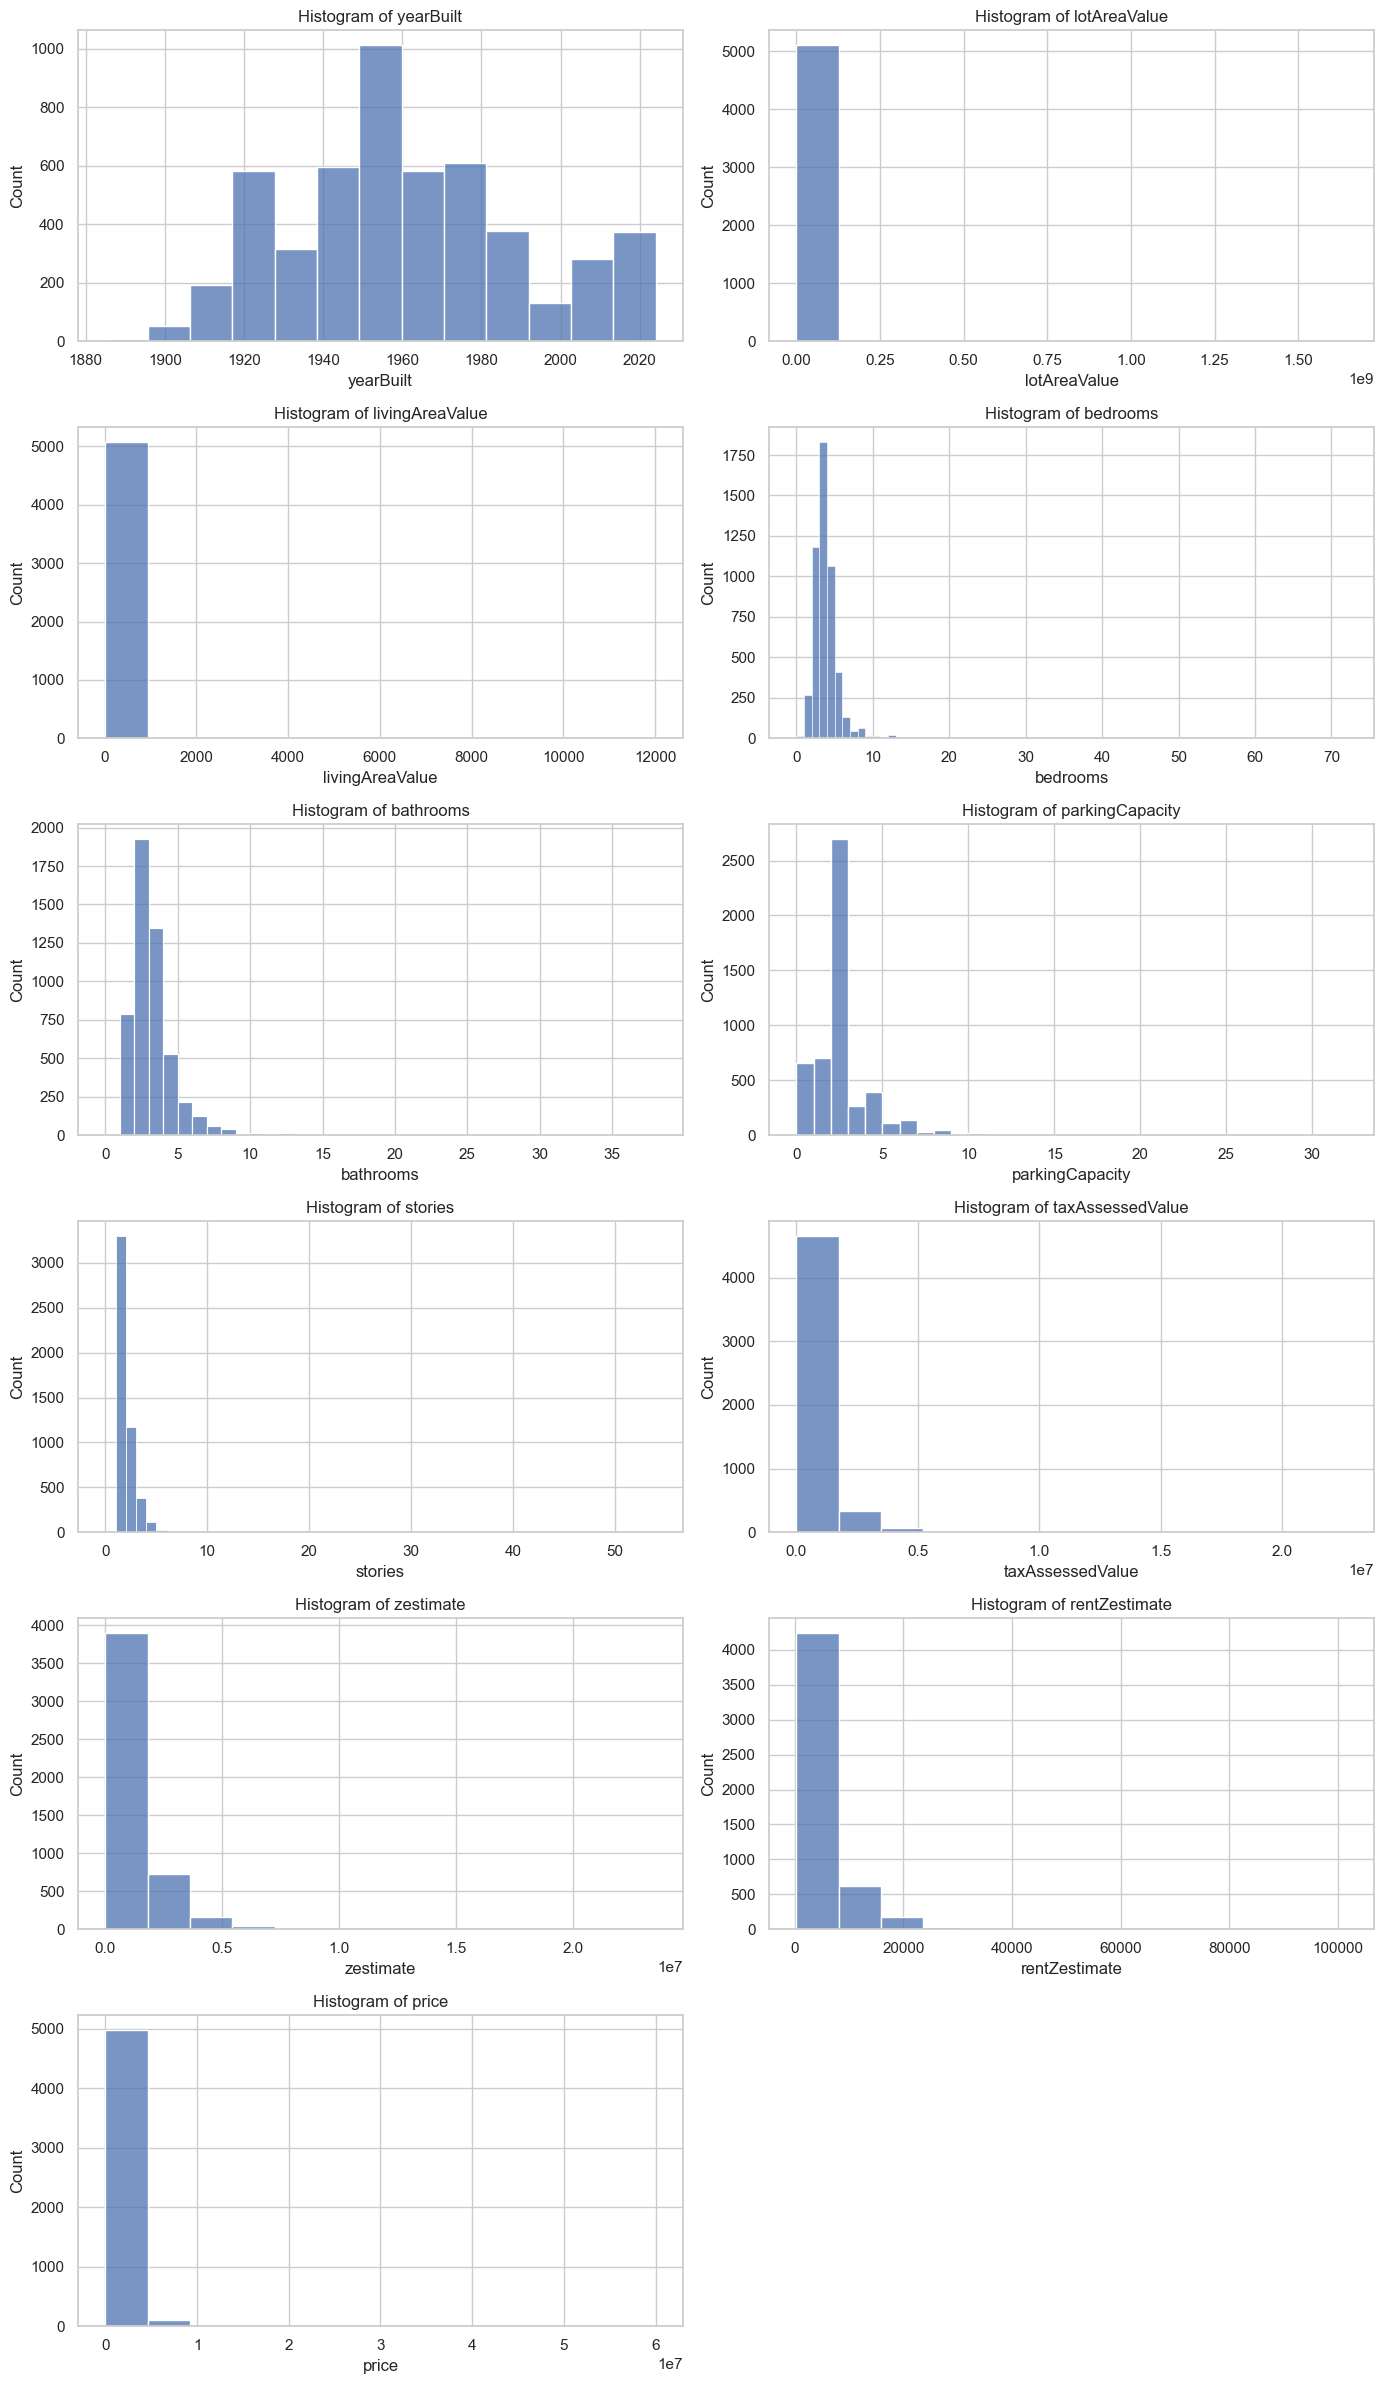

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


features = ["yearBuilt", "lotAreaValue", "livingAreaValue", "bedrooms", "bathrooms", "parkingCapacity", "stories",
            "taxAssessedValue", "zestimate", "rentZestimate", "price"]

num_features = len(features)

num_cols = 2
num_rows = int(np.ceil(num_features / num_cols))

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    if feature in ["bedrooms", "bathrooms", "stories", "parkingCapacity"]:
        bins = range(math.ceil(min(df[feature])), math.ceil(max(df[feature])) + 1)
        sns.histplot(df[feature], bins=bins, kde=False, ax=axes[i])
    else:
        sns.histplot(df[feature], bins=calc_num_of_bins_sturges_rule(df[feature]), kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

As you can see apart from `yearBuilt`, `bedrooms`, `bathrooms`, `parkingCapacity` and `stories` other features almost only have one bin and other bins are empty. This is probably because we have some significant outliers for those features and because of that other values go to one bin.

We also have outliers in `bedrooms`, `bathrooms`, `parkingCapacity` and `stories` but because we forced their bin width to be 1, we don't have the same problem for them.

We plot the boxplots of the features to visualize the significance of outliers in the data:

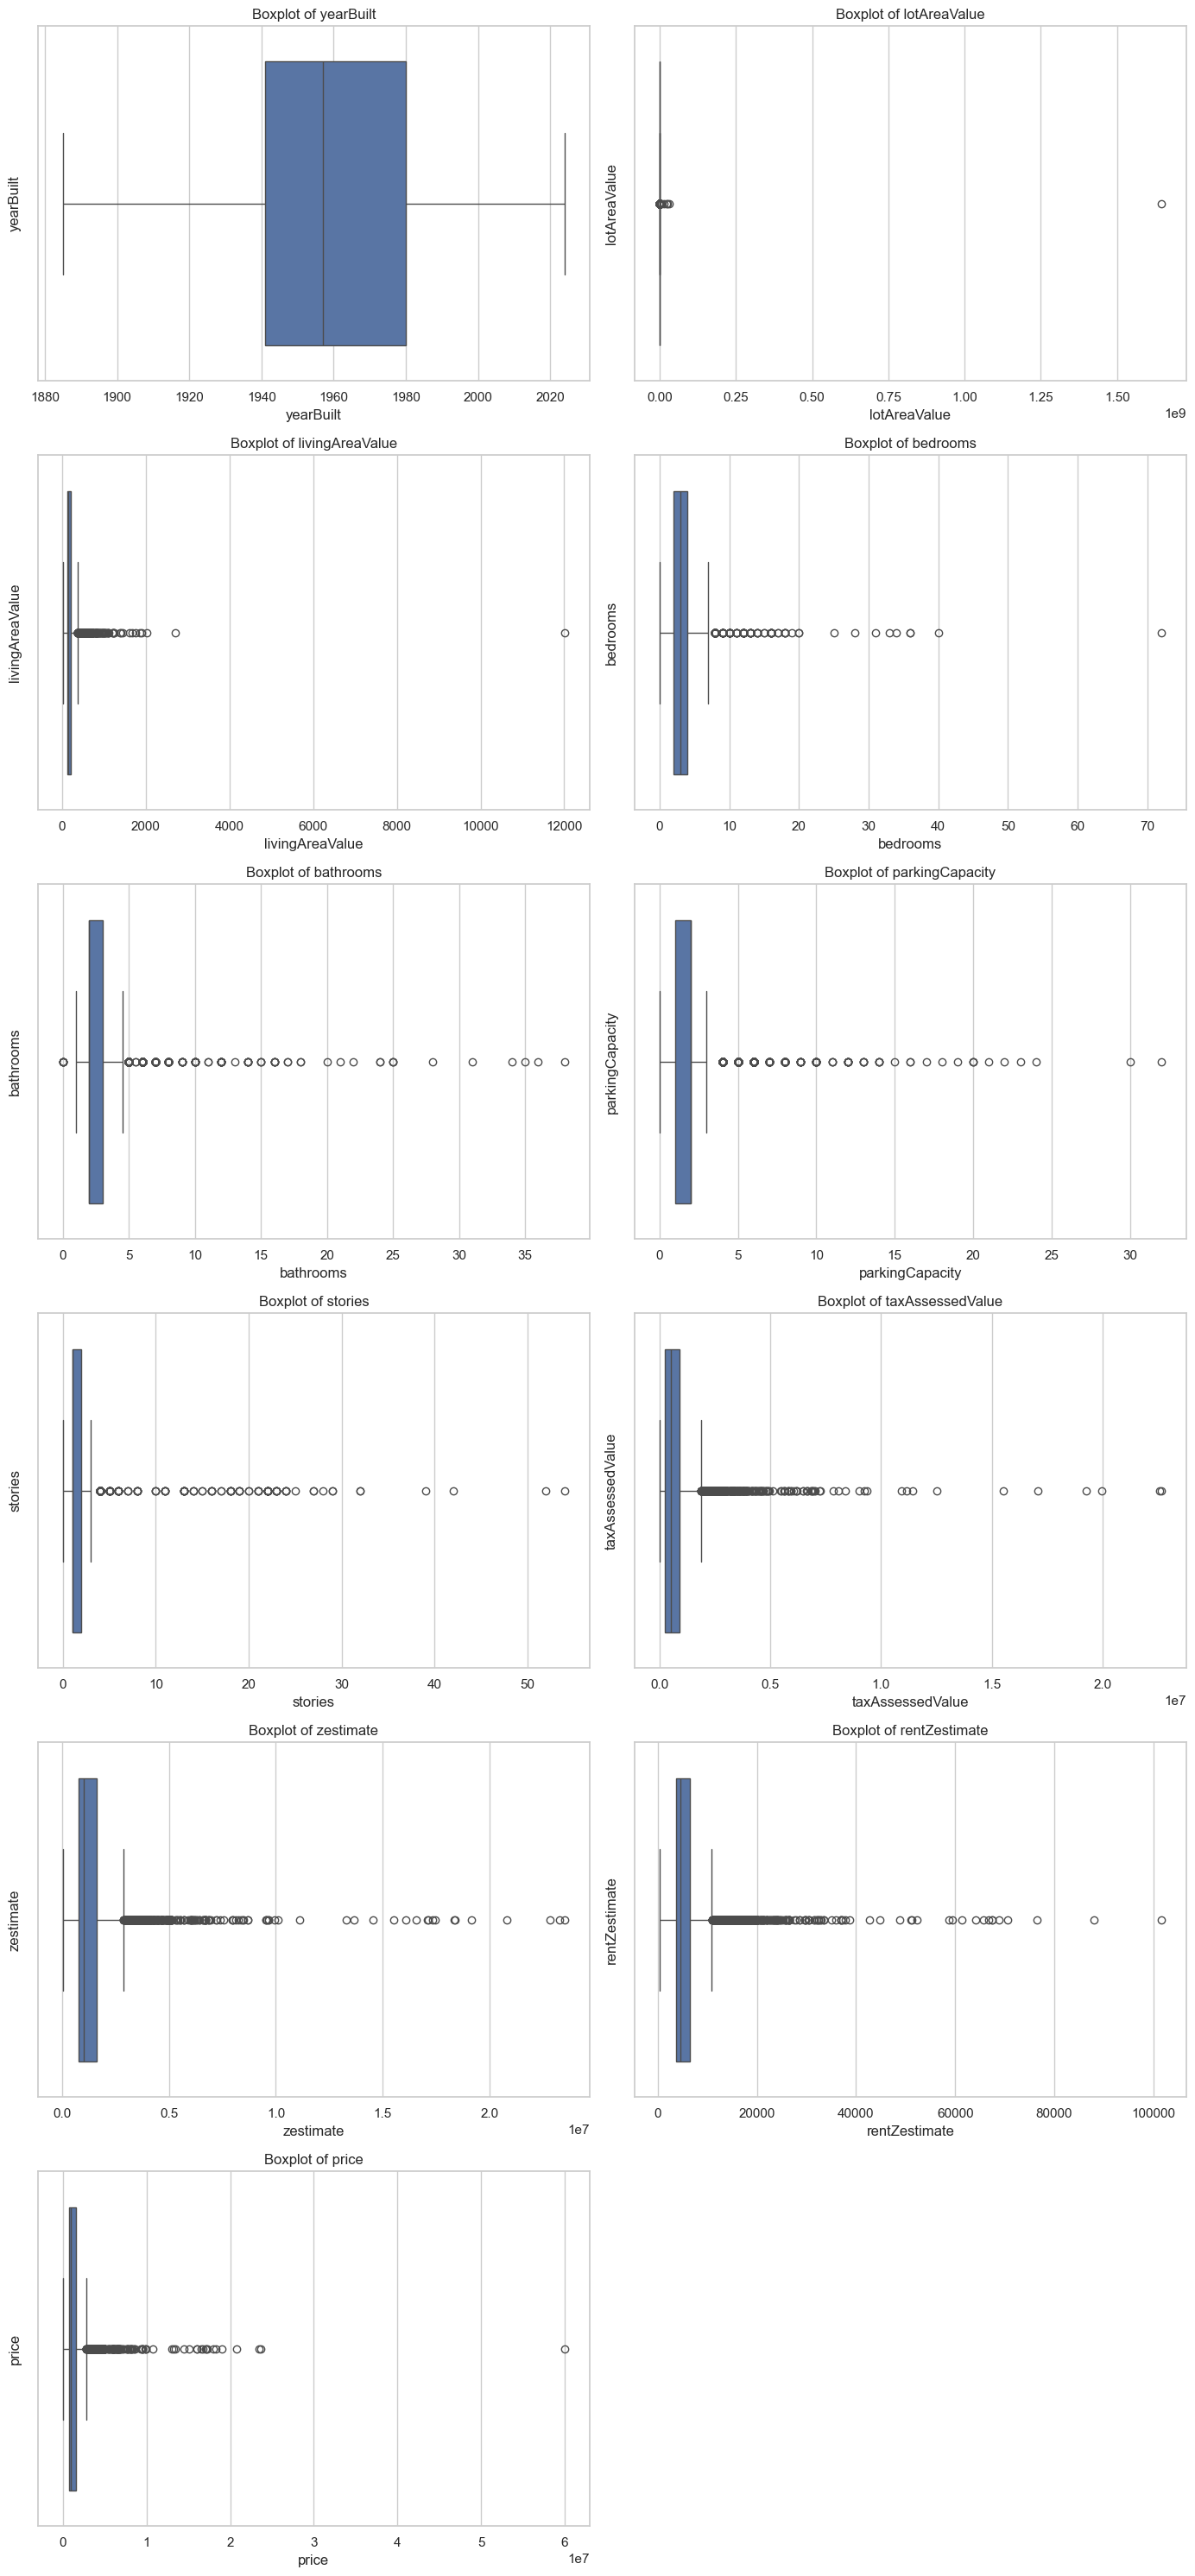

In [85]:
num_cols = 2
num_rows = int(np.ceil(num_features / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7 * num_cols, 5 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

From the boxplots we can see that most of our features have outliers with huge values! so in order to get a better understanding of other values we visualize the histograms of the features without the outliers.

First we write a function named `show_outliers` which return the dataframe containing the rows that are considered as outliers for a given feature. The method is based on the IQR method which is defined as the difference between the third quartile and the first quartile. The rows that have values outside the range of $[Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]$ are considered as outliers.

In [86]:
def show_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

Now we plot the histograms of the features without the outliers:

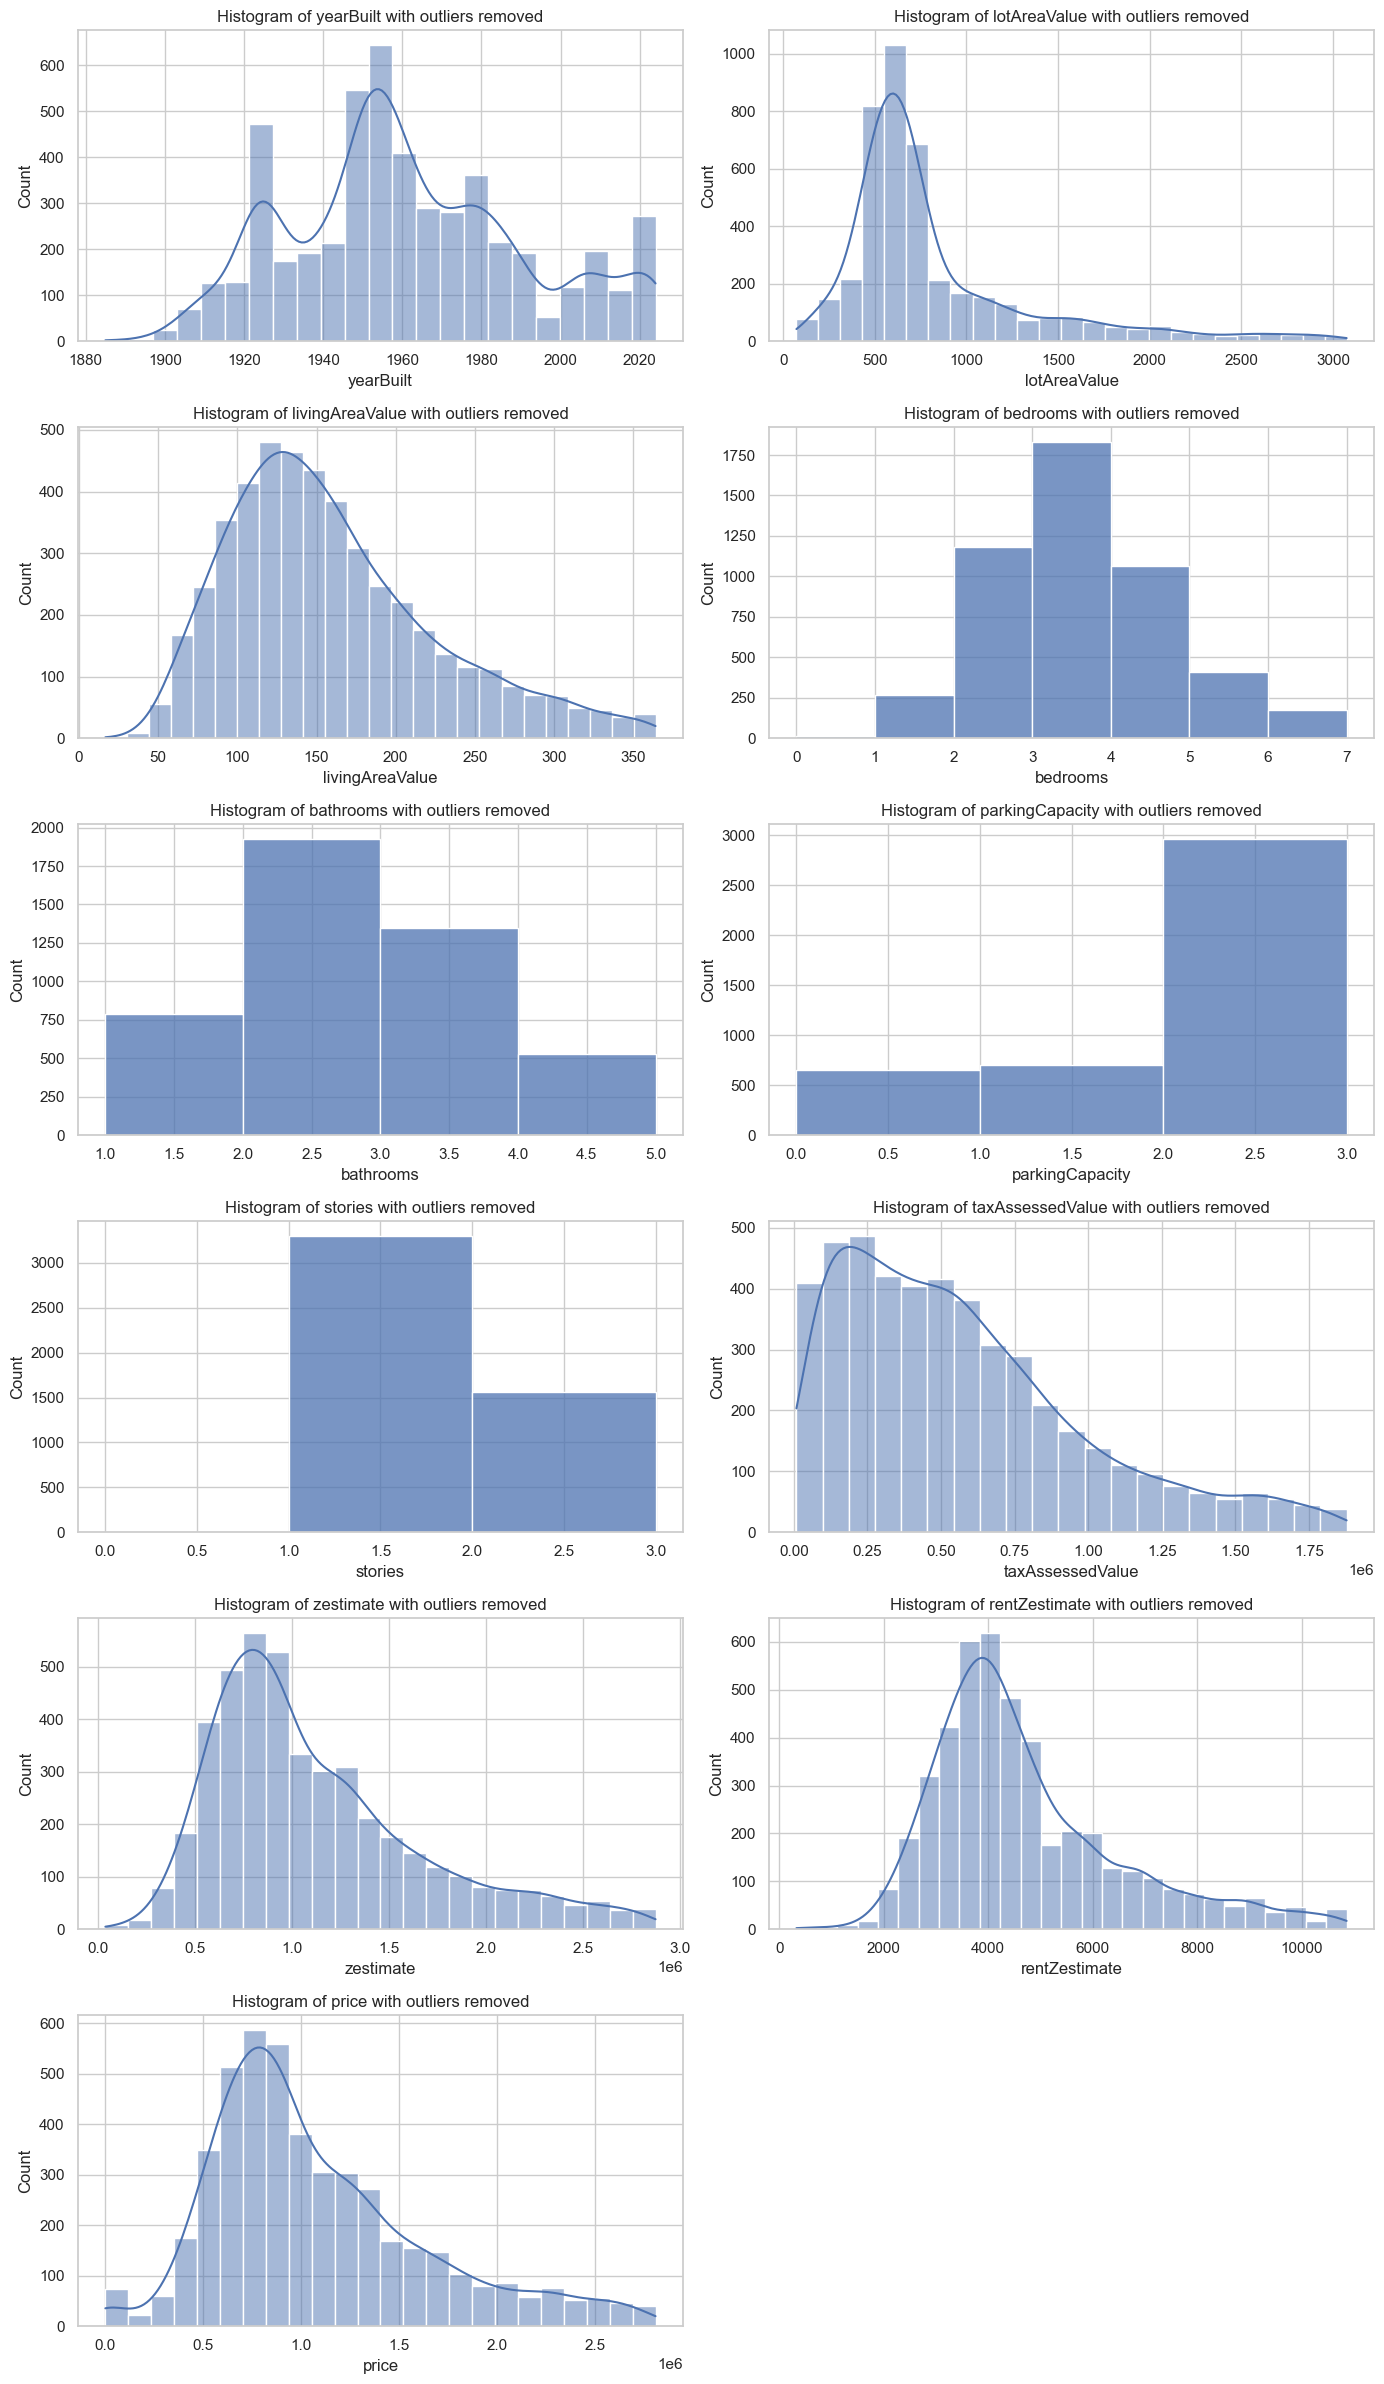

In [87]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    outliers = show_outliers(df, feature)
    df_no_outliers = df.drop(outliers.index)
    data = df_no_outliers[feature]
    if feature in ["bedrooms", "bathrooms", "stories", "parkingCapacity"]:
        bins = range(math.ceil(min(df_no_outliers[feature])), math.ceil(max(df_no_outliers[feature])) + 1)
        sns.histplot(data, bins=bins, kde=False, ax=axes[i])
    else:
        sns.histplot(data, bins=calc_num_of_bins_scott_rule(data), kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature} with outliers removed')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

Now we analyze the distributions of the features without the outliers:

* `yearBuilt`: We didn't have any outliers for this feature. The histogram has a peak between 1940 and 1960. it has a logical reason because after the world war II, Los Angeles began to grow rapidly and many new houses were built in that period.(see [here](https://en.wikipedia.org/wiki/History_of_Los_Angeles#Postwar:_Baby_boomers)) and in the second half of the 20th century, it began to reduce and the number of new houses built decreased.

* `lotAreaValue`: We can see that most of the houses have a lot area between 500 and 1000 square meters. The distribution is right-skewed and we have a few houses with high lot areas.

* `livingAreaValue`: The distribution is less skewed than the lot area but it's still right-skewed. Most of the houses have a living area between 100 and 200 square meters.

* `bedrooms`:  We can infer that most of the houses have 2 to 4 bedrooms.

* `bathrooms`: Most of the houses have 2 to 3 bathrooms.

* `parkingCapacity`: Most of the houses have 3 parking spaces and we also have a noticeable number of houses with no parking spaces at all!

* `stories`: Most of the houses have 1 or 2 stories.

* `taxAssessedValue`: taxAssessedValue is the value of the house that is right-skewed and the distribution looks uniform until 750000 and then it starts to decrease.

* `zestimate`, `rentZestimate`, `price`: These three features have a similar distribution(which is expected because they are highly correlated). the distribution is right-skewed and it seems that most of the houses have a price between 600000 and 1200000.

### Handling Outliers

Now that we found that we have some effective outliers in our data, we check each feature's outliers specifically and decide how we should handle them.

First we write two functions to show the box plot and hist plot of a feature in the dataset. The first function is `show_boxplot` and the second one is `show_histplot`.

In [88]:
import math 

def show_boxplot(df, feature):
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()
    
def show_hist(df, feature, discrete = False, bins_alg = calc_num_of_bins_sturges_rule):
    if discrete:
        bins = range(math.ceil(min(df[feature])), math.ceil(max(df[feature])) + 1)
        sns.histplot(df[feature], bins=bins, kde=False)
        plt.xticks(bins)
    else:
        bins = bins_alg(df[feature])
        sns.histplot(df[feature], bins=bins, kde=True)
    
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

#### LotAreaValue

First we check the box plot with outliers:

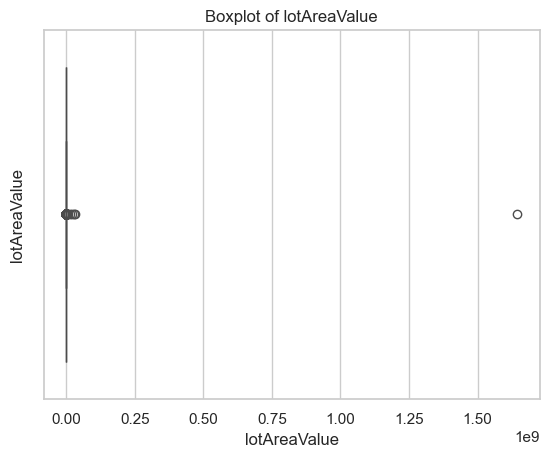

In [89]:
show_boxplot(df, 'lotAreaValue')

We can see that we have a lot area > 10^9 square meters which is 1000 square kilometers! Los angeles has a total area of 1300 square kilometers so it's impossible to have a house with a lot area of 1000 square kilometers! so we remove this row.

In [90]:
df[df['lotAreaValue'] > 1e9]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,rentZestimate,sold-history,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView
106,91316,5460 White Oak Ave UNIT A214,CONDO,1971,1.644773e+09,91.97397,2,2.0,3.0,['Wood'],...,2498.0,"[('2008-04-24', 210000), ('2007-09-18', 319000...",270000,2,1,1,0,0,1,1


In [91]:
df = df[df['lotAreaValue'] < 1e9]

We check the box plot again:

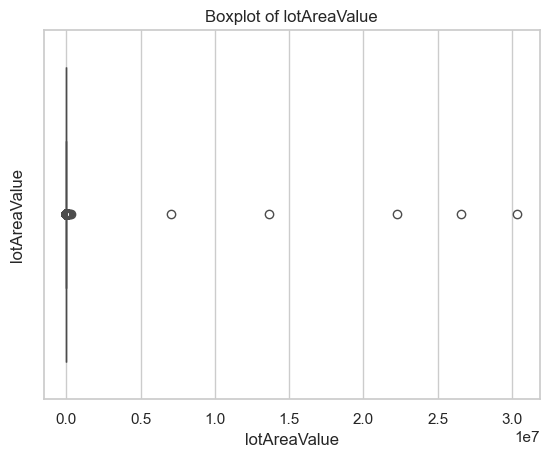

In [92]:
show_boxplot(df, 'lotAreaValue')

We can see that we have some rows with lot area > 10^6 square meters which is 1 square kilometer! We also remove these rows as they are not logical.(We checked those data in Zillow again and the lot area didn't make sense.)

In [93]:
df[df['lotAreaValue'] > 1e6]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,rentZestimate,sold-history,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView
21,91335,7317 White Oak Ave,SINGLE_FAMILY,1951,22257730.00,47.566336,2,1.0,1.0,[],...,2500.0,[],2500,0,0,0,0,0,0,0
44,91345,14377 Germain St,SINGLE_FAMILY,1955,30351450.00,164.066698,3,2.0,1.0,['Wood'],...,3999.0,"[('2022-02-15', 840000), ('2010-12-01', 339500...",4000,1,1,1,0,0,0,0
1137,90002,9614 Grape St,SINGLE_FAMILY,2024,13658152.50,123.096475,4,3.0,1.0,[],...,3640.0,"[('2022-12-02', 435000), ('2022-09-14', 359803)]",690000,2,1,1,0,0,0,1
3331,90732,2501 Bowfin Ave,SINGLE_FAMILY,1954,26600010.78,138.611276,3,2.0,1.0,[],...,4500.0,"[('2020-05-18', 805000), ('1998-08-28', 329000)]",1280000,2,1,0,1,0,0,1
3800,90024,10727 Wilshire Blvd APT 403,CONDO,2001,7061770.70,162.115735,2,3.5,1.0,[],...,5937.0,"[('2011-09-16', 960000), ('2006-07-05', 135000...",1539473,0,1,1,0,0,0,0


In [94]:
df = df[df['lotAreaValue'] < 1e6]

We repeat the same process and delete the rows with lot area > 10^5 square meters:

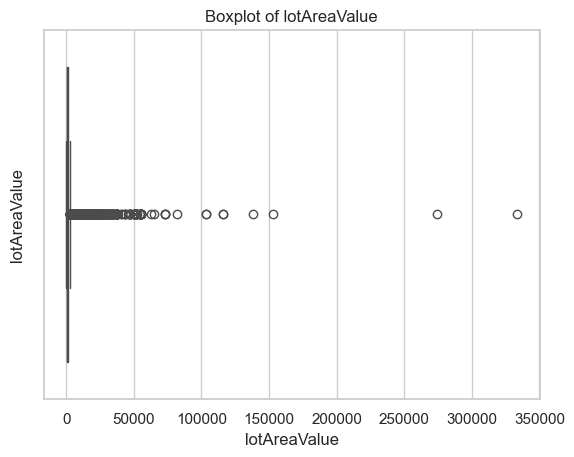

In [95]:
show_boxplot(df, 'lotAreaValue')

In [96]:
df[df["lotAreaValue"] > 1e5]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,rentZestimate,sold-history,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView
95,91304,24425 Woolsey Canyon Rd SPACE 34,MANUFACTURED,1980,153218.571146,134.709350,2,2.0,1.0,['Laminate'],...,697.0,[],157000,2,1,1,0,0,1,0
764,90016,5187 Village Grn,CONDO,1942,273972.422000,85.099148,1,1.0,1.0,['Wood'],...,3028.0,"[('2023-11-03', 550000), ('2012-02-03', 170000)]",608500,1,0,1,0,0,0,1
1978,91342,12207 Via Santa Barbara,SINGLE_FAMILY,1999,116106.032144,173.821513,3,3.0,2.0,[],...,3716.0,"[('1999-08-19', 231000)]",860000,3,1,1,1,0,1,1
2192,91342,12101 Via Santa Barbara,SINGLE_FAMILY,1999,116106.032144,222.409782,4,4.0,2.0,[],...,4896.0,"[('2009-05-20', 425000), ('1999-11-24', 266000)]",905000,3,1,1,1,0,0,1
2205,91342,13173 La Tierra Way,SINGLE_FAMILY,2001,333546.248060,258.363243,3,3.0,2.0,[],...,4308.0,[],900000,2,1,1,0,0,0,1
3177,91307,23236 W Vail Dr,SINGLE_FAMILY,1987,138495.285094,183.018910,3,3.0,2.0,"['Carpet', 'Tile', 'Wood']",...,4270.0,"[('2017-10-17', 799000)]",1220000,3,1,1,1,1,1,1
3420,90077,10125 Hollow Glen Cir,CONDO,1970,103172.075832,198.533711,3,3.0,1.0,[],...,7500.0,[],1313000,0,1,1,0,0,0,0
4088,90077,10136 Hollow Glen Cir,SINGLE_FAMILY,1970,103171.458212,217.300117,4,3.0,2.0,"['Carpet', 'Wood', 'Wood', 'Marble', 'Stone']",...,8570.0,"[('1995-08-01', 420000)]",1786000,2,1,1,1,1,0,1


In [97]:
df = df[df["lotAreaValue"] < 1e5]

We check the box plot again and stop here because it doesn't seem that the other outliers are incorrect data.

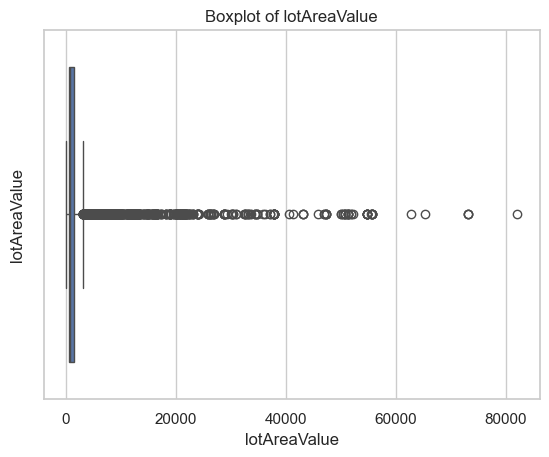

In [98]:
show_boxplot(df, 'lotAreaValue')

In [99]:
df[df["lotAreaValue"] > 60000]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,rentZestimate,sold-history,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView
74,91304,8811 Canoga Ave SPACE 535,MANUFACTURED,1971,82058.180220,124.861632,2,2.0,1.0,[],...,330.0,[],85000,1,1,1,0,0,0,1
3630,90067,2393 Century Hl,TOWNHOUSE,1980,73170.061602,211.261422,2,3.0,3.0,"['Carpet', 'Vinyl', 'Marble', 'Tile', 'Other']",...,8870.0,[],1427000,3,1,1,1,0,0,1
3766,90067,2302 Century Hl,TOWNHOUSE,1980,73149.017930,291.158002,2,4.0,4.0,"['Carpet', 'Tile', 'Mixed', 'Parquet']",...,11791.0,"[('2023-07-06', 608397), ('2022-10-31', 60755)]",1525000,3,1,1,1,0,0,1
4187,90049,12377 Ridge Cir,SINGLE_FAMILY,1979,65212.720784,278.801903,2,3.0,2.0,"['Marble', 'Wood']",...,11442.0,"[('2013-03-22', 1230000), ('1999-08-31', 740000)]",1860000,2,1,1,1,0,0,1
4430,90067,2335 Century Hl,CONDO,1980,73149.017930,234.487172,2,4.0,1.0,['Wood'],...,8410.0,[],2250000,3,1,1,1,0,0,1
4907,91040,9540 Dale Ave,SINGLE_FAMILY,1952,62666.031786,468.416926,4,5.0,2.0,"['Laminate', 'Tile', 'Wood']",...,15641.0,"[('2019-01-31', 2650000), ('2011-12-29', 10000...",4000000,22,1,1,1,1,1,1


What we found out about the reason of some high lot areas is that condos and town houses count the whole area of the building as the lot area. So we can see that most of the outliers are condos and town houses.

In [100]:
lot_area_outliers = show_outliers(df, 'lotAreaValue')
lot_area_outliers["homeType"].value_counts()

homeType
CONDO            519
TOWNHOUSE        219
SINGLE_FAMILY     68
APARTMENT          6
MANUFACTURED       2
MULTI_FAMILY       1
Name: count, dtype: int64

In [101]:
#df.loc(df["homeType"].isin(['CONDO', 'APARTMENT', "TOWNHOUSE"]), 'lotAreaValue') = df["livingAreaValue"]
#df.drop(lot_area_outliers[~lot_area_outliers['homeType'].isin(['CONDO', 'APARTMENT', "TOWNHOUSE"])].index, inplace=True)

We add a new column `log_lotAreaValue` to the dataset which is the log of the `lotAreaValue`. The reason is that the distribution of the `lotAreaValue` is too right-skewed and by taking the log we can have a more normal distribution and later it'll be easier to work with this column in the statistical analysis and machine learning models.

In [102]:
df['log_lotAreaValue'] = np.log10(df['lotAreaValue'])

We check the box plot and histogram of the `log_lotAreaValue`. As we can see the distribution is more normal now and the number of outliers is reduced.

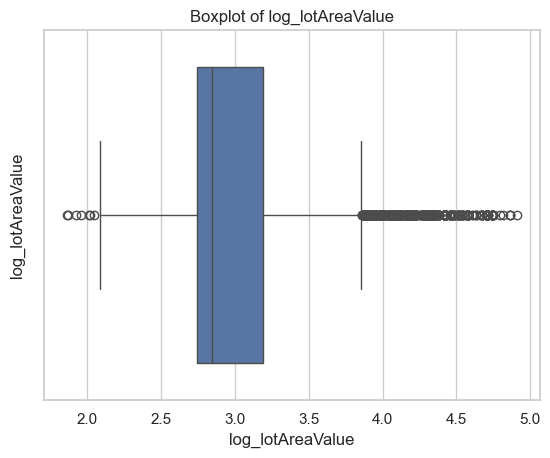

In [103]:
show_boxplot(df, 'log_lotAreaValue')

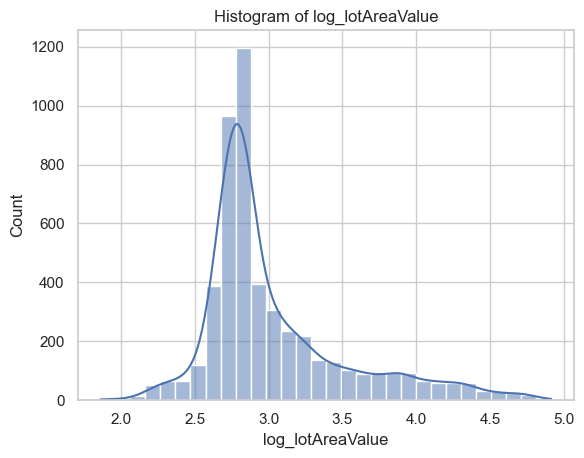

In [104]:
show_hist(df, 'log_lotAreaValue', bins_alg=calc_num_of_bins_scott_rule)

We check the skewness of the `log_lotAreaValue` and `lotAreaValue` and we can see that the skewness of the `log_lotAreaValue` is reduced significantly.(but it's still right-skewed)

- `Skewness`:
         $$\gamma = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^3}{(n-1) \cdot s^3}$$


if the skewness value is near 0 then the distribution is approximately symmetric. If the skewness value is less than -1 or greater than 1 then the distribution is substantially skewed.

In [105]:
df["lotAreaValue"].skew()

5.2209326644764245

In [106]:
df["log_lotAreaValue"].skew()

1.4238809033026052

#### Living Area

For the living area, we repeat the same process. First we check the box plot with outliers and then remove some significant outliers and then add a new column `log_livingAreaValue` to the dataset which is the log of the `livingAreaValue`.

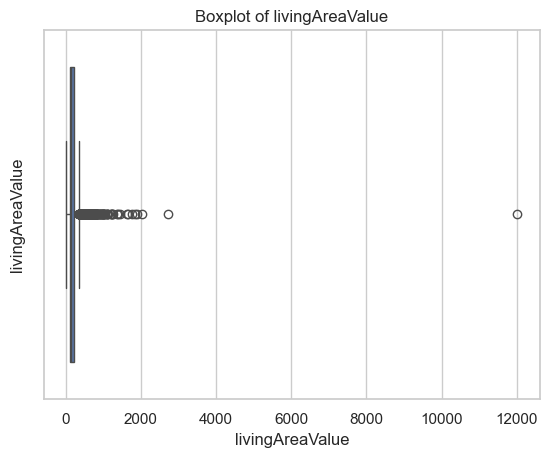

In [107]:
show_boxplot(df, 'livingAreaValue')

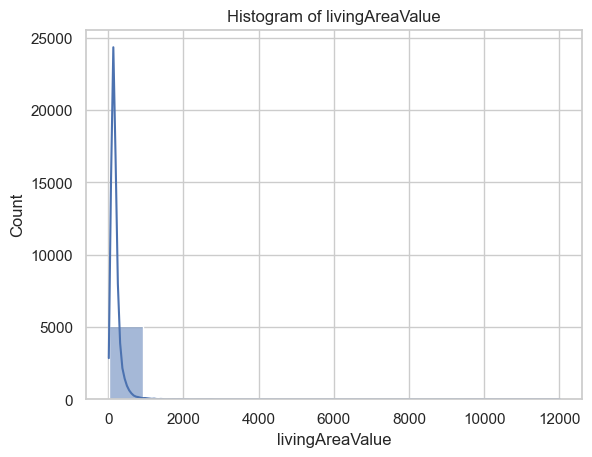

In [108]:
show_hist(df, 'livingAreaValue')

In [109]:
df[df['livingAreaValue'] > 1250]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,sold-history,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue
1674,91402,9146 Willis Ave,SINGLE_FAMILY,1976,1618.744000,1618.744000,4,2.0,1.0,[],...,"[('2009-05-22', 299500), ('2008-04-16', 540000...",800000,2,1,1,0,0,0,0,3.209178
4809,91605,13135 Vanowen St,MULTI_FAMILY,1960,1547.923950,1399.769501,33,25.0,2.0,[],...,[],3264000,14,1,1,0,0,0,0,3.189750
4846,90033,456 S Breed St,MULTI_FAMILY,1972,1751.871871,1751.871871,25,25.0,3.0,[],...,[],3600000,0,0,0,0,0,0,0,3.243502
4868,90210,9625 Oak Pass Rd,SINGLE_FAMILY,1974,1855.080624,1855.080624,4,4.0,2.0,"['Wood', 'Marble', 'Mixed', 'Tile', 'Cement', ...",...,"[('2018-08-09', 9000), ('2015-12-08', 1900000)...",3607500,4,1,1,1,1,1,1,3.268363
4961,90006,1029 Elden Ave,MULTI_FAMILY,1991,2024.263467,2024.263467,36,35.0,3.0,"['Laminate', 'Carpet']",...,[],4600000,32,1,1,0,0,0,0,3.306267
4980,90003,5869-5875 S San Pedro St,MULTI_FAMILY,2023,1667.330141,1667.330141,36,28.0,3.0,['Wood'],...,[],4800000,8,1,1,0,0,0,1,3.222022
5034,90034,10915 Rose Ave,MULTI_FAMILY,1971,1899.866350,1899.866350,31,31.0,1.0,[],...,[],4975000,0,1,0,0,0,0,0,3.278723
5060,90210,2859 Coldwater Canyon Dr,SINGLE_FAMILY,1959,12009.866422,12009.866422,7,6.0,2.0,['Other'],...,"[('2022-01-31', 11200000), ('2016-01-15', 1221...",7800000,20,1,1,1,0,0,1,4.079538
5069,91436,15824 Valley Vista Blvd,SINGLE_FAMILY,2024,1442.300904,1442.300904,5,7.0,2.0,['Wood'],...,"[('2022-06-30', 2850000), ('1996-09-13', 830000)]",8000000,3,1,1,1,0,0,1,3.159056
5085,90004,4804 Oakwood Ave,APARTMENT,2022,2709.608898,2709.608898,6,4.0,1.0,[],...,[],13450000,0,1,0,0,0,0,0,3.432907


In [110]:
df = df[df["livingAreaValue"] < 1250]

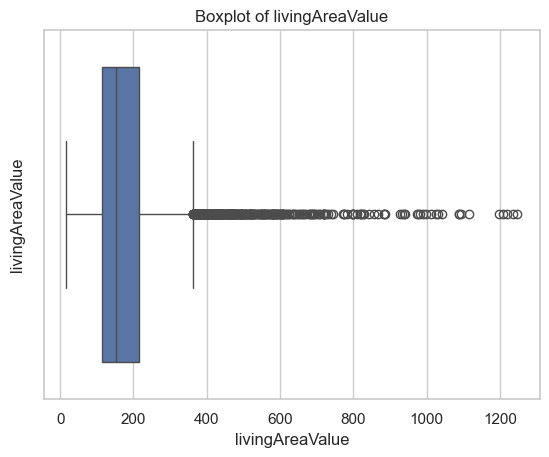

In [111]:
show_boxplot(df, 'livingAreaValue')

As you can see the living area has a much better distribution after removing the outliers.

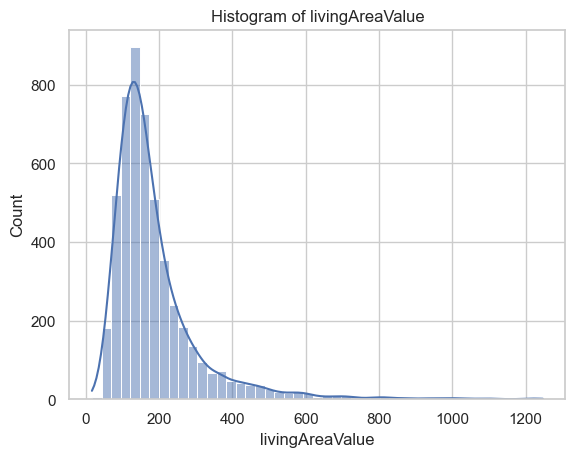

In [112]:
show_hist(df, 'livingAreaValue', bins_alg=calc_num_of_bins_scott_rule)

`log_livingAreaValue` is much less skewed and is more normal than the `livingAreaValue`.

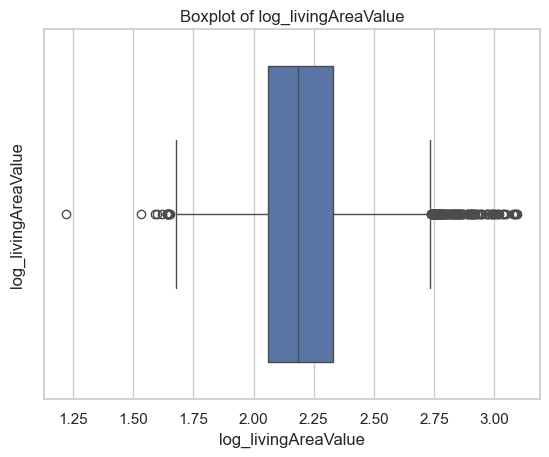

In [113]:
df["log_livingAreaValue"] = np.log10(df["livingAreaValue"])

show_boxplot(df, 'log_livingAreaValue')

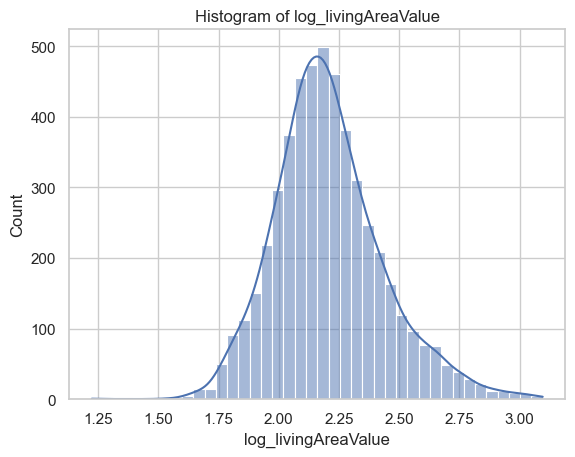

In [114]:
show_hist(df, 'log_livingAreaValue', bins_alg=calc_num_of_bins_scott_rule)

In [115]:
df["livingAreaValue"].skew()

3.048128342469588

In [116]:
df["log_livingAreaValue"].skew()

0.5788024874027203

We also plot the QQ plot of the `log_livingAreaValue` to see how close it is to the normal distribution:

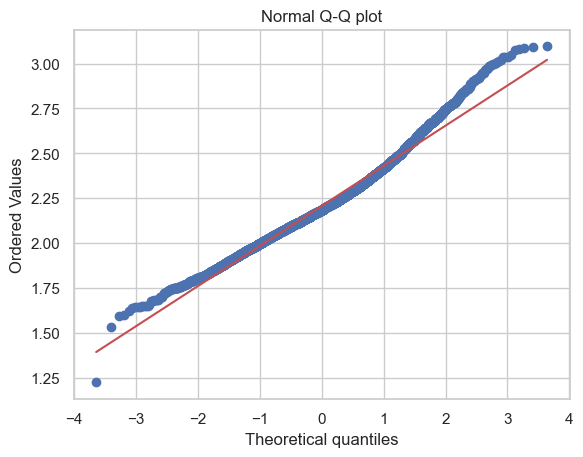

In [117]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['log_livingAreaValue'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

#### bedrooms

For bedrooms we found out that the houses with strangely high number of bedrooms are multi-family houses and we can't say that they are outliers because they are not incorrect data. So we don't remove any rows for this feature.

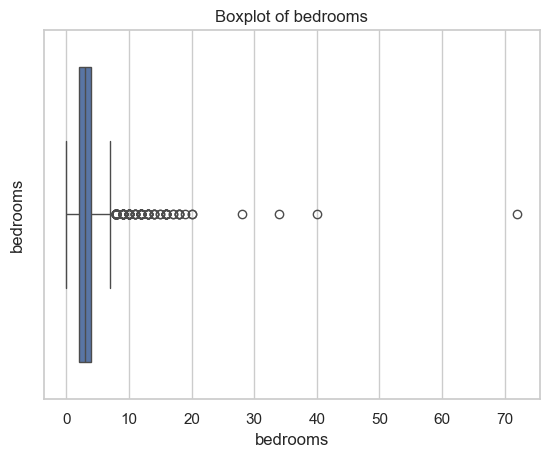

In [118]:
show_boxplot(df, 'bedrooms')

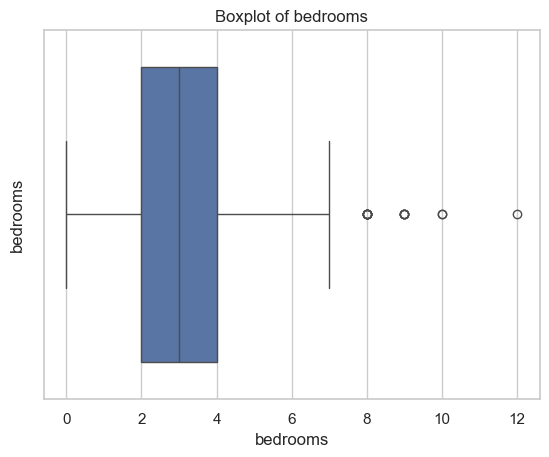

In [119]:
show_boxplot(df[df["homeType"] != "MULTI_FAMILY"], 'bedrooms')

In [120]:
df[df["homeType"] != "MULTI_FAMILY"]["bedrooms"].value_counts()

bedrooms
3     1793
2     1151
4      960
5      352
1      261
6       85
7       19
0       16
8        8
9        5
10       2
12       1
Name: count, dtype: int64

If we plot the number of bedrooms for houses that are not multi-family, we can see that the outliers are removed and the distribution is more normal.

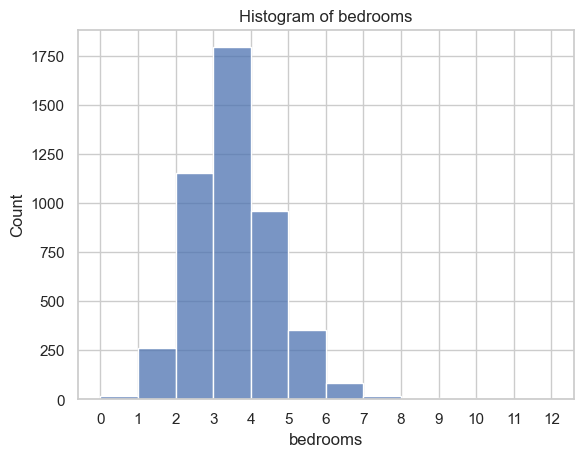

In [121]:
show_hist(df[df["homeType"] != "MULTI_FAMILY"], 'bedrooms', discrete=True)

#### bathrooms

The same thing goes for the bathrooms. We have some houses with a high number of bathrooms but they are not incorrect data as they are for multi-family houses. So we don't remove any rows for this feature.

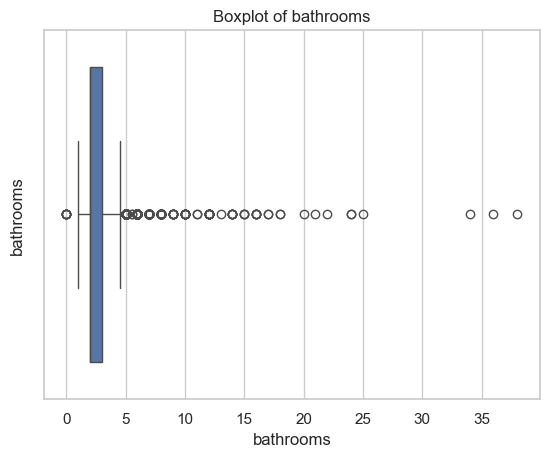

In [122]:
show_boxplot(df, 'bathrooms')

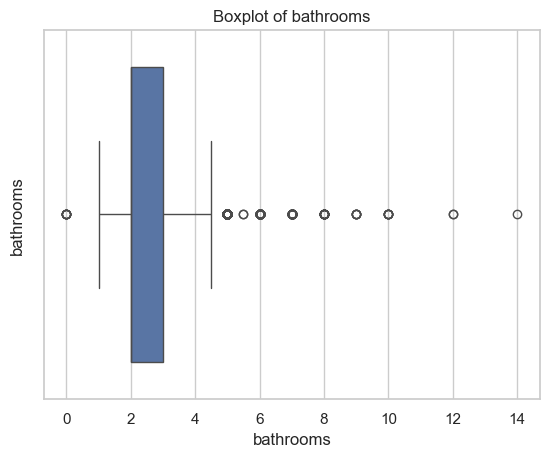

In [123]:
show_boxplot(df[df["homeType"] != "MULTI_FAMILY"], 'bathrooms')

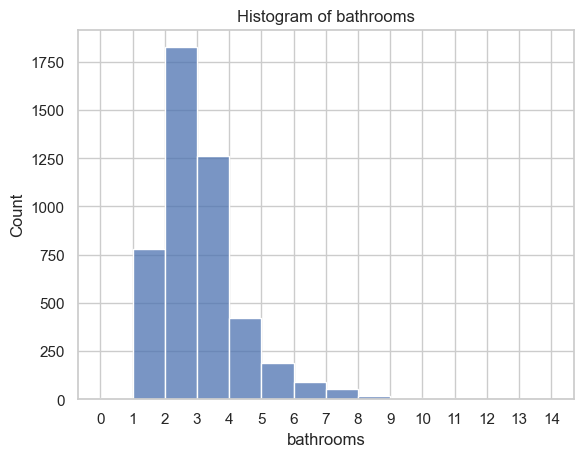

In [124]:
show_hist(df[df["homeType"] != "MULTI_FAMILY"], 'bathrooms', discrete=True)

#### Parking Capacity

We also don't remove any outliers of the parking capacity because they don't seem to be incorrect data.

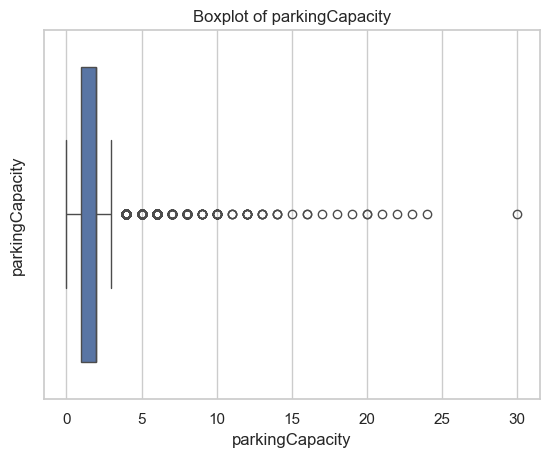

In [125]:
show_boxplot(df, 'parkingCapacity')

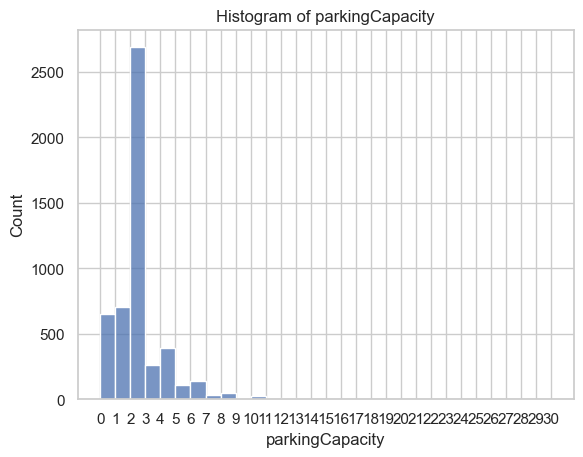

In [126]:
show_hist(df, 'parkingCapacity', discrete=True)

In [127]:
df[df["parkingCapacity"] > 15]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue
431,90004,532 N Rossmore Ave APT 409,CONDO,1972,1737.721684,65.125003,1,1.0,4.0,"['Carpet', 'Tile']",...,499500,21,1,1,0,0,0,1,3.239980,1.813748
1729,91331,13960 Filmore St,SINGLE_FAMILY,1929,1016.824672,98.105568,3,2.0,1.0,[],...,810000,30,1,0,1,0,0,1,3.007246,1.991694
4374,90065,3429 Andrita St,MULTI_FAMILY,1962,1257.764088,800.266442,14,17.0,3.0,[],...,2175000,23,1,1,0,0,0,0,3.099599,2.903235
4648,90731,970-964 W Santa Cruz St,MULTI_FAMILY,1979,1207.554781,718.697608,16,10.0,2.0,[],...,2760000,18,0,1,0,0,0,0,3.081907,2.856546
4659,91606,11848 Oxnard St,MULTI_FAMILY,1954,1757.146612,941.293196,16,14.0,3.0,"['Mixed', 'Laminate', 'Wood', 'Tile', 'Linoleu...",...,2750000,17,1,1,1,0,0,0,3.244808,2.973725
4676,90026,275 Lucas Ave,MULTI_FAMILY,1964,1129.237449,999.450474,8,22.0,2.0,[],...,2908000,24,0,0,0,0,0,0,3.052785,2.999761
4710,91325,17302 Lassen St,SINGLE_FAMILY,1916,5880.492266,1024.627187,12,10.0,1.0,"['Vinyl', 'Wood']",...,3000000,20,1,1,1,1,0,1,3.769414,3.010566
4907,91040,9540 Dale Ave,SINGLE_FAMILY,1952,62666.031786,468.416926,4,5.0,2.0,"['Laminate', 'Tile', 'Wood']",...,4000000,22,1,1,1,1,1,1,4.797032,2.670633
4946,91601,10916 Peach Grove St,MULTI_FAMILY,1986,926.242910,926.242910,20,20.0,3.0,[],...,4057725,19,1,1,0,0,0,0,2.966725,2.966725
5001,90025,1218 McClellan Dr,MULTI_FAMILY,1972,1092.353474,1092.353474,16,16.0,2.0,[],...,4965000,16,0,0,0,0,0,0,3.038363,3.038363


#### stories

We found out that the outliers in the stories are all condos and town houses and they probably set the number of all the stories of the building but each unit is only one story. So we set the number of stories of these houses to 1.

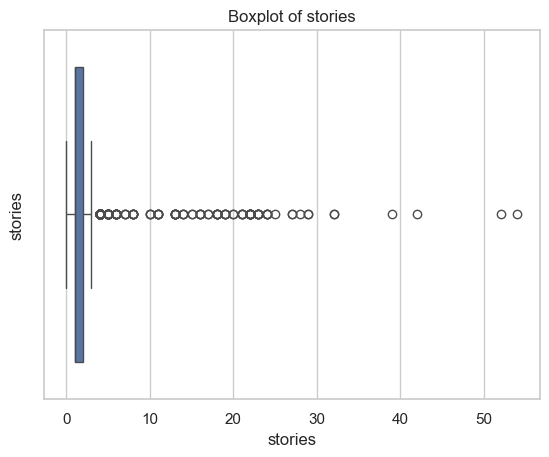

In [128]:
show_boxplot(df, 'stories')

In [129]:
df[df["stories"] > 25]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue
321,90012,800 W 1st St APT 2202,CONDO,1968,9865.839994,70.792086,1,1.0,32.0,"['Laminate', 'Wood']",...,460000,1,1,1,0,0,0,1,3.994134,1.849985
1456,90012,800 W 1st St APT 1903,CONDO,1968,9865.839994,114.642302,2,2.0,32.0,['Laminate'],...,753000,1,1,1,0,0,1,1,3.994134,2.059345
2798,90017,1100 Wilshire Blvd APT 2102,CONDO,1986,2518.360978,148.644800,2,2.0,39.0,"['Wood', 'Tile']",...,1075000,2,1,1,1,0,0,1,3.401118,2.172150
4049,90067,2220 Avenue Of The Stars UNIT 2506,CONDO,1964,16523.734066,151.803502,2,2.0,28.0,['Tile'],...,1750000,2,1,1,0,0,1,1,4.218108,2.181282
4052,90024,10490 Wilshire Blvd APT 406,CONDO,1989,7873.975502,257.898728,2,3.0,29.0,"['Carpet', 'Tile', 'Wood']",...,1750026,2,1,1,1,0,0,1,3.896194,2.411449
4178,90067,2222 Avenue Of The Stars UNIT 504,CONDO,1964,16519.282520,199.276935,3,3.0,27.0,"['Wood', 'Tile', 'Carpet']",...,1895000,2,1,1,0,0,0,1,4.217991,2.299457
4437,90015,900 W Olympic Blvd UNIT 39J,CONDO,2010,37105.254654,202.528540,2,3.0,52.0,"['Wood', 'Mixed']",...,2315000,2,1,1,0,0,0,1,4.569435,2.306486
4510,90015,900 W Olympic Blvd UNIT 47C,CONDO,2010,37094.328132,242.105218,3,4.0,54.0,"['Wood', 'Marble', 'Carpet', 'Stone', 'Wood']",...,2500000,2,1,1,1,0,0,1,4.569308,2.384004
4590,90024,10580 Wilshire Blvd APT 12SW,CONDO,1991,4283.196624,256.133571,2,3.0,27.0,['Mixed'],...,2500000,2,1,1,0,0,0,1,3.631768,2.408467
4860,90067,1 W Century Dr UNIT 7C,CONDO,2010,14992.806928,258.270340,2,3.0,42.0,"['Wood', 'Marble']",...,3700000,2,1,1,1,0,0,1,4.175883,2.412075


In [130]:
df[df["stories"] > 5]["homeType"].value_counts()

homeType
CONDO        96
TOWNHOUSE     1
Name: count, dtype: int64

In [131]:
df[df['homeType'] == 'CONDO']['stories'].value_counts().head()

stories
1.0    437
2.0    138
3.0    136
4.0     99
5.0     27
Name: count, dtype: int64

In [132]:
df.loc[df['homeType'] == 'CONDO', 'stories'] = 1

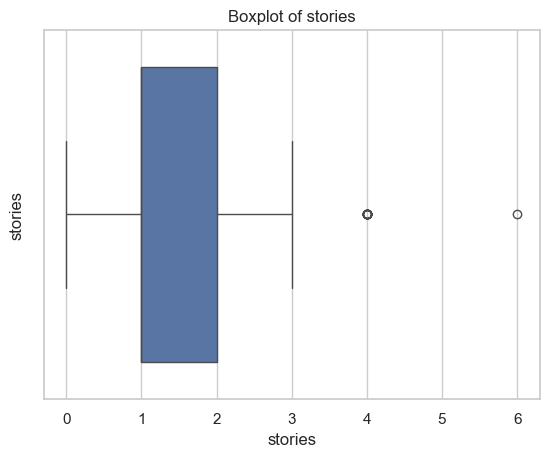

In [133]:
show_boxplot(df, 'stories')

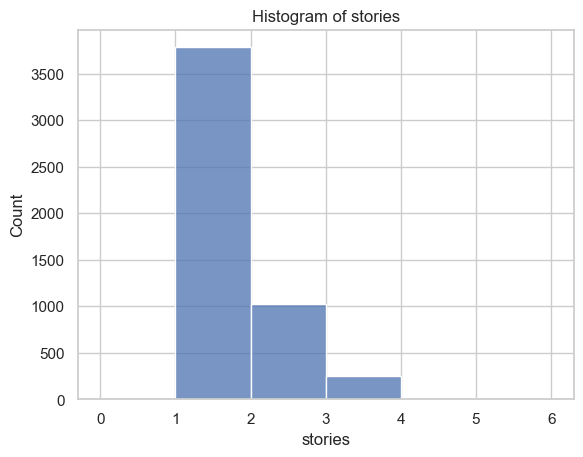

In [134]:
show_hist(df, 'stories', discrete=True)

In [135]:
df[df["stories"] > 4]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue
1051,90024,1440 Veteran Ave APT 601,TOWNHOUSE,1972,8999.002582,74.136594,2,1.0,6.0,"['Carpet', 'Tile', 'Wood']",...,670000,1,1,1,0,0,0,1,3.954194,1.870033


We save the data before removing the price outliers as we may have some works with price outliers in the future!

In [136]:
df.to_csv('data_with_price_outliers.csv', index=False)

#### price


We check the box plot of the price and we see that we have houses with much higher prices than the others. We use the same method as before and create a new column `log_price` which is the log of the `price`.

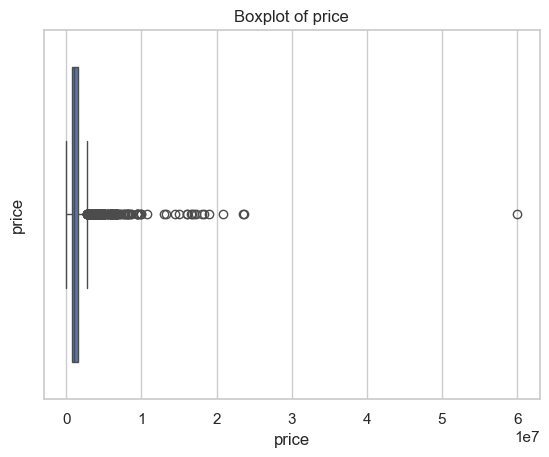

In [137]:
show_boxplot(df, 'price')

We can see that the box plot of the `log_price` is much better than the `price`. Because now we can also detect the outliers from the left side of the box plot.(the houses with lower prices)

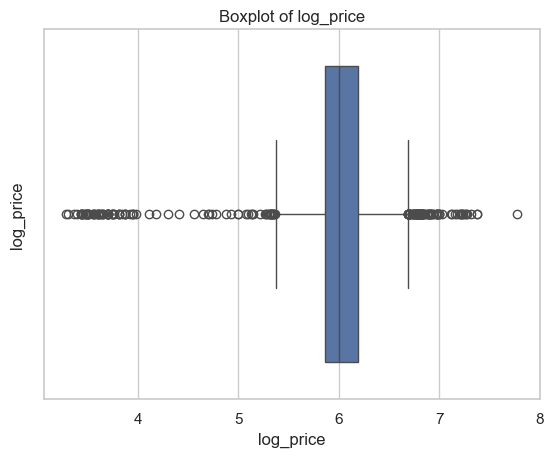

In [138]:
df["log_price"] = np.log10(df['price'])
show_boxplot(df, 'log_price')

Also the distribution of the `log_price` is much more normal than the `price`.

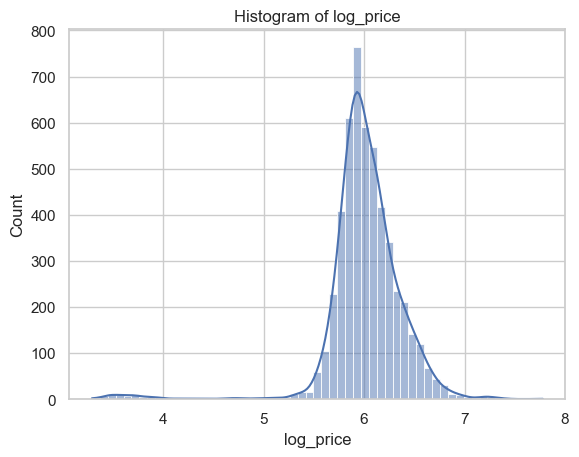

In [139]:
show_hist(df, 'log_price', bins_alg=calc_num_of_bins_scott_rule)

Now in order to remove the outliers, we check the zestimate(estimated price by Zillow) and the real price and remove those that the ratio of the price to the zestimate is less than 0.5 or greater than 2.(We reached this threshold gradually by checking the data and we found that this threshold is the best one.)

In [140]:
show_outliers(df, 'log_price')[["zestimate", "price"]]

,zestimate,price
0,701200.0,3050
1,734100.0,3100
2,464800.0,2800
3,759600.0,3600
4,498300.0,3100
...,...,...
5098,NaN,16000000
5099,13650900.0,13250000
5100,17094300.0,16750000
5101,13303200.0,12999000


In [141]:
df["zestimate/price"] = df["zestimate"] / df["price"]

In [142]:
df["zestimate/price"].describe()

count    4827.000000
mean        3.883203
std        26.268627
min         0.321809
25%         1.006095
50%         1.016375
75%         1.026667
max       409.863014
Name: zestimate/price, dtype: float64

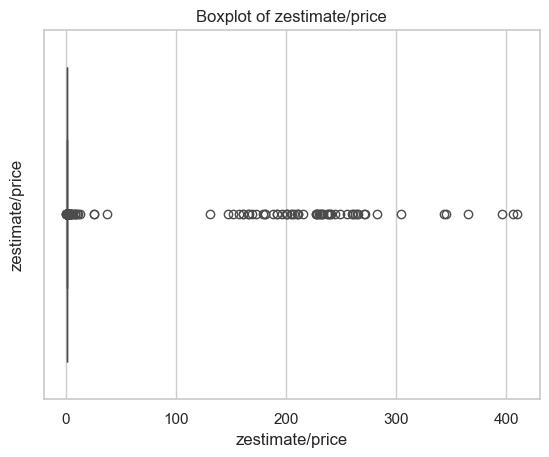

In [143]:
show_boxplot(df, 'zestimate/price')

In [144]:
df = df[(df["zestimate/price"] < 10)]

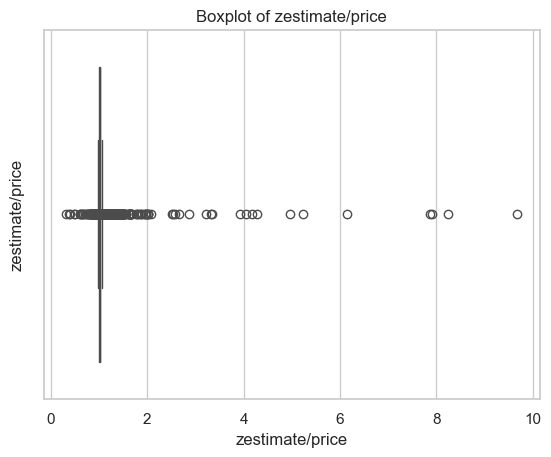

In [145]:
show_boxplot(df, 'zestimate/price')

In [146]:
df = df[(df["zestimate/price"] < 2)]

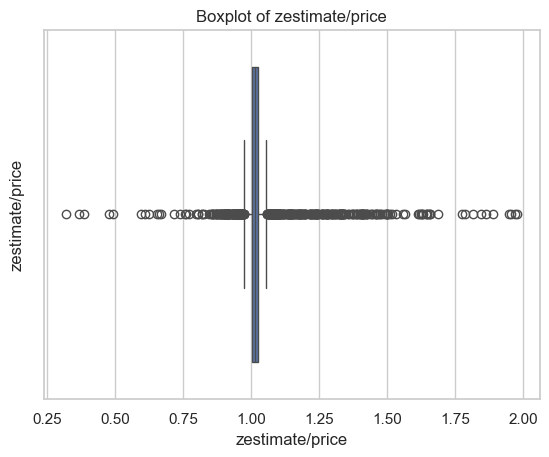

In [147]:
show_boxplot(df, 'zestimate/price')

In [148]:
df = df[(df["zestimate/price"] > 0.5)]

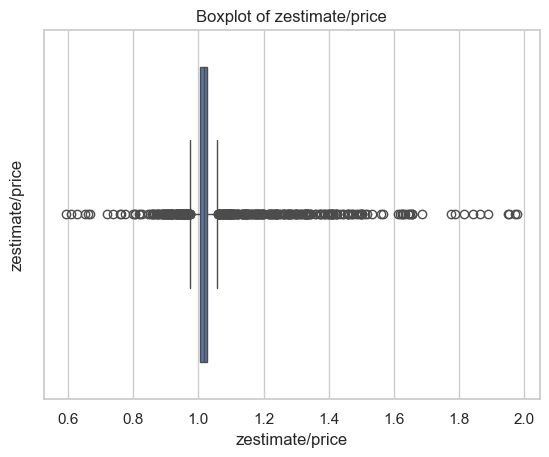

In [149]:
show_boxplot(df, 'zestimate/price')

Now we can see some of the outliers are removed using this method and now the distribution of the `log_price` is much better.

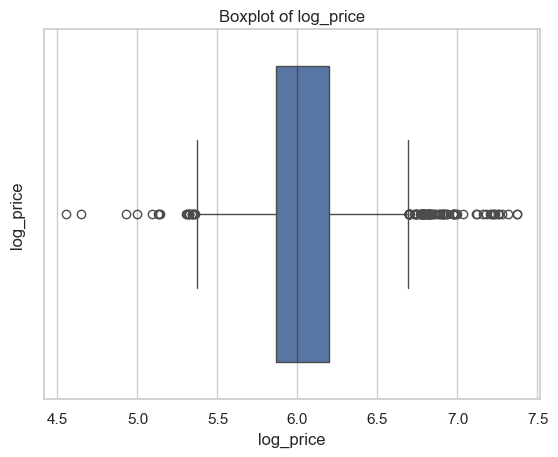

In [150]:
show_boxplot(df, "log_price")

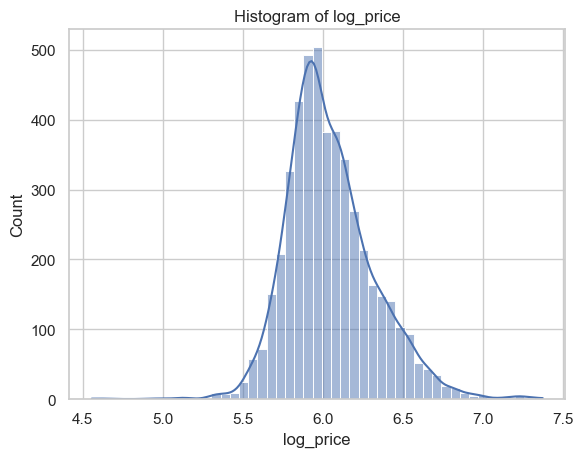

In [151]:
show_hist(df, "log_price", bins_alg=calc_num_of_bins_scott_rule)

We check the skewness and the QQ plot of the `log_price` to show how close it is to a normal distribution.

In [152]:
skewness = df["log_price"].skew()
print(f"Skewness: {skewness:.2f}")

Skewness: 0.64


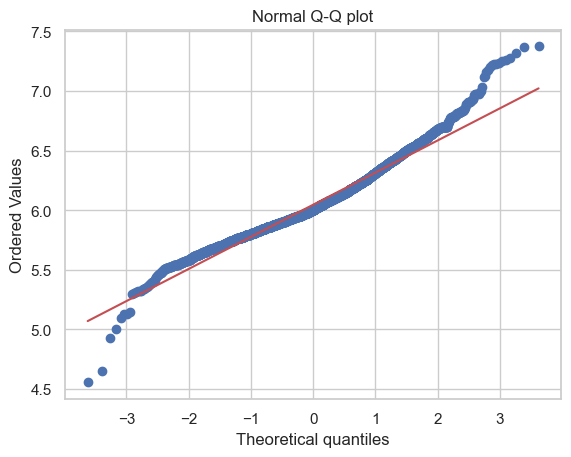

In [153]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['log_price'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Finally we check the distributions of price in different home types.

In [154]:
df["homeType"].value_counts()

homeType
SINGLE_FAMILY    3133
CONDO             890
MULTI_FAMILY      396
TOWNHOUSE         293
APARTMENT          11
MANUFACTURED       10
LOT                 2
Name: count, dtype: int64

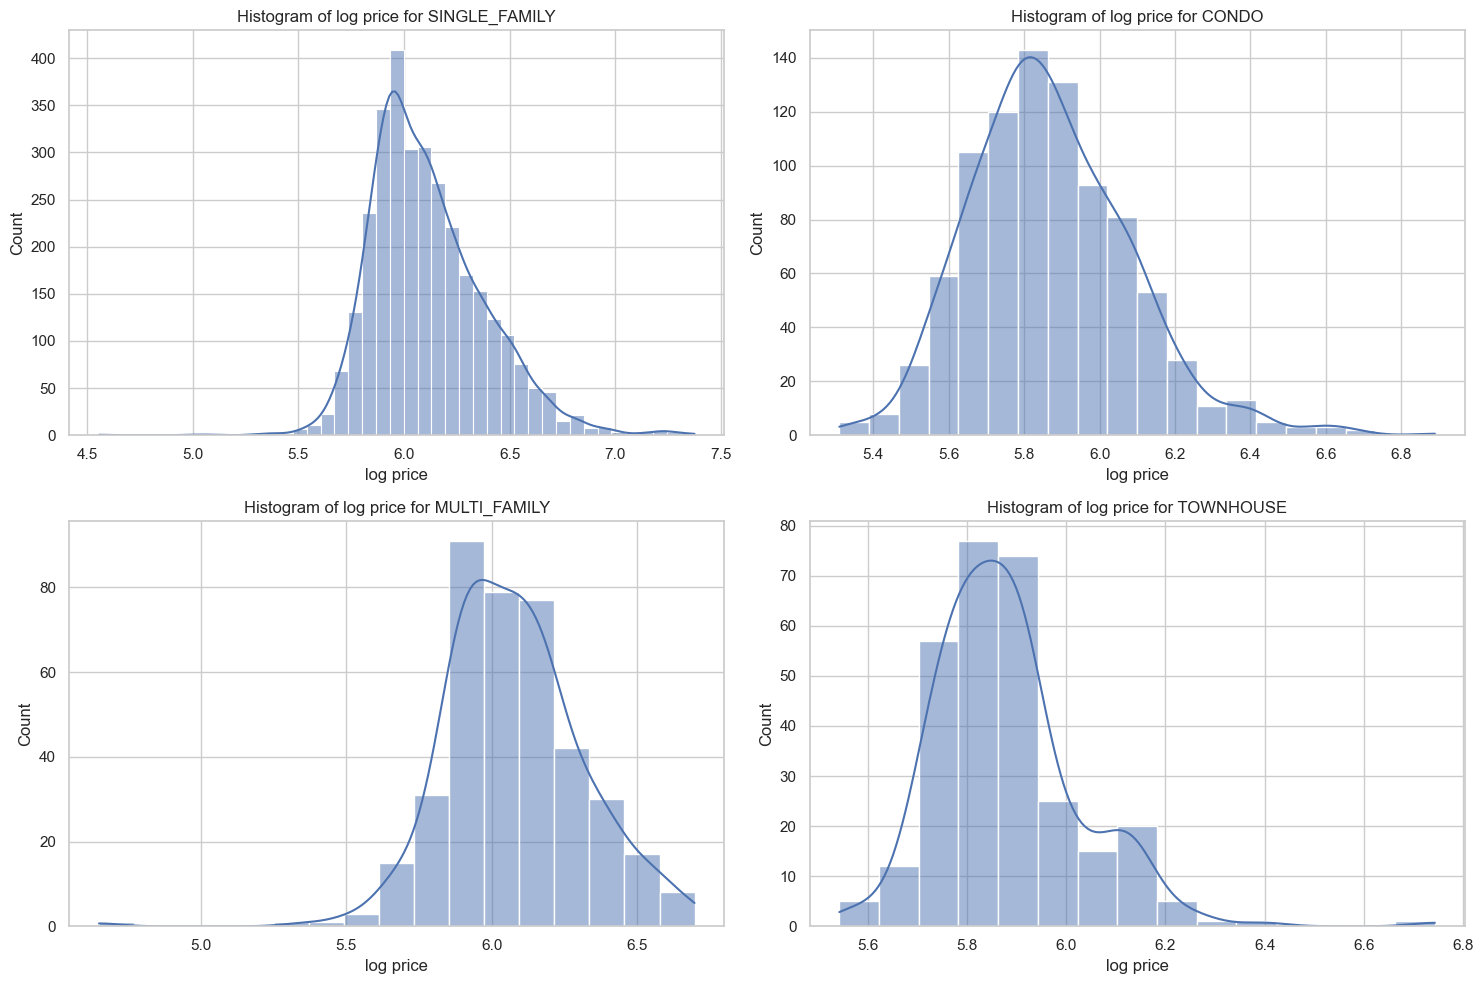

In [155]:
types = ["SINGLE_FAMILY", "CONDO", "MULTI_FAMILY", "TOWNHOUSE"]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
for i, home_type in enumerate(types):
    data = df[df["homeType"] == home_type]["log_price"]
    sns.histplot(data, bins=calc_num_of_bins_scott_rule(data), kde=True, ax=ax[i])
    ax[i].set_title(f'Histogram of log price for {home_type}')
    ax[i].set_xlabel('log price')
    ax[i].set_ylabel('Count')

plt.tight_layout()

As you can see the distributions are similar and we can also infer that the price of condos and town house is less than single family and multi-family houses.

#### tax assessed value

For tax assessed value we repeat the same process and create a new column `log_taxAssessedValue` which is the log of the `taxAssessedValue`.

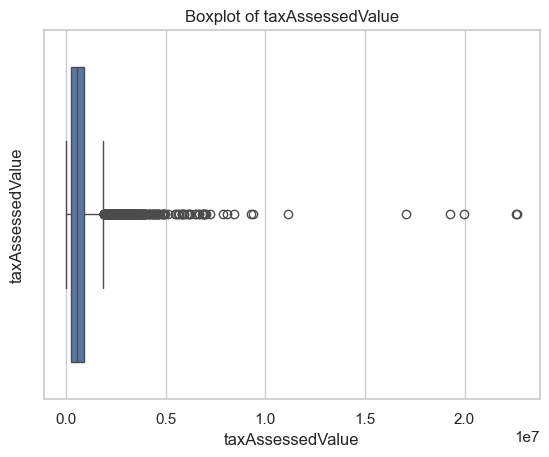

In [156]:
show_boxplot(df, 'taxAssessedValue')

In [157]:
df["log_taxAssessedValue"] = np.log10(df['taxAssessedValue'])

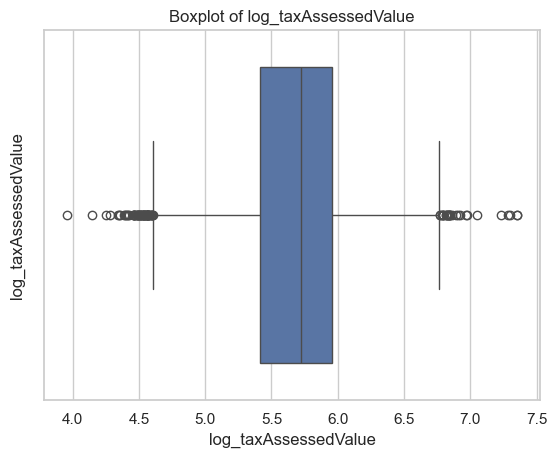

In [158]:
show_boxplot(df, 'log_taxAssessedValue')

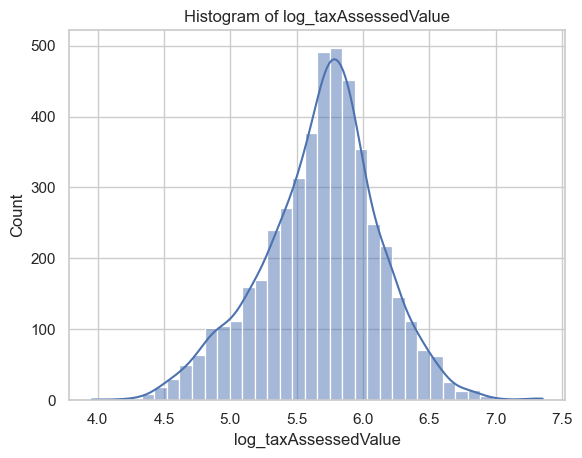

In [159]:
show_hist(df, 'log_taxAssessedValue', bins_alg=calc_num_of_bins_scott_rule)

Finally we save the data after removing the outliers and we are ready for the next steps.

In [160]:
df.drop(columns=["zestimate/price"], inplace=True)
df.to_csv('data_without_price_outliers.csv', index=False)

In [152]:
import pandas as pd 
df = pd.read_csv("data_without_price_outliers.csv")
df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
0,90210,10100 Angelo Cir,SINGLE_FAMILY,2009,1041.815612,596.901775,5,7.0,1.0,['Tile'],...,1,1,1,0,0,1,3.017791,2.775903,4.556303,6.839742
1,90044,948 W 61st St,MULTI_FAMILY,2008,483.281406,78.410132,2,1.0,1.0,[],...,0,0,0,0,0,0,2.684200,1.894372,4.648360,5.958711
2,91352,10159 Colwell Dr,SINGLE_FAMILY,1943,535.957407,107.210062,3,1.0,1.0,"['Carpet', 'Vinyl', 'Wood']",...,0,1,0,0,0,1,2.729130,2.030236,5.093422,5.856789
3,91605,8250 Lankershim Blvd,MANUFACTURED,1990,111.483600,69.677250,2,2.0,1.0,['Laminate'],...,1,1,0,0,1,1,2.047211,1.843091,5.130334,4.251881
4,91304,8811 Canoga Ave SPACE 535,MANUFACTURED,1971,82058.180220,124.861632,2,2.0,1.0,[],...,1,1,0,0,0,1,4.914122,2.096429,4.929419,5.641439


First we try to find expensive houses in each home type. we exclude Lot and Manufactured becuase there are not enough data for them. 

In [153]:
import pandas as pd

grouped = df.groupby('homeType')
exclude_home_types = ['LOT', 'MANUFACTURED']
for home_type, group in grouped:
    if home_type in exclude_home_types:
        continue
    sorted_group = group.sort_values(by='price', ascending=False)
    top_10_expensive = sorted_group.head(10)
    print(f"\nTop 10 expensive houses for Home Type: {home_type}")
    display(top_10_expensive[['sold-history','zipcode','streetAddress', 'yearBuilt', 'lotAreaValue', 'livingAreaValue', 
                              'bedrooms', 'bathrooms', 'stories', 'flooring', 'zestimate', 
                              'price', 'parkingCapacity']])



Top 10 expensive houses for Home Type: APARTMENT


,sold-history,zipcode,streetAddress,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,zestimate,price,parkingCapacity
4607,"[('2014-07-16', 2000000)]",90291,337 6th Ave,1953,595.136618,41.806350,1,1.0,1.0,['Laminate'],3709700.0,4000000,4
3194,"[('2021-08-01', 4950), ('2014-04-03', 3800), (...",90049,750 S Bundy Dr APT 302,1983,2217.597525,165.831855,2,3.0,1.0,['Carpet'],1389800.0,1350000,2
2510,"[('2014-07-03', 1900019), ('2004-02-13', 895000)]",90291,1011 5th Ave,1953,483.188503,56.485024,2,1.0,1.0,[],1351300.0,1055115,0
2478,"[('2017-06-16', 700000), ('2007-07-17', 655000...",90047,1717 W 62nd St,1950,635.270714,298.497339,2,1.0,1.0,"['Wood', 'Laminate']",957800.0,1050000,4
2014,"[('2011-08-03', 640000), ('2001-09-11', 455000)]",90067,2102 Century Park Ln APT 201,1985,54746.787937,123.560990,2,2.0,1.0,[],1125400.0,912360,0
1026,"[('2021-11-20', 2600), ('2008-10-01', 460000)]",91411,15206 Burbank Blvd APT 213,2006,3506.535442,121.702930,2,2.5,1.0,['Wood'],704000.0,699000,0
957,"[('2014-04-21', 436000), ('2006-01-24', 324000)]",90094,6400 Crescent Park E APT 105,2005,2640.120925,69.677250,1,1.0,1.0,['Wood'],690200.0,685000,0
851,"[('1999-10-01', 245000)]",90024,10590 Wilshire Blvd APT 504,1976,1946.041699,121.888736,2,2.0,1.0,['Wood'],914300.0,659207,0
829,"[('2013-12-06', 349000), ('2013-08-29', 257732...",90047,1707 W 70th St,1925,489.598810,77.759811,2,1.0,1.0,['Tile'],651800.0,650000,2
765,"[('2007-01-19', 535000), ('2006-07-20', 535000...",90067,2160 Century Park E APT 2101N,1966,20720.647844,77.295296,1,1.0,1.0,['Wood'],646900.0,635000,0



Top 10 expensive houses for Home Type: CONDO


,sold-history,zipcode,streetAddress,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,zestimate,price,parkingCapacity
4688,"[('1996-10-09', 2750000)]",90024,10601 Wilshire Blvd #20C,1982,3667.264532,503.905872,3,5.0,1.0,"['Marble', 'Wood']",7955500.0,7751535,5
4638,"[('2013-11-22', 3850038)]",90024,10490 Wilshire Blvd APT 2104,1989,7873.975502,439.709899,3,4.0,1.0,"['Wood', 'Marble', 'Tile']",4932900.0,4910000,2
4623,"[('2023-11-22', 4320000), ('2021-08-31', 24750...",90067,10108 Empyrean Way APT 302,1979,43160.571272,243.034248,2,3.0,1.0,"['Wood', 'Carpet', 'Tile']",4549400.0,4495000,2
4600,"[('2001-06-15', 2725000), ('1998-08-17', 22000...",90067,10248 Century Woods Dr,1990,28834.686872,576.834727,5,5.0,1.0,"['Carpet', 'Wood', 'Tile']",4328200.0,4326000,6
4606,"[('2022-03-15', 3300000), ('2019-07-01', 19000...",90067,1 W Century Dr UNIT 4D,2010,14997.258474,227.612350,2,3.0,1.0,['Wood'],4262400.0,4200000,2
4575,"[('2019-10-23', 4250000), ('2015-04-10', 33000...",90024,10660 Wilshire Blvd APT 1801,1980,3428.499792,515.890359,4,5.0,1.0,"['Wood', 'Mixed']",4005600.0,4000000,2
4515,"[('2021-08-17', 16000), ('2011-04-29', 2800028)]",90067,1 W Century Dr UNIT 7C,2010,14992.806928,258.270340,2,3.0,1.0,"['Wood', 'Marble']",3766800.0,3700000,2
4529,[],90024,10375 Wilshire Blvd UNIT 8GH,1958,8665.541318,424.845419,3,5.0,1.0,['Carpet'],3744800.0,3690000,4
4527,"[('2019-06-07', 2795000), ('1999-03-04', 13300...",90024,10380 Wilshire Blvd APT 804,1990,3069.138624,296.360570,3,4.0,1.0,"['Carpet', 'Tile']",3586400.0,3599000,2
4386,"[('2012-04-27', 1395000)]",90024,10350 Wilshire Blvd PENTHOUSE 3,1982,2010.075362,222.223976,3,3.0,1.0,"['Wood', 'Carpet', 'Mixed', 'Tile']",3168800.0,3100000,2



Top 10 expensive houses for Home Type: MULTI_FAMILY


,sold-history,zipcode,streetAddress,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,zestimate,price,parkingCapacity
4660,[],90033,571 Fairview Ave,1964,1568.111798,1115.393418,1,38.0,3.0,[],5088500.0,4995000,16
4646,[],90025,1218 McClellan Dr,1972,1092.353474,1092.353474,16,16.0,2.0,[],5026800.0,4965000,16
4644,"[('2004-04-16', 1860000)]",90025,1814 Fox Hills Dr,1949,787.074216,541.810296,8,4.0,1.0,[],4337500.0,4870500,0
4621,[],90049,11675 Darlington Ave,1986,826.929603,826.929603,17,17.0,3.0,[],4902200.0,4825000,0
4625,"[('2014-08-01', 2240000), ('2005-09-01', 22400...",90293,6955 Trolleyway,1957,350.058504,350.058504,8,7.0,3.0,[],4798500.0,4700000,6
4574,[],90027,1554-1556 N Alexandria Ave,1955,1275.570272,980.869874,18,12.0,2.0,[],4485400.0,4400000,12
4594,[],91601,10916 Peach Grove St,1986,926.242910,926.242910,20,20.0,3.0,[],4091300.0,4057725,19
4547,"[('2015-04-28', 3275000), ('2009-12-22', 14500...",90291,341 5th Ave,1921,489.669416,371.612000,4,3.0,1.0,"['Wood', 'Other']",3897900.0,3850000,3
4546,[],90016,5110 W Washington Blvd,1946,2207.157444,1011.249155,34,34.0,1.0,[],3835700.0,3750000,14
4549,"[('2019-10-18', 637000)]",90037,1260 Leighton Ave,2023,730.589192,730.589192,16,21.0,3.0,[],3831700.0,3750000,0



Top 10 expensive houses for Home Type: SINGLE_FAMILY


,sold-history,zipcode,streetAddress,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,zestimate,price,parkingCapacity
4729,"[('2020-08-18', 5700000), ('2015-12-29', 89000...",90069,1432 Tanager Way,2023,1063.514808,975.481500,4,6.0,2.0,"['Tile', 'Wood', 'Stone', 'Stone']",22824000.0,23700000,4
4721,[],90210,11 Beverly Ridge Ter,2006,12688.524844,1209.039642,6,10.0,2.0,"['Wood', 'Stone', 'Wood']",23511800.0,23500000,7
4718,[],90069,1475 N Doheny Dr,1927,7619.832694,532.705802,6,8.0,1.0,"['Wood', 'Tile', 'Other', 'Stone']",20810500.0,20800000,15
4730,"[('2022-02-03', 4100000), ('1994-03-24', 64500...",91436,4550 Libbit Ave,1951,3829.559597,415.740925,5,5.0,1.0,[],19157400.0,19000000,1
4714,"[('1996-05-29', 1375000)]",90272,563 Spoleto Dr,2004,1951.395892,716.560839,5,7.0,2.0,['Mixed'],18366000.0,18300000,3
4725,"[('2020-11-06', 18500000), ('1995-04-20', 4675...",90077,801 Tarcuto Way,1953,10091.250096,694.264119,7,7.0,2.0,"['Wood', 'Tile', 'Carpet']",18326300.0,18000000,10
4719,"[('2023-11-15', 15900000), ('2012-12-18', 2000...",90046,1871 N Stanley Ave,2021,2797.189632,937.112561,6,9.0,3.0,"['Wood', 'Stone']",17440600.0,17250000,20
4713,"[('2019-11-15', 18000000), ('2016-04-11', 6300...",90210,1357 Laurel Way,2020,2044.068986,1042.836175,5,9.0,3.0,['Mixed'],17328800.0,17000000,6
4732,"[('2021-12-29', 16750000), ('2017-03-03', 5450...",90024,467 Comstock Ave,2021,2044.473672,882.578500,6,7.0,2.0,['Mixed'],17094300.0,16750000,5
4716,"[('2020-12-23', 6750000), ('1999-12-16', 25500...",90272,14928 La Cumbre Dr,2024,1384.835492,856.751466,6,8.0,3.0,['Wood'],16554100.0,16550000,6



Top 10 expensive houses for Home Type: TOWNHOUSE


,sold-history,zipcode,streetAddress,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,zestimate,price,parkingCapacity
4681,"[('2012-05-24', 240000)]",91311,10521 Larwin Ave UNIT 6,1972,5519.917040,96.804926,2,2.0,1.0,[],5540100.0,5537000,2
4201,[],90049,12540 W The Vis,1982,18983.820260,255.204541,3,3.0,2.0,"['Wood', 'Parquet', 'Carpet', 'Tile']",2537800.0,2499000,4
3903,[],90291,715 Venice Blvd,2017,757.166511,262.915490,3,3.0,2.0,['Wood'],1965700.0,1925000,2
3806,[],90069,728 N Sweetzer Ave APT 103,2021,219.158177,219.158177,2,3.0,4.0,['Wood'],1841700.0,1800000,3
3747,"[('1997-11-26', 469000)]",90293,132 Convoy St,1981,2044.473672,222.967200,2,3.0,3.0,"['Wood', 'Tile', 'Carpet']",1758200.0,1739000,2
3623,"[('2017-11-02', 1505000), ('2007-12-28', 89500...",90291,550 Vernon Ave #D,2005,474.696054,183.018910,4,3.0,3.0,"['Wood', 'Carpet', 'Tile', 'Mixed']",1630600.0,1610000,2
3551,"[('2013-05-24', 985000), ('2003-08-15', 689000)]",90025,1732 Stoner Ave APT 101,2002,616.875920,206.244660,3,3.0,3.0,['Wood'],1561500.0,1550000,3
3508,[],90025,1714 Stoner Ave APT 9,1980,1371.076168,202.900152,3,3.0,3.0,"['Stone', 'Carpet']",1569800.0,1550000,2
3340,"[('2008-12-12', 812500), ('2005-08-05', 875000...",90025,1740 S Westgate Ave UNIT C,2002,1116.231012,206.802078,3,3.0,3.0,"['Laminate', 'Tile', 'Wood']",1467800.0,1435000,2
3351,[],90067,2393 Century Hl,1980,73170.061602,211.261422,2,3.0,3.0,"['Carpet', 'Vinyl', 'Marble', 'Tile', 'Other']",1453400.0,1427000,3


Then we try to find the cheapest and the most expensive areas for each home type using zipcode.

In [154]:
import pandas as pd
from tabulate import tabulate

average_prices_by_zipcode_home_type = df.groupby(['zipcode', 'homeType'])['price'].mean().reset_index()
most_expensive_areas_by_home_type = average_prices_by_zipcode_home_type.sort_values(by=['homeType', 'price'], ascending=[True, False])
home_types = most_expensive_areas_by_home_type['homeType'].unique()
for home_type in home_types:
    if home_type in exclude_home_types:
        continue
    print(f"\nTop 10 most expensive areas for {home_type} based on average house prices:")
    print(tabulate(most_expensive_areas_by_home_type[most_expensive_areas_by_home_type['homeType'] == home_type].head(10).drop(columns=['homeType']), headers='keys', tablefmt='pretty'))



Top 10 most expensive areas for APARTMENT based on average house prices:
+-----+---------+-----------+
|     | zipcode |   price   |
+-----+---------+-----------+
| 186 | 90291.0 | 2527557.5 |
| 127 | 90049.0 | 1350000.0 |
| 121 | 90047.0 | 850000.0  |
| 156 | 90067.0 | 773680.0  |
| 307 | 91411.0 | 699000.0  |
| 170 | 90094.0 | 685000.0  |
| 49  | 90024.0 | 659207.0  |
| 34  | 90017.0 | 208000.0  |
+-----+---------+-----------+

Top 10 most expensive areas for CONDO based on average house prices:
+-----+---------+--------------------+
|     | zipcode |       price        |
+-----+---------+--------------------+
| 157 | 90067.0 |     1807400.0      |
| 168 | 90077.0 |     1527000.0      |
| 50  | 90024.0 | 1503846.2063492064 |
| 191 | 90292.0 |     1300625.0      |
| 101 | 90041.0 |     1300000.0      |
| 128 | 90049.0 | 1255558.0232558139 |
| 124 | 90048.0 | 1239989.3043478262 |
| 249 | 91326.0 |     1212500.0      |
| 22  | 90010.0 |     1190150.0      |
| 171 | 90094.0 |     119000

In [155]:
average_prices_by_zipcode_home_type = df.groupby(['zipcode', 'homeType'])['price'].mean().reset_index()
cheapest_areas_by_home_type = average_prices_by_zipcode_home_type.sort_values(by=['homeType', 'price'], ascending=[True, True])
home_types = cheapest_areas_by_home_type['homeType'].unique()
for home_type in home_types:
    if home_type in exclude_home_types:
        continue
    print(f"\nTop 10 cheapest areas for {home_type} based on average house prices:")
    print(tabulate(cheapest_areas_by_home_type[cheapest_areas_by_home_type['homeType'] == home_type].head(10).drop(columns=['homeType']), headers='keys', tablefmt='pretty'))


Top 10 cheapest areas for APARTMENT based on average house prices:
+-----+---------+-----------+
|     | zipcode |   price   |
+-----+---------+-----------+
| 34  | 90017.0 | 208000.0  |
| 49  | 90024.0 | 659207.0  |
| 170 | 90094.0 | 685000.0  |
| 307 | 91411.0 | 699000.0  |
| 156 | 90067.0 | 773680.0  |
| 121 | 90047.0 | 850000.0  |
| 127 | 90049.0 | 1350000.0 |
| 186 | 90291.0 | 2527557.5 |
+-----+---------+-----------+

Top 10 cheapest areas for CONDO based on average house prices:
+-----+---------+--------------------+
|     | zipcode |       price        |
+-----+---------+--------------------+
| 274 | 91352.0 |      357500.0      |
| 228 | 91304.0 | 408409.0909090909  |
| 133 | 90057.0 |      421125.0      |
| 259 | 91340.0 |      426000.0      |
| 252 | 91331.0 | 430564.28571428574 |
| 290 | 91402.0 |      435000.0      |
| 240 | 91316.0 |      436800.0      |
| 215 | 90744.0 |      449000.0      |
| 276 | 91356.0 | 451023.8095238095  |
| 256 | 91335.0 |      455000.0      |
+

`show_avg_during_yearBuilt:` This function visualizes the average values of a specified column (`col`) over the years in which buildings were constructed (`yearBuilt`). The data is grouped by the `yearBuilt` column, and the mean of the specified column is calculated for each year.

`show_count_during_yearBuilt:` This function visualizes the count of entries where the specified column (`col`) equals `1` over the years in which buildings were constructed (`yearBuilt`). The data is filtered to include only rows where the specified column equals `1`. The count of such rows is then calculated for each year in the `yearBuilt` column.

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def show_avg_during_yearBuilt(df, col):
    avg_values_by_yearBuilt = df.groupby("yearBuilt")[col].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=avg_values_by_yearBuilt, x='yearBuilt', y=col, marker="o")
    plt.xlabel("yearBuilt")
    plt.ylabel(f"Average {col}")
    plt.xticks(range(1885, 2024, 10))    
    plt.title(f"Average {col} Over the yearBuilt")
    plt.grid()
    plt.show()

def show_count_during_yearBuilt(df, col):
    filtered_df = df[df[col] == 1]
    count_values_by_yearBuilt = filtered_df.groupby("yearBuilt").size().reset_index(name='count')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=count_values_by_yearBuilt, x='yearBuilt', y='count', marker="o")
    plt.xlabel("yearBuilt")
    plt.ylabel(f"Count of '1' in {col}")
    plt.xticks(range(1885, 2024, 10))    
    plt.title(f"Count of '1' in {col} Over the yearBuilt")
    plt.grid()
    plt.show()


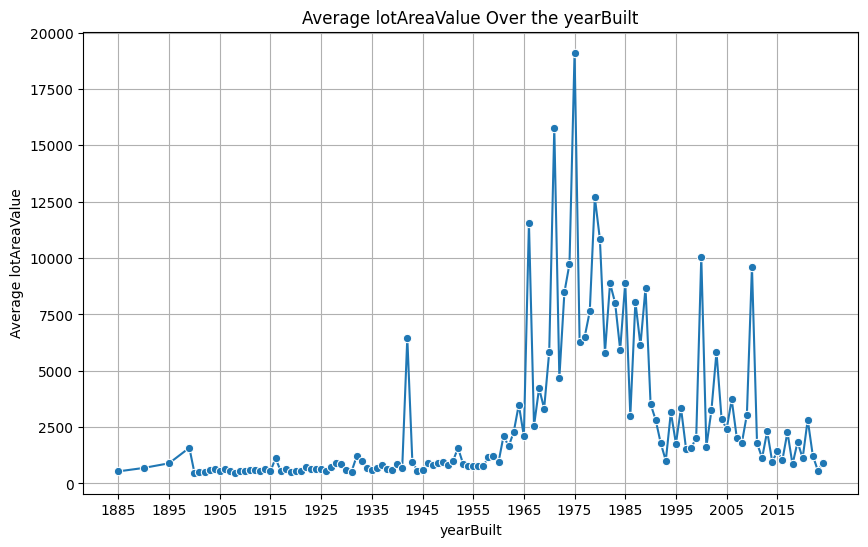

In [157]:
show_avg_during_yearBuilt(df, "lotAreaValue")

- From 1885 to around 1930, the average lot area value remains relatively low and stable with minor fluctuations. 
- There are small spikes, but overall, the values do not show significant changes during this period.
- Around 1935 and 1940, there are noticeable spikes in the average lot area value, reaching values significantly higher than the preceding years. This could indicate specific events or changes in urban development policies that affected lot values during these years. also lack of data in this span may be the reason.
- From the mid-1940s, there's a marked increase in the average lot area value, peaking around 1970. The rapid increase post-1945 may be attributed to post-World War II economic growth, suburban expansion, and increased housing development.
After peaking around 1970, the average lot area value begins to decline, showing a downward trend until about 1990. The decline could be due to economic recessions, changes in housing demand, or shifts in urban planning policies.
- From 1990 onwards, the plot shows more fluctuations with several peaks and troughs. Despite these fluctuations, the overall trend seems to stabilize around a lower average value compared to the earlier peak years.

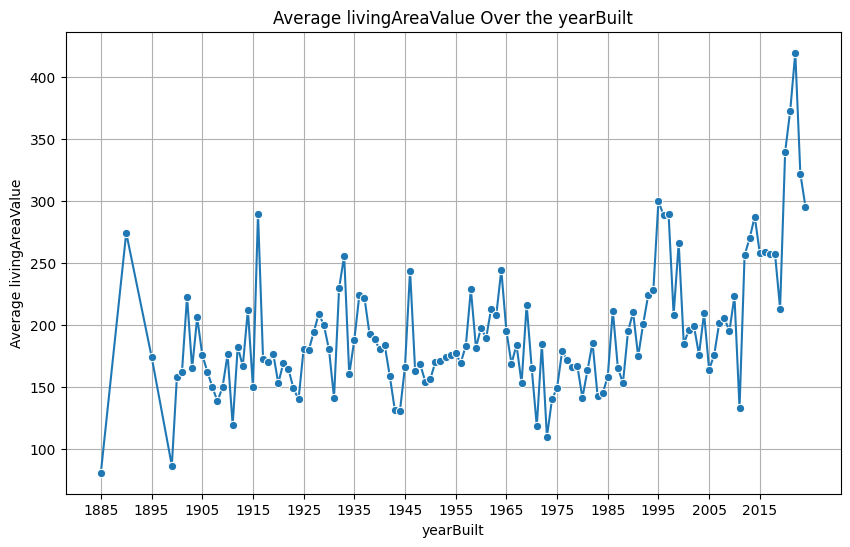

In [158]:
show_avg_during_yearBuilt(df, "livingAreaValue")

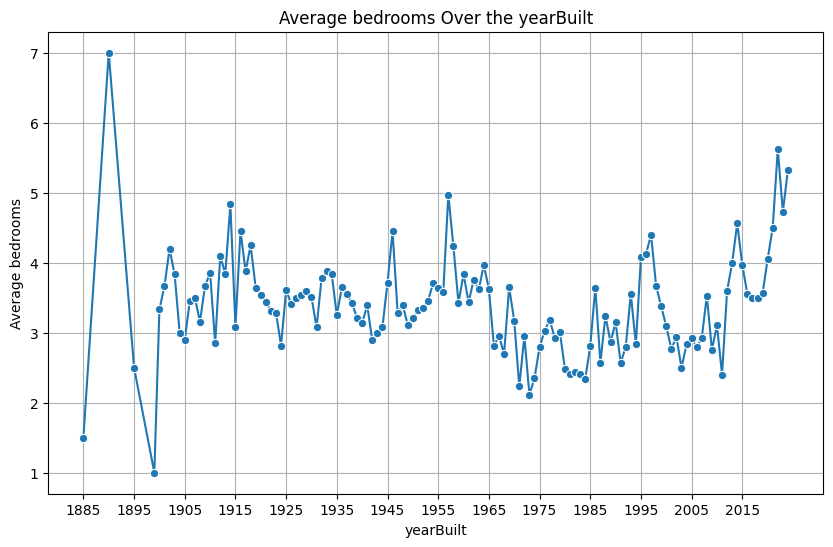

In [159]:
show_avg_during_yearBuilt(df, "bedrooms")


- From 1900 to around 1940, the average number of bedrooms stabilizes somewhat, fluctuating between 3 and 5 bedrooms. There are minor peaks and troughs, but the overall trend remains relatively stable within this range.
- The period from 1940 to 1980 shows increased fluctuations with average bedrooms varying between 3 and 5. This period includes some notable peaks around 1955 and 1975 where the average bedrooms rise closer to 5.
- From 1980 to around 2000, the average number of bedrooms shows a slight downward trend with more frequent dips below 4. The lowest average in this period appears to be around 1995, where the number dips close to 3 bedrooms.
- From 2000 onwards, there is a noticeable upward trend in the average number of bedrooms. The number rises steadily, reaching close to 6 by 2020, indicating a recent trend towards larger homes with more bedrooms.

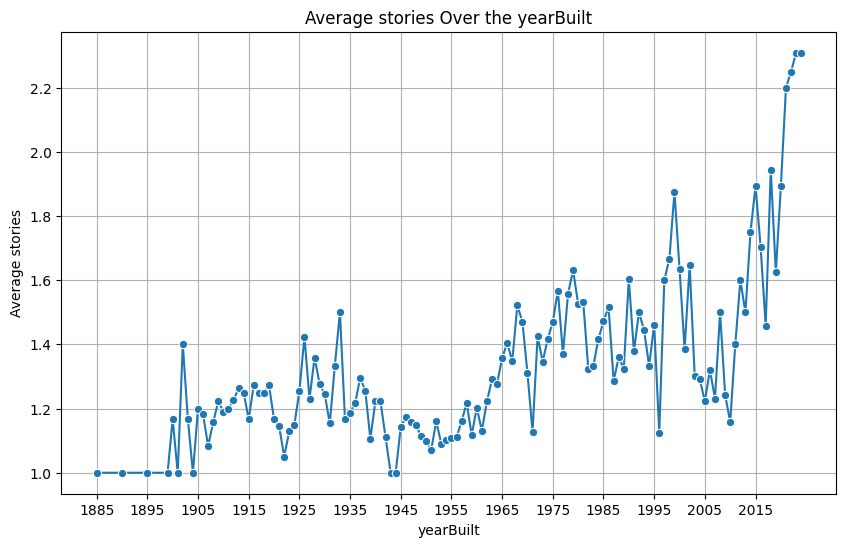

In [160]:
show_avg_during_yearBuilt(df, "stories")


The plot illustrates how the average number of stories in buildings has evolved over time. Initially, there was low variability and stability, followed by a gradual increase in the mid-20th century, and a significant upward trend from 1980 onwards. This trend towards taller buildings in recent years could be due to changes in urban development, zoning laws, and a demand for higher density living spaces.

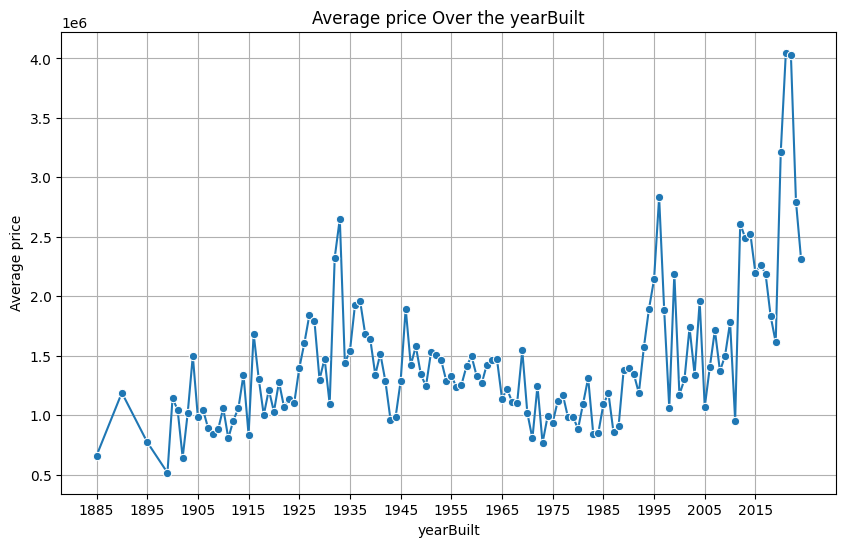

In [161]:
show_avg_during_yearBuilt(df, "price")

### Reasonable Explanation for the Observed Trends in Average Prices Over YearBuilt

The trends observed in the average prices over the years can be attributed to a combination of historical, economic, and societal factors. Here are some reasonable explanations for each period highlighted in the analysis:

- `1885-1930:`
   - **Economic Cycles**: The late 19th and early 20th centuries experienced several economic cycles, including periods of rapid growth and recession. For instance, the post-World War I economic boom likely contributed to higher average prices around 1920.
   - **Urbanization**: This period saw significant urbanization and industrialization, particularly in the United States and Europe. The rapid expansion of cities and demand for housing could have caused price fluctuations.
   - **Construction Techniques**: Advances in construction technology and materials might have impacted building costs, reflecting in price variability.

- `1930-1980:`
   - **Great Depression**: The economic impact of the Great Depression in the 1930s likely caused a temporary peak followed by stabilization as economies recovered.
   - **Post-War Economic Stability**: After World War II, many countries experienced economic stability and growth. The establishment of suburban areas and government policies promoting homeownership (e.g., GI Bill in the US) could have contributed to steady prices.
   - **Inflation Control**: Efforts to control inflation and stable economic policies in many developed countries during the mid-20th century likely led to a more stable real estate market.

- `1980-2000:`
   - **Economic Recessions**: This period includes significant economic recessions, such as the early 1980s recession and the early 1990s recession, which likely led to decreased demand for housing and lower average prices.
   - **Market Corrections**: After periods of rapid price increases, real estate markets often undergo corrections. This could explain the fluctuations and general decline during this period.
   - **Changing Housing Preferences**: Societal shifts, including changing family structures and preferences for different types of housing, might have influenced market dynamics.

- `2000-2020:`
   - **Housing Boom**: The early 2000s saw a significant housing boom, fueled by low interest rates, relaxed lending standards, and speculative investment. This led to a sharp increase in prices.
   - **Global Financial Crisis**: The 2008 financial crisis caused a temporary dip in prices, but recovery efforts and economic stimuli led to a rebound and further price increases in the following decade.
   - **Urbanization and Demand**: Continued urbanization and increasing demand for housing in major cities drove up prices. Additionally, limited supply in desirable areas contributed to the upward trend.
   - **Inflation and Investment**: Rising inflation and increased investment in real estate as a hedge against inflation also contributed to higher average prices.  

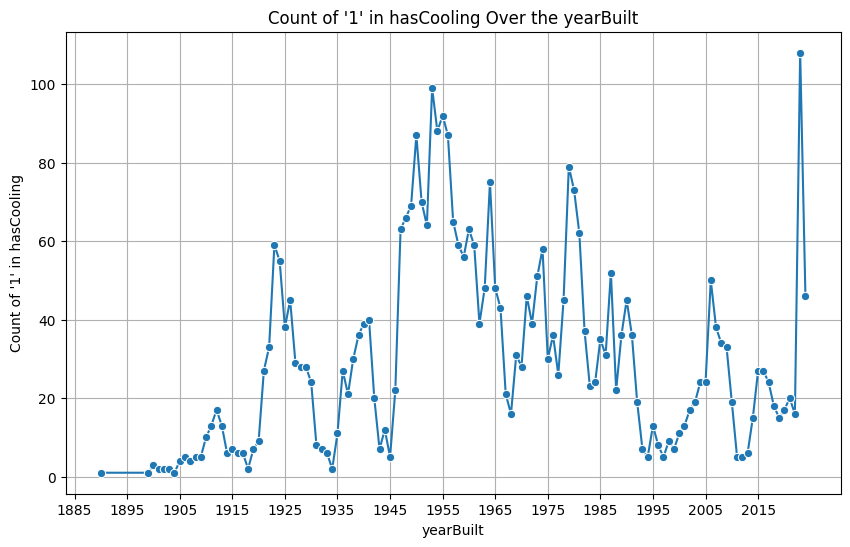

In [162]:
show_count_during_yearBuilt(df, "hasCooling")

- The initial period shows almost no adoption of cooling systems, reflecting the historical fact that cooling technologies were either non-existent or not commonly used in residential buildings.

- Between 1925 and 1965, there is a significant increase in the count of buildings with cooling systems. Notable peaks are observed around 1940 and 1955, where the count of buildings with cooling systems rises sharply. This period corresponds with the widespread adoption of air conditioning technologies in residential buildings, particularly in the United States. The increase could also be attributed to post-war construction booms and rising living standards.

- From 1965 to around 2000, the count of buildings with cooling systems shows considerable fluctuations. Despite these fluctuations, there is a general trend of cooling system installations, reflecting the ongoing demand for and availability of cooling technologies. Economic cycles, changes in building codes, and regional climate variations might have influenced these fluctuations.

- From 2000 onwards, the plot shows a period of lower counts until a sharp increase around 2020. The overall lower counts in the early 21st century could be due to improved energy efficiency standards, alternative cooling solutions, or variations in the dataset. The sharp increase around 2020 suggests a recent surge in the adoption of cooling systems, potentially driven by increasing temperatures, improved affordability, and technological advancements in HVAC systems.

Key factors influencing these trends include the introduction and widespread availability of air conditioning technologies, economic conditions, building booms, regional climate needs, and advancements in energy efficiency standards. The sharp increase in recent years may reflect a growing response to climate change and the increasing need for residential cooling solutions.

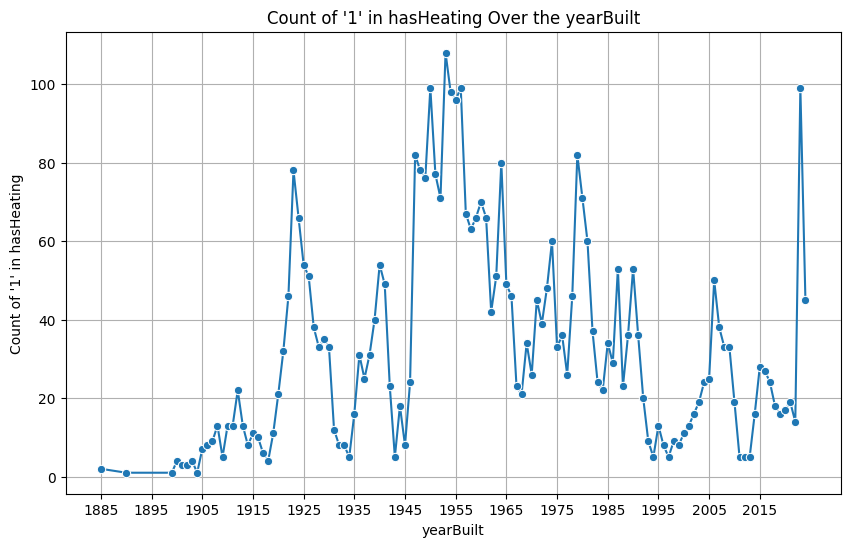

In [163]:
show_count_during_yearBuilt(df, "hasHeating")

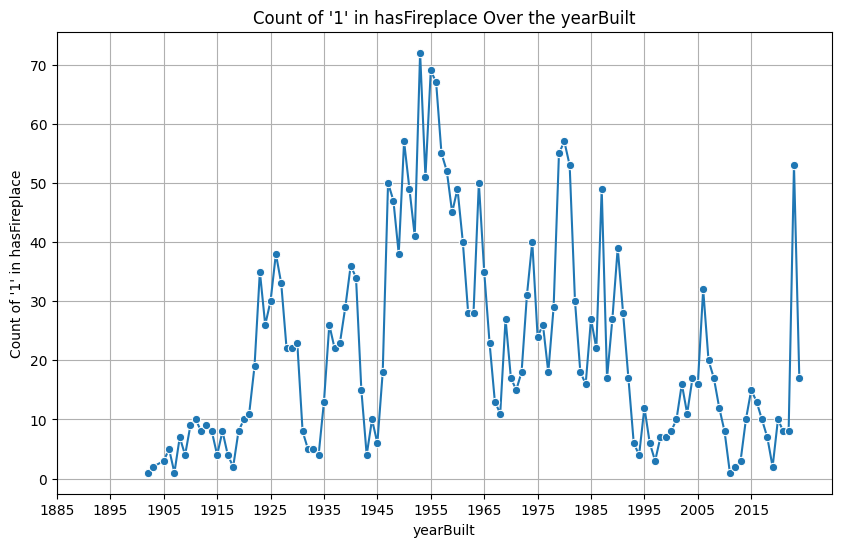

In [164]:
show_count_during_yearBuilt(df, "hasFireplace")

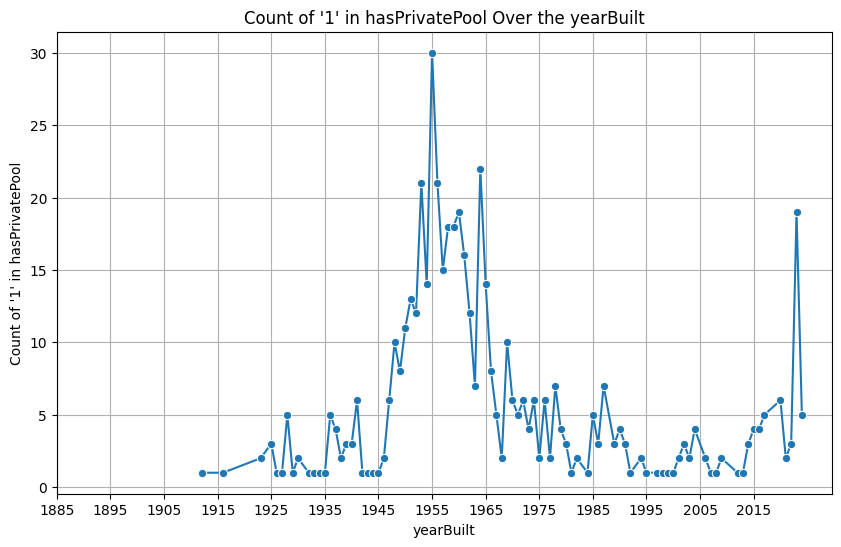

In [165]:
show_count_during_yearBuilt(df, "hasPrivatePool")


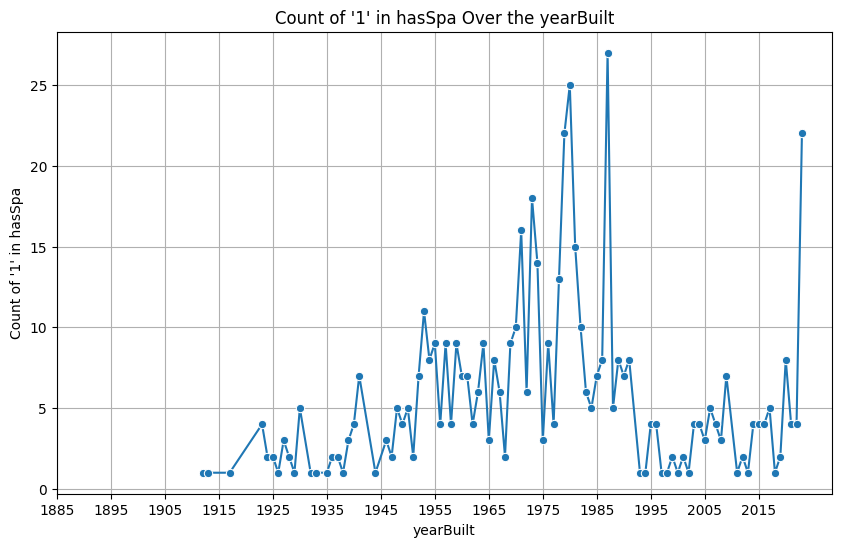

In [166]:
show_count_during_yearBuilt(df, "hasSpa")


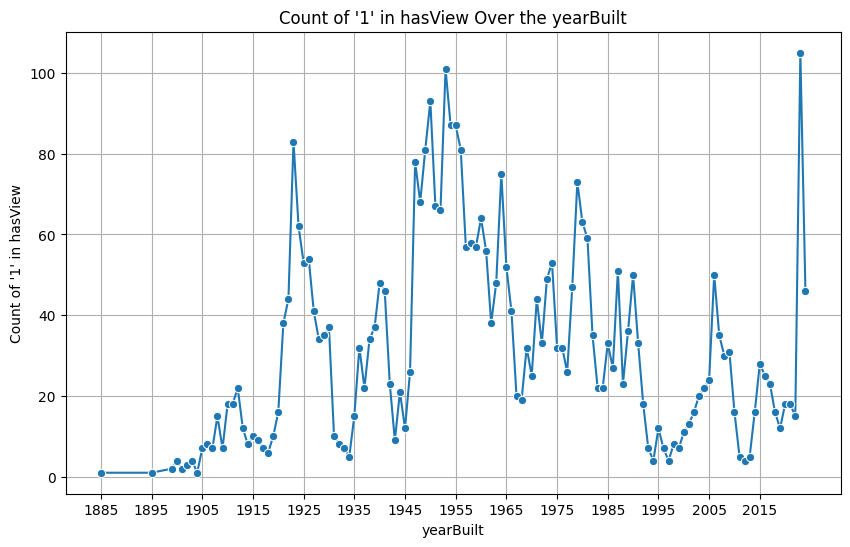

In [167]:
show_count_during_yearBuilt(df, "hasView")

Now we Assess the accuracy of Zestimate (predicted prices) compared to actual house prices.
- **Metrics**:
   - **Mean Absolute Error (MAE)**: Average magnitude of prediction errors.
   - **Mean Squared Error (MSE)**: Average squared prediction errors, emphasizing larger errors.
   - **R-squared (R²) Score**: Proportion of variance in actual prices explained by Zestimate.
- **Visualization**: Scatter plot comparing actual prices to Zestimate, with a red dashed line indicating perfect prediction alignment.

Mean Absolute Error: 36833.46863780359
R-squared Score: 0.9967118856996015


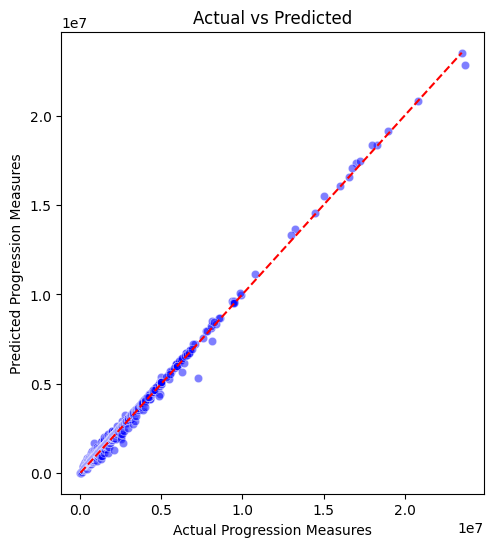

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(df['price'], df['zestimate'])
r2 = r2_score(df['price'], df['zestimate'])

print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["price"].values.reshape(-1), y=df["zestimate"].values.reshape(-1), color='blue', alpha=0.5)
plt.plot([min(df["zestimate"]), max(df["zestimate"])], [min(df["zestimate"]), max(df["zestimate"])], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')

plt.show()

1. **Mean Absolute Error (MAE)**: On average, the Zestimate is off by about $36,833 from the actual house prices. This value represents the average absolute difference between the predicted and actual prices. In the context of real estate prices, this is a relatively small error, indicating that the predictions are fairly accurate.

2. **R-squared (R²) Score**: The R² score is 0.9967, which means that 99.67% of the variance in the actual house prices can be explained by the Zestimate. This is an exceptionally high value, indicating that the model's predictions are very closely aligned with the actual prices and that the model explains nearly all the variability in the data.

The low MAE and high R² score indicate that the Zestimate is highly accurate in predicting house prices. The predictions are very close to the actual prices, and the model explains almost all of the variance in the data. The combination of low MAE and very high R² score collectively demonstrate that the Zestimate model performs exceptionally well in predicting house prices in this dataset.

## Statistical Tests

In this part, We will use some statistical tests to gain more information about the features and the relationships between them. We will use the following methods:

* Paired T-Test
* Independent T-Test
* Confidence Interval
* Chi-Square Test
* Cranmer's V and Phi Coefficient

First we load the data from the previous parts and take a look at its general information.

In [47]:
import pandas as pd  

df = pd.read_csv("data_without_price_outliers.csv")

In [48]:
df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
0,90210,10100 Angelo Cir,SINGLE_FAMILY,2009,1041.815612,596.901775,5,7.0,1.0,['Tile'],...,1,1,1,0,0,1,3.017791,2.775903,4.556303,6.839742
1,90044,948 W 61st St,MULTI_FAMILY,2008,483.281406,78.410132,2,1.0,1.0,[],...,0,0,0,0,0,0,2.684200,1.894372,4.648360,5.958711
2,91352,10159 Colwell Dr,SINGLE_FAMILY,1943,535.957407,107.210062,3,1.0,1.0,"['Carpet', 'Vinyl', 'Wood']",...,0,1,0,0,0,1,2.729130,2.030236,5.093422,5.856789
3,91605,8250 Lankershim Blvd,MANUFACTURED,1990,111.483600,69.677250,2,2.0,1.0,['Laminate'],...,1,1,0,0,1,1,2.047211,1.843091,5.130334,4.251881
4,91304,8811 Canoga Ave SPACE 535,MANUFACTURED,1971,82058.180220,124.861632,2,2.0,1.0,[],...,1,1,0,0,0,1,4.914122,2.096429,4.929419,5.641439


In [49]:
df.describe()

,zipcode,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,fireplaceFeatures,taxAssessedValue,zestimate,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
count,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4.735000e+03,4.735000e+03,...,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000
mean,90668.165998,1961.499894,2871.939986,186.919456,3.378458,2.809345,1.317423,0.544456,7.851525e+05,1.434810e+06,...,0.805913,0.885533,0.561985,0.109820,0.115100,0.844562,3.032504,2.206296,6.046425,5.681535
std,648.482534,29.535432,6969.945597,125.664397,2.147488,1.985461,0.584245,0.498072,1.080504e+06,1.427162e+06,...,0.395538,0.318411,0.496195,0.312699,0.319177,0.362360,0.490648,0.225559,0.273690,0.442529
min,90001.000000,1885.000000,72.371437,16.722540,0.000000,0.000000,0.000000,0.000000,9.010000e+03,3.700000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.859567,1.223302,4.556303,3.954725
25%,90041.500000,1941.000000,555.430805,114.828108,2.000000,2.000000,1.000000,0.000000,2.612390e+05,7.557000e+05,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.744630,2.060048,5.866287,5.417038
50%,90291.000000,1957.000000,701.046038,152.546726,3.000000,2.000000,1.000000,1.000000,5.307740e+05,1.030800e+06,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.845747,2.183403,6.000000,5.724910
75%,91342.000000,1980.000000,1557.892455,213.444642,4.000000,3.000000,2.000000,1.000000,9.066600e+05,1.603150e+06,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.192537,2.329285,6.197281,5.957444
max,91607.000000,2024.000000,82058.180220,1246.944066,72.000000,38.000000,6.000000,1.000000,2.264544e+07,2.351180e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.914122,3.095847,7.374748,7.354981


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zipcode               4735 non-null   int64  
 1   streetAddress         4735 non-null   object 
 2   homeType              4735 non-null   object 
 3   yearBuilt             4735 non-null   int64  
 4   lotAreaValue          4735 non-null   float64
 5   livingAreaValue       4735 non-null   float64
 6   bedrooms              4735 non-null   int64  
 7   bathrooms             4735 non-null   float64
 8   stories               4735 non-null   float64
 9   flooring              4735 non-null   object 
 10  heating               4735 non-null   object 
 11  cooling               4735 non-null   object 
 12  fireplaceFeatures     4735 non-null   int64  
 13  taxAssessedValue      4735 non-null   float64
 14  zestimate             4735 non-null   float64
 15  rentZestimate        

In [51]:
df.columns

Index(['zipcode', 'streetAddress', 'homeType', 'yearBuilt', 'lotAreaValue',
       'livingAreaValue', 'bedrooms', 'bathrooms', 'stories', 'flooring',
       'heating', 'cooling', 'fireplaceFeatures', 'taxAssessedValue',
       'zestimate', 'rentZestimate', 'sold-history', 'price',
       'parkingCapacity', 'hasCooling', 'hasHeating', 'hasFireplace',
       'hasPrivatePool', 'hasSpa', 'hasView', 'log_lotAreaValue',
       'log_livingAreaValue', 'log_price', 'log_taxAssessedValue'],
      dtype='object')

### Paired T-Test

The paired T-Test is used to determine whether the mean of the differences between two paired samples is significantly different from zero. We can use this test to determine if zestimate and price are significantly different from each other.

We will use the log of the price and zestimate as they are not normally distributed.

Before we start, we remove the rows that have null zestimates.

In [52]:
from scipy.stats import ttest_rel
import numpy as np

res = ttest_rel(df['log_price'], np.log10(df['zestimate']))
res

TtestResult(statistic=-24.582388017565115, pvalue=1.0972092534234243e-125, df=4734)

As you can see the p-value is almost zero so according it we can reject the null hypothesis and say that the difference between zestimate and price is significant, but if we plot the distributions of zestimate and price we can see that the difference is not that significant. We also plot the distribution of (zestimate - price) and again we can see that the difference is not that significant.

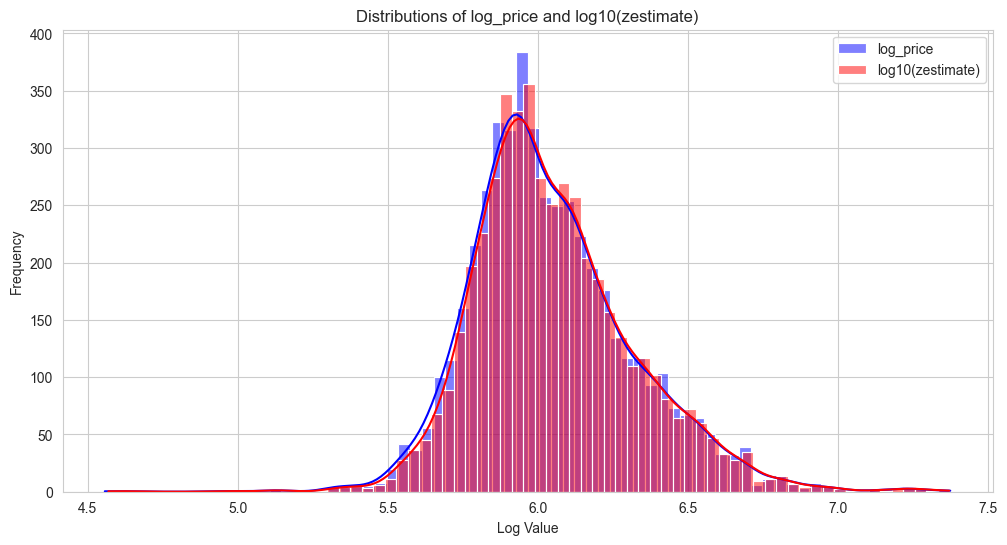

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(df['log_price'], color='blue', label='log_price', kde=True)
sns.histplot(np.log10(df['zestimate']), color='red', label='log10(zestimate)', kde=True)
plt.legend()
plt.title('Distributions of log_price and log10(zestimate)')
plt.xlabel('Log Value')
plt.ylabel('Frequency')
plt.show()


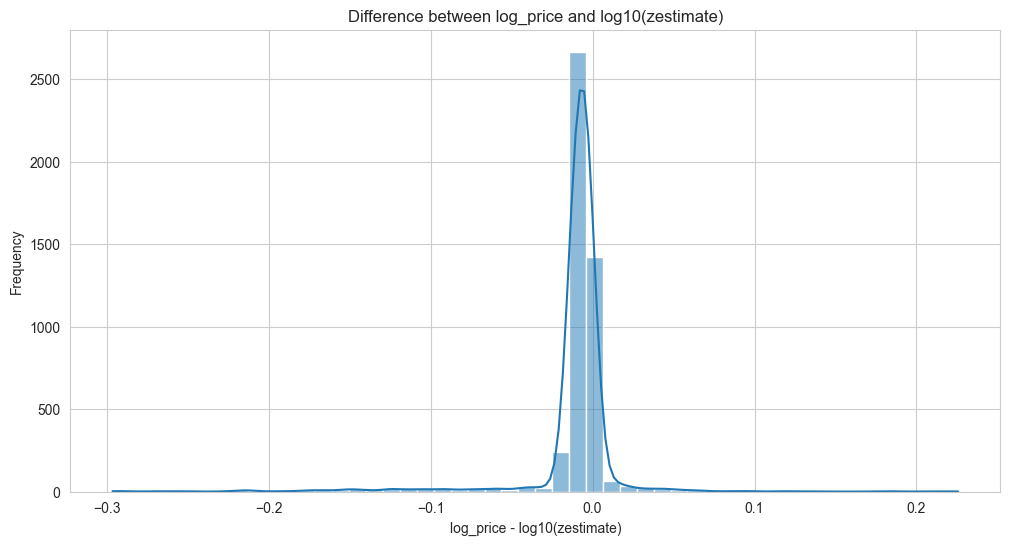

In [54]:
df['log_diff'] = df['log_price'] - np.log10(df['zestimate'])

plt.figure(figsize=(12, 6))
sns.histplot(df['log_diff'], bins=50, kde=True)
plt.title('Difference between log_price and log10(zestimate)')
plt.xlabel('log_price - log10(zestimate)')
plt.ylabel('Frequency')
plt.show()


In this case we have statistical significance but not practical significance. The reason for this is that the sample size is very large and it captures even the smallest differences:

$$s_D^2 = \frac{1}{n-1} \sum_{i=1}^n (D_i - \bar{D})^2$$

$$t = \frac{\bar{D}}{s_D / \sqrt{n}}$$

from the above formula we can see that when n is large the t value will be large even if the difference is small.




We can use another method called `effect size` which shows the practical significance of a difference. We can use Cohen's d for this purpose. Cohen's d is calculated as below:

$$d = \frac{\bar{x}_1 - \bar{x}_2}{s}$$

where $s = \sqrt{\frac{s_1^2 + s_2^2}{2}}$


In [55]:
s = np.sqrt(df["log_price"].std()**2 + np.log10(df["zestimate"]).std()**2 / 2)
cohen_d = (df['log_price'].mean() - np.log10(df['zestimate']).mean()) / s
cohen_d

-0.030828477386641125

We can see that the effect size is very small which means that the practical difference between zestimate and price is very small. 

In order to reduce the effect of large sample size, we took a smaller sample from our population and repeated the test. We can see that the p-value is still very small and it did not change and the effect size is still very small.  

In [56]:
SAMPLE_PORTION = 0.1

sample = df.sample(frac=SAMPLE_PORTION, random_state=42)

In [57]:
from scipy.stats import ttest_rel
import numpy as np

res = ttest_rel(sample['log_price'], np.log10(sample['zestimate']))
res

TtestResult(statistic=-7.091243575365157, pvalue=4.871078799286413e-12, df=473)

In [58]:
s = np.sqrt(sample["log_price"].std()**2 + np.log10(sample["zestimate"]).std()**2 / 2)
cohen_d = sample['log_diff'].mean() / s
cohen_d

-0.029826090389680895

We also repeat the process with the difference between price and zestimate itself(rather than the log of them) and we can see that the p-value is still very small and the effect size is still very small.

In [59]:
from scipy.stats import ttest_rel
import numpy as np

res = ttest_rel(sample['price'], sample['zestimate'])
res

TtestResult(statistic=-7.217583895966474, pvalue=2.1220583558294986e-12, df=473)

In [60]:
cohen_d = sample['price'].mean() / sample['price'].std()

The final method we used is the confidence interval. We use the 95% confidence interval to see if the difference between zestimate and price is significant. From the confidence interval we can see that although 0 doesn't lie in the interval, the distance between the lower bound and 0 is very small which means that the difference is not that significant.

In [61]:
import numpy as np
from scipy.stats import t

column1 = np.array(df['log_price'])
column2 = np.array(np.log10(df['zestimate']))

mean1, std1 = np.mean(column1), np.std(column1, ddof=1)
mean2, std2 = np.mean(column2), np.std(column2, ddof=1)

n1, n2 = len(column1), len(column2)

s = (column2 - column1).std()

alpha = 0.05
z_critical = t.ppf(1 - alpha / 2, n1 + n2 - 2) 
se_diff = s / np.sqrt(n1)
mean_diff = mean1 - mean2
lower, upper = mean_diff - z_critical * se_diff, mean_diff + z_critical * se_diff

print(lower, upper)

if lower <= 0 <= upper:
    print("The null hypothesis that the means are equal cannot be rejected.")
else:
    print("The null hypothesis that the means are equal can be rejected.")

-0.01111150192078154 -0.009470457290506596
The null hypothesis that the means are equal can be rejected.


We repeat this process for the difference between price and tax assessed value and again the null hypothesis is rejected and the difference is significant. This time the cohen_d is also high so we have both statistical and practical significance.

In [62]:
from scipy.stats import ttest_rel
import numpy as np

res = ttest_rel(df['log_price'], df['log_taxAssessedValue'])
res

TtestResult(statistic=70.88459552813123, pvalue=0.0, df=4734)

In [63]:
cohen_d = (df['log_price'].mean() - df['log_taxAssessedValue'].mean()) / df['log_price'].std()
cohen_d

1.333222370302646

From plots we can see we also have a practical difference between price and tax assessed value!

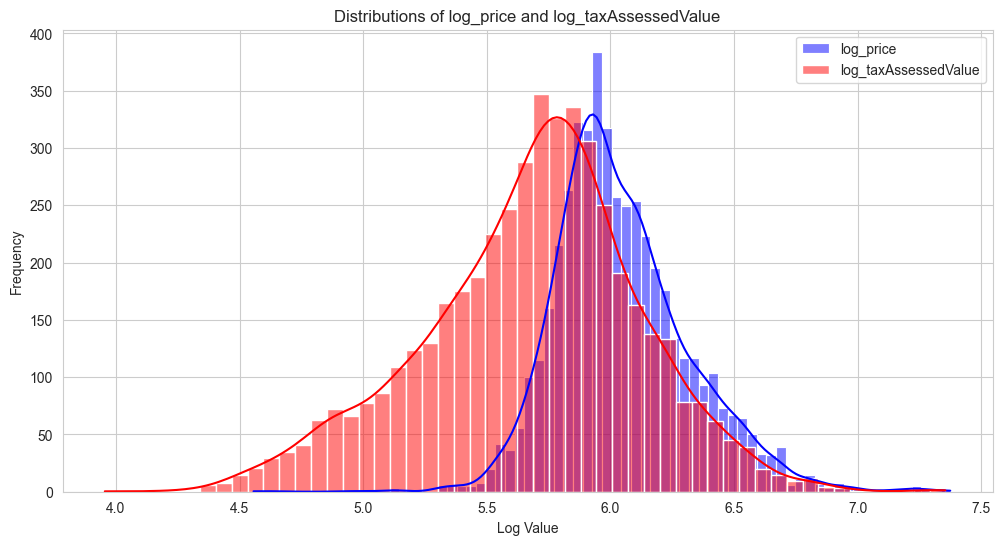

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(df['log_price'], color='blue', label='log_price', kde=True)
sns.histplot(df['log_taxAssessedValue'], color='red', label='log_taxAssessedValue', kde=True)
plt.legend()
plt.title('Distributions of log_price and log_taxAssessedValue')
plt.xlabel('Log Value')
plt.ylabel('Frequency')
plt.show()


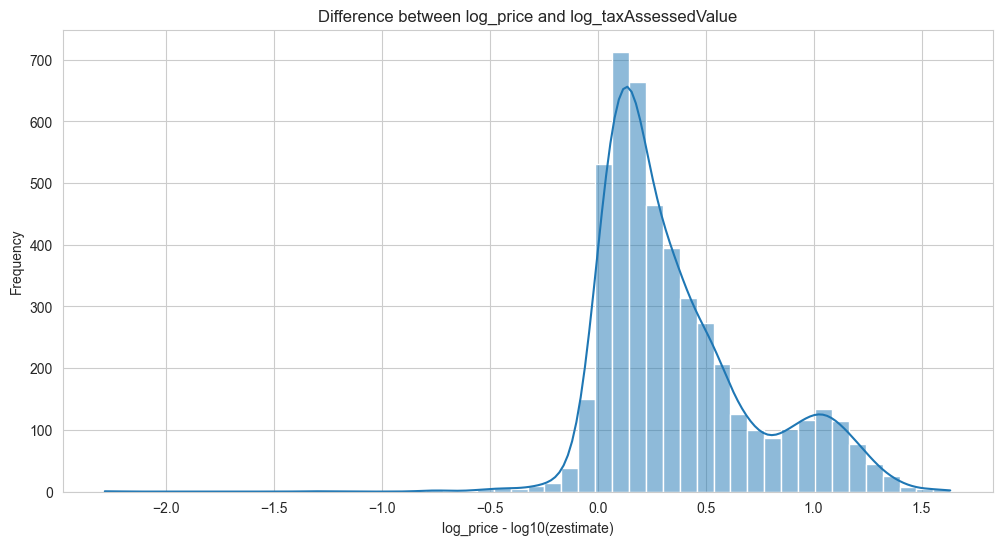

In [65]:
df['log_diff'] = df['log_price'] - df['log_taxAssessedValue']

plt.figure(figsize=(12, 6))
sns.histplot(df['log_diff'], bins=50, kde=True)
plt.title('Difference between log_price and log_taxAssessedValue')
plt.xlabel('log_price - log10(zestimate)')
plt.ylabel('Frequency')
plt.show()


### independant t-test

independant t-test is used to determine if the means of two independent samples are significantly different from each other. 

First we define some functions for this part:

* `perform_ttest_ind`: This function performs the independant t-test on two samples and checks whether we can reject the null hypothesis or not.

* `calculate_cohen_d`: This function calculates the effect size of the difference between two samples.

* `test_on_confidence_interval`: This function calculates the confidence interval of the difference between two samples and checks if 0 lies in the interval or not.

In [66]:
from scipy.stats import ttest_ind

def perform_ttest_ind(column1, column2):
    res = ttest_ind(column1, column2)
    print(res)
    if res.pvalue < 0.05:
        print("The null hypothesis that the means are equal can be rejected.")
    else:
        print("The null hypothesis that the means are equal cannot be rejected.")

def calculate_cohens_d(column1, column2):
    n1 = len(column1)
    n2 = len(column2)
    s_pooled = np.sqrt(((n1 - 1) * column1.var() + (n2 - 1) * column2.var()) / (n1 + n2 - 2))
    cohen_d = (column1.mean() - column2.mean()) / s_pooled
    print("cohen's d: ", cohen_d)
    
def test_on_confidence_interval(column1, column2, confidence_level=0.95):
    mean_with_pool = np.mean(column1)
    mean_without_pool = np.mean(column2)

    std_with_pool = np.std(column1, ddof=1)
    std_without_pool = np.std(column2, ddof=1)

    n1 = len(column1)
    n2 = len(column2)
    pooled_std = np.sqrt(((n1 - 1) * std_with_pool ** 2 + (n2 - 1) * std_without_pool ** 2) / (n1 + n2 - 2))

    SE = pooled_std * np.sqrt(1/n1 + 1/n2)

    t_critical = t.ppf((1 + confidence_level) / 2, df=n1 + n2 - 2)
    margin_of_error = t_critical * SE

    lower_bound = (mean_with_pool - mean_without_pool) - margin_of_error
    upper_bound = (mean_with_pool - mean_without_pool) + margin_of_error

    is_significant = lower_bound > 0 or upper_bound < 0

    print("confidence interval: ", (lower_bound, upper_bound))
    if is_significant:
        print("The null hypothesis that the means are equal can be rejected.")
    else:
        print("The null hypothesis that the means are equal cannot be rejected.")

Now in each scenario, we group the samples by a feature into two groups and check if the difference in another feature is significant between the two groups or not.

#### Having pool and lot area

Suprisingly, We can see that having pool doesn't have significant effect on the lot area. We can reject the null hypothesis when we are comparing the lot area itself but the effect size is small and also when we're comparing the log of lot area, the null hypothesis is not rejected.

In [67]:
lot_area_has_pool = np.array(df[df['hasPrivatePool'] == 1]['lotAreaValue'])
lot_area_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['lotAreaValue'])

perform_ttest_ind(lot_area_has_pool, lot_area_has_not_pool)
calculate_cohens_d(lot_area_has_pool, lot_area_has_not_pool)
test_on_confidence_interval(lot_area_has_pool, lot_area_has_not_pool)

TtestResult(statistic=-4.32864797542266, pvalue=1.531247729466232e-05, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  -0.2012230623811496
confidence interval:  (-2033.603394266182, -765.7588649328277)
The null hypothesis that the means are equal can be rejected.


In [68]:
log_lot_area_has_pool = np.array(df[df['hasPrivatePool'] == 1]['log_lotAreaValue'])
log_lot_area_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['log_lotAreaValue'])

perform_ttest_ind(log_lot_area_has_pool, log_lot_area_has_not_pool)
calculate_cohens_d(log_lot_area_has_pool, log_lot_area_has_not_pool)
test_on_confidence_interval(log_lot_area_has_pool, log_lot_area_has_not_pool)

TtestResult(statistic=-0.4363527609769507, pvalue=0.6626007100352009, df=4733.0)
The null hypothesis that the means are equal cannot be rejected.
cohen's d:  -0.02028440940501723
confidence interval:  (-0.05466400881540952, 0.03476029458423553)
The null hypothesis that the means are equal cannot be rejected.


#### Having pool and living area

We can see tha having pool has much more significant effect on the living area. We can reject the null hypothesis in both cases and the effect size is also higher than the previous section.

In [69]:
living_area_has_pool = np.array(df[df['hasPrivatePool'] == 1]['livingAreaValue'])
living_area_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['livingAreaValue'])

perform_ttest_ind(living_area_has_pool, living_area_has_not_pool)
calculate_cohens_d(living_area_has_pool, living_area_has_not_pool)
test_on_confidence_interval(living_area_has_pool, living_area_has_not_pool)

TtestResult(statistic=14.997666520968048, pvalue=1.0380761961763553e-49, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.6972734364161356
confidence interval:  (74.40807723087497, 96.78626309141171)
The null hypothesis that the means are equal can be rejected.


In [70]:
living_area_has_pool = np.array(df[df['hasPrivatePool'] == 1]['log_livingAreaValue'])
living_area_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['log_livingAreaValue'])

perform_ttest_ind(living_area_has_pool, living_area_has_not_pool)
calculate_cohens_d(living_area_has_pool, living_area_has_not_pool)
test_on_confidence_interval(living_area_has_pool, living_area_has_not_pool)

TtestResult(statistic=17.112989980928823, pvalue=9.49413562363495e-64, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.7955656245131577
confidence interval:  (0.1541751889757403, 0.19407020577096293)
The null hypothesis that the means are equal can be rejected.


#### Having pool and price

Having pool also has a significant effect on the price. We can reject the null hypothesis in both cases.

In [71]:
price_has_pool = np.array(df[df['hasPrivatePool'] == 1]['price'])
price_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['price'])

perform_ttest_ind(price_has_pool, price_has_not_pool)
calculate_cohens_d(price_has_pool, price_has_not_pool)
test_on_confidence_interval(price_has_pool, price_has_not_pool)

TtestResult(statistic=13.914381507112584, pvalue=3.632475637572258e-43, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.6469845440960713
confidence interval:  (772912.9951606089, 1026431.4417679427)
The null hypothesis that the means are equal can be rejected.


In [72]:
log_price_has_pool = np.array(df[df['hasPrivatePool'] == 1]['log_price'])
log_price_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['log_price'])

perform_ttest_ind(log_price_has_pool, log_price_has_not_pool)
calculate_cohens_d(log_price_has_pool, log_price_has_not_pool)
test_on_confidence_interval(log_price_has_pool, log_price_has_not_pool)

TtestResult(statistic=16.705926796136175, pvalue=6.401203726784372e-61, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.7766511941775833
confidence interval:  (0.18229795304291002, 0.2307723690488222)
The null hypothesis that the means are equal can be rejected.


#### Having fire place and price

Having fire place also has a significant effect on the price. We can reject the null hypothesis in both cases.

In [73]:
price_has_fireplace = np.array(df[df['hasFireplace'] == 1]['price'])
price_has_not_fireplace = np.array(df[df['hasFireplace'] == 0]['price'])

perform_ttest_ind(price_has_fireplace, price_has_not_fireplace)
calculate_cohens_d(price_has_fireplace, price_has_not_fireplace)
test_on_confidence_interval(price_has_fireplace, price_has_not_fireplace)

TtestResult(statistic=16.486900247135157, pvalue=2.011397665972827e-59, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.4830110093472734
confidence interval:  (587263.551294403, 745775.9238621223)
The null hypothesis that the means are equal can be rejected.


In [74]:
log_price_has_fireplace = np.array(df[df['hasFireplace'] == 1]['log_price'])
log_price_has_not_fireplace = np.array(df[df['hasFireplace'] == 0]['log_price'])

perform_ttest_ind(log_price_has_fireplace, log_price_has_not_fireplace)
calculate_cohens_d(log_price_has_fireplace, log_price_has_not_fireplace)
test_on_confidence_interval(log_price_has_fireplace, log_price_has_not_fireplace)

TtestResult(statistic=23.651002520709174, pvalue=5.545098347081356e-117, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.6929032172978187
confidence interval:  (0.1644567209190994, 0.1941850486961863)
The null hypothesis that the means are equal can be rejected.


### Having cooling and price

Although the test shows that having cooling has a significant effect on the price, the effect size smaller than the previous tests and the confidence interval shows that the interval is closer to 0 so the difference is less significant than the previous tests.

In [75]:
price_has_cooling = np.array(df[df['hasCooling'] == 1]['price'])
price_has_not_cooling = np.array(df[df['hasCooling'] == 0]['price'])

perform_ttest_ind(price_has_cooling, price_has_not_cooling)
calculate_cohens_d(price_has_cooling, price_has_not_cooling)
test_on_confidence_interval(price_has_cooling, price_has_not_cooling)

TtestResult(statistic=8.366780219893172, pvalue=7.707435574215394e-17, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.30748475174325923
confidence interval:  (331653.71818038815, 534639.5617423017)
The null hypothesis that the means are equal can be rejected.


In [76]:
log_price_has_cooling = np.array(df[df['hasCooling'] == 1]['log_price'])
log_price_has_not_cooling = np.array(df[df['hasCooling'] == 0]['log_price'])

perform_ttest_ind(log_price_has_cooling, log_price_has_not_cooling)
calculate_cohens_d(log_price_has_cooling, log_price_has_not_cooling)
test_on_confidence_interval(log_price_has_cooling, log_price_has_not_cooling)

TtestResult(statistic=11.628992323340002, pvalue=7.681852290329135e-31, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.42738942653162215
confidence interval:  (0.09588394739898509, 0.13476828928470364)
The null hypothesis that the means are equal can be rejected.


#### Having Spa and price

For Spa the significance is even less than the cooling. The effect size is smaller and the confidence interval is closer to 0 but the test still shows that the difference is statistically significant.

In [77]:
price_has_spa = np.array(df[df['hasSpa'] == 1]['price'])
price_has_not_spa = np.array(df[df['hasSpa'] == 0]['price'])

perform_ttest_ind(price_has_spa, price_has_not_spa)
calculate_cohens_d(price_has_spa, price_has_not_spa)
test_on_confidence_interval(price_has_spa, price_has_not_spa)

TtestResult(statistic=6.972198024117488, pvalue=3.5500244082267708e-12, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.31761075808654754
confidence interval:  (322248.16131388844, 574359.1123302181)
The null hypothesis that the means are equal can be rejected.


In [78]:
log_price_has_spa = np.array(df[df['hasSpa'] == 1]['log_price'])
log_price_has_not_spa = np.array(df[df['hasSpa'] == 0]['log_price'])

perform_ttest_ind(log_price_has_spa, log_price_has_not_spa)
calculate_cohens_d(log_price_has_spa, log_price_has_not_spa)
test_on_confidence_interval(log_price_has_spa, log_price_has_not_spa)

TtestResult(statistic=2.7937113542091367, pvalue=0.005231650530578872, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.12724956363065973
confidence interval:  (0.010377080309161138, 0.0592075711340128)
The null hypothesis that the means are equal can be rejected.


### single-family vs condo

Two most common home types in the data set are single-family and condo so we decided to compare the price of these two types. The test shows that the difference is significant and the effect size is also high.

In [79]:
price_single_family = np.array(df[df['homeType'] == 'SINGLE_FAMILY']['price'])
price_condo = np.array(df[df['homeType'] == 'CONDO']['price'])

perform_ttest_ind(price_single_family, price_condo)
calculate_cohens_d(price_single_family, price_condo)
test_on_confidence_interval(price_single_family, price_condo)

TtestResult(statistic=14.042002873566132, pvalue=9.178574481924477e-44, df=4021.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.5334627965550254
confidence interval:  (672799.4188576543, 891160.5950701958)
The null hypothesis that the means are equal can be rejected.


In [80]:
log_price_single_family = np.array(df[df['homeType'] == 'SINGLE_FAMILY']['log_price'])
log_price_condo = np.array(df[df['homeType'] == 'CONDO']['log_price'])

perform_ttest_ind(log_price_single_family, log_price_condo)
calculate_cohens_d(log_price_single_family, log_price_condo)
test_on_confidence_interval(log_price_single_family, log_price_condo)

TtestResult(statistic=24.74033903393239, pvalue=6.609476585212971e-126, df=4021.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.9399431029614862
confidence interval:  (0.2235647485067133, 0.2620471830653458)
The null hypothesis that the means are equal can be rejected.


### Chai Square test for home types

Chai Square test is used to determine if there is a significant relationship between two categorical variables. We use this test to determine if there is a significant relationship between the home types and another categorical(or binary) feature:
* Null Hypothesis (H0): There is no significant relationship between the two categorical variables.
* Alternative Hypothesis (Ha): There is a significant relationship between the two categorical variables.

Like other tests it calculates a score(here it's called chai2) and using that score, it calculates the p-value and the decides if the null hypothesis should be rejected or not.

chai2 is calculated as below:

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$

where $O_i$ is the observed frequency and $E_i$ is the expected frequency.

In [81]:
df["homeType"].value_counts()

homeType
SINGLE_FAMILY    3133
CONDO             890
MULTI_FAMILY      396
TOWNHOUSE         293
APARTMENT          11
MANUFACTURED       10
LOT                 2
Name: count, dtype: int64

We only include single-family, condo, multi-family and townhouse for the home types as the other types have very few samples.

We also calculate a coefficient called Cranmer's V which is used to determine the strength of the relationship between two categorical variables and we use it to make sure that the relationship is significant. It's calculated as below:

$$V = \sqrt{\frac{\chi^2}{n \times (min(r-1, c-1))}}$$

where r and c are the number of rows and columns in the contingency table.

In [82]:
from scipy.stats import chi2_contingency

homeTypes = ["SINGLE_FAMILY", "CONDO", "TOWNHOUSE", "MULTI_FAMILY"]
df_filtered_hometypes = df[df["homeType"].isin(homeTypes)]

def perfrom_chi2_test(column1, column2):
    contingency_table = pd.crosstab(column1, column2)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("chi2: ", chi2)
    print("p: ", p)
    if p < 0.05:
        print("The null hypothesis that the variables are independent can be rejected.")
    else:
        print("The null hypothesis that the variables are independent cannot be rejected.")
    print("crammers_v: ", cramers_v(contingency_table, chi2))
    display(contingency_table)
    
def cramers_v(confusion_matrix, chi2_statistic):
    chi2 = chi2_statistic
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

We perform this test with all *having* features and we see that all of them are related to the home type but some of them are more significant than the others. For example `hasView` has a very high chai2 score and a very high Cranmer's V which means that it has a very strong relationship with the home type.

In [83]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasPrivatePool"])

chi2:  249.5129117256268
p:  8.340199418475354e-54
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.22875085839539938


hasPrivatePool,0,1
homeType,,
CONDO,882,8
MULTI_FAMILY,395,1
SINGLE_FAMILY,2627,506
TOWNHOUSE,288,5


In [84]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasSpa"])

chi2:  203.19906911393429
p:  8.588264759258342e-44
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.20614546910265164


hasSpa,0,1
homeType,,
CONDO,744,146
MULTI_FAMILY,395,1
SINGLE_FAMILY,2832,301
TOWNHOUSE,199,94


In [85]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasView"])

chi2:  760.6599785853615
p:  1.4719379936497322e-164
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.401033311882929


hasView,0,1
homeType,,
CONDO,74,816
MULTI_FAMILY,248,148
SINGLE_FAMILY,381,2752
TOWNHOUSE,18,275


In [86]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasCooling"])

chi2:  470.7388102266385
p:  1.0462027885203313e-101
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.31509743315106864


hasCooling,0,1
homeType,,
CONDO,50,840
MULTI_FAMILY,216,180
SINGLE_FAMILY,638,2495
TOWNHOUSE,10,283


In [87]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasHeating"])

chi2:  230.58213396935517
p:  1.035023122844367e-49
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.21979202623019303


hasHeating,0,1
homeType,,
CONDO,33,857
MULTI_FAMILY,125,271
SINGLE_FAMILY,369,2764
TOWNHOUSE,10,283


In [88]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasFireplace"])

chi2:  422.37333063401826
p:  3.152169076778268e-91
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.2983620155460143


hasFireplace,0,1
homeType,,
CONDO,465,425
MULTI_FAMILY,348,48
SINGLE_FAMILY,1143,1990
TOWNHOUSE,95,198


#### Phi Coefficient (Mean Square Contingency Coefficient)

For the final part in statistical tests, we use the Phi Coefficient to determine the strength of the relationship between two binary variables. It's calculated as below:

$$\phi = \sqrt{\frac{\chi^2}{n}}$$

where $\chi^2$ is the chai2 score and n is the total number of samples.

In [89]:
def calculate_phi_coeff(column1, column2):
    contingency_table = pd.crosstab(column1, column2)
    a = contingency_table.loc[0, 0]  
    b = contingency_table.loc[0, 1]  
    c = contingency_table.loc[1, 0]  
    d = contingency_table.loc[1, 1]  

    phi = (a * d - b * c) / np.sqrt((a + b) * (c + d) * (a + c) * (b + d))
    return phi

We use this coefficient to determine the strength of the relationship between all *having* features and we visualize the results in a heatmap:

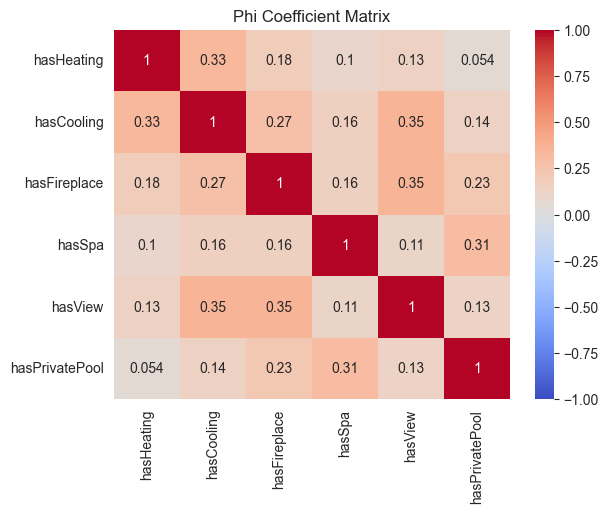

In [90]:
features = ["hasHeating", "hasCooling", "hasFireplace", "hasSpa", "hasView", "hasPrivatePool"]

phi_coeff_matrix = pd.DataFrame(index=features, columns=features)

for feature1 in features:
    for feature2 in features:
        coeff = calculate_phi_coeff(df_filtered_hometypes[feature1], df_filtered_hometypes[feature2])
        phi_coeff_matrix.loc[feature1, feature2] = coeff

phi_coeff_matrix = phi_coeff_matrix.astype(float)

sns.heatmap(phi_coeff_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Phi Coefficient Matrix')
plt.show()

From the heatmap we can see that (`hasCooling`, `hasView`) and (`hasFireplace`, `hasView`) have the highest relationship with each other and the home type. (`hasSpa`, `hasPrivatePool`) and (`hasCooling`, `hasHeating`) also have a high relationship with each other which is something that we can expect.